# Exploratory Data Analysis (EDA)

## Step 1: Set Up the Environment

### Install Required Libraries:

In [1]:
!pip install pandas numpy matplotlib seaborn openpyxl

### Import Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [965]:
file_path = 'Foodpanda.xlsx'
data = pd.read_excel(file_path)

In [62]:
data.head()

,Timestamp,"Do you currently use Panda Pro?\n\nPlease note that by answering the following question, you are giving your consent for your data to be used in our research project. All responses will be kept confidential and used solely for research purposes in accordance with applicable data protection regulations.",What is your age?,What is your income level/monthly expenditure?,Where do you reside currently?,How often do you use FoodPanda?,Why have you not subscribed to Panda Pro? (Select all that apply),Do you know how to subscribe to Panda Pro?,"If you selected 'Yes' in the above question, how complicated do you find subscribing to Panda Pro?",Do you think Panda Pro is marketed effectively?,...,Do you feel that the subscription saves you money in the long run?,Do you think having multiple eateries nearby influences your decision to use Foodpanda?,Do your friends or family recommend Panda Pro?,Rate your satisfaction level with respect to the Ease of the subscription process,Rate your satisfaction level with respect to Cost Savings,Rate your satisfaction level with respect to Delivery Speed,Rate your satisfaction level with respect to the Quality of food received through Foodpanda,How would you rate your experience using Foodpanda Pro compared to normal delivery?,What influenced you to use Foodpanda Pro?,"Do you use any other food or grocery delivery app apart from Foodpanda? If yes, please name the app(s)."
0,2024-10-15 20:12:14.013,No,18 - 25,"Less than 50,000",Lahore,Monthly,I don't order food frequently enough to justif...,Yes,2.0,I’m not sure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-10-15 20:15:00.455,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,5.0,5.0,3.0,3.0,3.0,NaN,NaN
2,2024-10-15 20:18:44.665,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,4.0,4.0,4.0,3.0,4.0,NaN,NaN
3,2024-10-15 20:20:32.302,No,18 - 25,"Less than 50,000",Lahore,Weekly,I wasn’t aware of Foodpanda Pro and its benefits.,No,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-10-15 20:26:19.929,No,18 - 25,"Less than 50,000",Lahore,Rarely,I don't order food frequently enough to justif...,No,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 38 columns):
 #   Column                                                                                                                                                                                                                                                                                                         Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                                                                                                                         --------------  -----         
 0   Timestamp                                                                                                                                                                                                           

### Dataset Summary:

- Total Responses: 109
- Columns: 38 (1 datetime, 8 numerical, 29 categorical/textual).
- Non-Null Values: Some columns (e.g., demographics, conditional responses) have missing values.

- Key Observations:
  - Columns like What is your age? and What is your age?.1 seem duplicated for different groups (Pro vs. Non-Pro users).
  - Numerical columns (e.g., satisfaction levels) have partial responses due to conditional questions.
  - Open-ended questions (e.g., What influenced you to use Foodpanda Pro?) have sparse responses.

- Next Steps:
  - Handle missing values appropriately.
  - Distinguish Pro and Non-Pro users for subgroup analysis.
  - Address potential duplicate or redundant columns.

In [30]:
print(data.columns)

Index(['Timestamp',
       'Do you currently use Panda Pro?\n\nPlease note that by answering the following question, you are giving your consent for your data to be used in our research project. All responses will be kept confidential and used solely for research purposes in accordance with applicable data protection regulations.',
       'What is your age?', 'What is your income level/monthly expenditure?',
       'Where do you reside currently?', 'How often do you use FoodPanda?',
       'Why have you not subscribed to Panda Pro?  (Select all that apply)',
       'Do you know how to subscribe to Panda Pro?',
       'If you selected 'Yes' in the above question, how complicated do you find subscribing to Panda Pro?',
       'Do you think Panda Pro is marketed effectively?  ',
       'How likely would you consider subscribing to Panda Pro if they provided more targeted marketing and more precise information about the subscription process?  ',
       'Would you be more likely to subscrib

In [966]:
data.columns = [
    'timestamp',
    'panda_pro',
    'age',
    'income_level',
    'current_residence',
    'foodpanda_usage_frequency',
    'reasons_not_subscribed_to_panda_pro',
    'know_how_to_subscribe_to_panda_pro',
    'complexity_of_subscribing_to_panda_pro',
    'do_you_think_panda_pro_is_marketed_effectively',
    'likelihood_of_subscribing_if_targeted_marketing',
    'more_likely_to_subscribe_to_panda_pro_if_additional_perks',
    'influence_of_flexible_delivery_fees_on_subscription',
    'frequency_affects_subscription_value',
    'recommendation_from_family_or_friends',
    'rely_on_friend_subscription_to_avoid_subscribing',
    'eateries_nearby_influence_subscription_decision',
    'future_subscription_consideration',
    'usage_of_other_delivery_apps',
    'names_of_other_delivery_apps',
    'other_factors_influencing_subscription_decision',
    'pro_user_age',
    'pro_user_income_level',
    'pro_user_residence',
    'pro_user_foodpanda_frequency',
    'reasons_for_subscribing_to_panda_pro',
    'satisfaction_with_pro_service',
    'frequency_affects_pro_subscription_value',
    'pro_subscription_saves_money',
    'eateries_nearby_influence_pro_usage',
    'family_or_friends_recommend_panda_pro',
    'satisfaction_with_subscription_process',
    'satisfaction_with_cost_savings',
    'satisfaction_with_delivery_speed',
    'satisfaction_with_food_quality',
    'experience_pro_vs_normal_delivery',
    'reasons_for_using_panda_pro',
    'names_of_other_food_delivery_apps'
]
data = data.drop(columns=['timestamp'])
print(data.columns)
print(len(data.columns))

Index(['panda_pro', 'age', 'income_level', 'current_residence',
       'foodpanda_usage_frequency', 'reasons_not_subscribed_to_panda_pro',
       'know_how_to_subscribe_to_panda_pro',
       'complexity_of_subscribing_to_panda_pro',
       'do_you_think_panda_pro_is_marketed_effectively',
       'likelihood_of_subscribing_if_targeted_marketing',
       'more_likely_to_subscribe_to_panda_pro_if_additional_perks',
       'influence_of_flexible_delivery_fees_on_subscription',
       'frequency_affects_subscription_value',
       'recommendation_from_family_or_friends',
       'rely_on_friend_subscription_to_avoid_subscribing',
       'eateries_nearby_influence_subscription_decision',
       'future_subscription_consideration', 'usage_of_other_delivery_apps',
       'names_of_other_delivery_apps',
       'other_factors_influencing_subscription_decision', 'pro_user_age',
       'pro_user_income_level', 'pro_user_residence',
       'pro_user_foodpanda_frequency', 'reasons_for_subscribing_to_

In [995]:
# Define columns for Non-Pro and Pro users
non_pro_columns = [
    'age', 'income_level', 'current_residence',
    'foodpanda_usage_frequency', 'reasons_not_subscribed_to_panda_pro',
    'know_how_to_subscribe_to_panda_pro',
    'complexity_of_subscribing_to_panda_pro',
    'do_you_think_panda_pro_is_marketed_effectively',
    'likelihood_of_subscribing_if_targeted_marketing',
    'more_likely_to_subscribe_to_panda_pro_if_additional_perks',
    'influence_of_flexible_delivery_fees_on_subscription',
    'frequency_affects_subscription_value',
    'recommendation_from_family_or_friends',
    'rely_on_friend_subscription_to_avoid_subscribing',
    'eateries_nearby_influence_subscription_decision',
    'future_subscription_consideration', 'usage_of_other_delivery_apps',
    'names_of_other_delivery_apps', 'other_factors_influencing_subscription_decision'
]

pro_columns = [
    'pro_user_age', 'pro_user_income_level', 'pro_user_residence',
    'pro_user_foodpanda_frequency', 'reasons_for_subscribing_to_panda_pro',
    'satisfaction_with_pro_service',
    'frequency_affects_pro_subscription_value',
    'pro_subscription_saves_money', 'eateries_nearby_influence_pro_usage',
    'family_or_friends_recommend_panda_pro',
    'satisfaction_with_subscription_process',
    'satisfaction_with_cost_savings', 'satisfaction_with_delivery_speed',
    'satisfaction_with_food_quality', 'experience_pro_vs_normal_delivery',
    'reasons_for_using_panda_pro', 'names_of_other_food_delivery_apps'
]

# Split data into Pro and Non-Pro groups
non_pro_data = data[data['panda_pro'] == 'No'][non_pro_columns]
pro_data = data[data['panda_pro'] == 'Yes'][pro_columns]

pro_data.columns = [
    'age',
    'income_level',
    'current_residence',
    'foodpanda_usage_frequency',
    'reasons_for_subscribing_to_panda_pro',
    'satisfaction_with_pro_service',
    'frequency_affects_subscription_value',
    'pro_subscription_saves_money',
    'eateries_nearby_influence_usage',
    'recommendation_from_family_or_friends',
    'satisfaction_with_subscription_process',
    'satisfaction_with_cost_savings',
    'satisfaction_with_delivery_speed',
    'satisfaction_with_food_quality',
    'experience_pro_vs_normal_delivery',
    'reasons_for_using_panda_pro',
    'names_of_other_delivery_apps'
]

In [163]:
print("Non-Pro Data:")
non_pro_data.head()

Non-Pro Data:


,age,income_level,current_residence,foodpanda_usage_frequency,reasons_not_subscribed_to_panda_pro,know_how_to_subscribe_to_panda_pro,complexity_of_subscribing_to_panda_pro,do_you_think_panda_pro_is_marketed_effectively,likelihood_of_subscribing_if_targeted_marketing,more_likely_to_subscribe_to_panda_pro_if_additional_perks,influence_of_flexible_delivery_fees_on_subscription,frequency_affects_subscription_value,recommendation_from_family_or_friends,rely_on_friend_subscription_to_avoid_subscribing,eateries_nearby_influence_subscription_decision,future_subscription_consideration,usage_of_other_delivery_apps,names_of_other_delivery_apps,other_factors_influencing_subscription_decision
0,18 - 25,"Less than 50,000",Lahore,Monthly,I don't order food frequently enough to justif...,Yes,2.0,I’m not sure,2.0,Yes,Yes,Yes,No,Maybe,Yes,No,No,NaN,NaN
3,18 - 25,"Less than 50,000",Lahore,Weekly,I wasn’t aware of Foodpanda Pro and its benefits.,No,NaN,No,4.0,Yes,Yes,Yes,No,Maybe,Maybe,Maybe,No,NaN,NaN
4,18 - 25,"Less than 50,000",Lahore,Rarely,I don't order food frequently enough to justif...,No,NaN,No,3.0,Yes,Yes,Yes,Yes,Yes,Yes,Maybe,No,NaN,NaN
5,18 - 25,"Less than 50,000",Lahore,Rarely,I don't order food frequently enough to justif...,Yes,3.0,Yes,3.0,Yes,Yes,Yes,Yes,No,No,Maybe,No,NaN,NaN
8,18 - 25,"Less than 50,000",Lahore,Weekly,I don't order food frequently enough to justif...,No,NaN,I’m not sure,5.0,Yes,Maybe,Yes,Yes,Yes,No,Yes,No,NaN,NaN


In [164]:
print("\nPro Data:")
pro_data.head()


Pro Data:


,age,income_level,current_residence,foodpanda_usage_frequency,reasons_for_subscribing_to_panda_pro,satisfaction_with_pro_service,frequency_affects_subscription_value,pro_subscription_saves_money,eateries_nearby_influence_usage,recommendation_from_family_or_friends,satisfaction_with_subscription_process,satisfaction_with_cost_savings,satisfaction_with_delivery_speed,satisfaction_with_food_quality,experience_pro_vs_normal_delivery,reasons_for_using_panda_pro,names_of_other_delivery_apps
1,18 - 25,"Less than 50,000",Lahore,"every few days (more than weekly, but less tha...","Cost savings on deliveries, Promotional discou...",4.0,Yes,Yes,Yes,Yes,5.0,5.0,3.0,3.0,3.0,NaN,NaN
2,18 - 25,"Less than 50,000",Lahore,Daily,"Cost savings on deliveries, Frequency of orders",3.0,Yes,Yes,Yes,Yes,4.0,4.0,4.0,3.0,4.0,NaN,NaN
6,18 - 25,"Less than 50,000",Lahore,Weekly,"Cost savings on deliveries, Trust in Foodpanda...",5.0,Yes,Yes,Maybe,No,5.0,5.0,4.0,3.0,4.0,NaN,NaN
7,18 - 25,"Less than 50,000",Lahore,Weekly,"Cost savings on deliveries, Frequency of orders",3.0,Yes,Yes,Yes,Yes,5.0,5.0,4.0,4.0,4.0,NaN,NaN
10,18 - 25,"Less than 50,000",Lahore,Weekly,Recommendations from friends or family,5.0,Yes,Yes,Yes,Yes,2.0,5.0,2.0,4.0,5.0,NaN,NaN


In [166]:
print(f"Number of Non-Pro responses: {len(non_pro_data)}")
print(f"Number of Pro responses: {len(pro_data)}")

Number of Non-Pro responses: 76
Number of Pro responses: 33


# Non Pro Data - Statistical Analysis

In [975]:
# Define the mappings for Ordinal Encoding
age_mapping = {'18 - 25': 1, '26 - 40': 2, 'Above 40': 3}
income_level_mapping = {
    'Less than 50,000': 1,
    '50,000 - 100,000': 2,
    '100,000 - 150,000': 3,
    'Greater than 150,000': 4
}
usage_frequency_mapping = {'Rarely': 1, 'Monthly': 2, 'Weekly': 3, 'Daily': 4}

# Apply Ordinal Encoding
non_pro_data['age'] = non_pro_data['age'].map(age_mapping)
non_pro_data['income_level'] = non_pro_data['income_level'].map(income_level_mapping)
non_pro_data['foodpanda_usage_frequency'] = non_pro_data['foodpanda_usage_frequency'].map(usage_frequency_mapping)

# Apply One-Hot Encoding for 'current_residence'
non_pro_data = pd.get_dummies(non_pro_data, columns=['current_residence'], drop_first=True)

# Define all possible options for 'reasons_not_subscribed_to_panda_pro'
options = [
    'The subscription cost (Rs. 249) is too high for the benefits offered.',
    "I don't order food frequently enough to justify a subscription.",
    'I find the process of subscribing unclear or complicated.',
    'I don’t trust Foodpanda’s delivery service.',
    'I wasn’t aware of Foodpanda Pro and its benefits.',
    'Free delivery for orders above Rs. 599 isn’t appealing because I usually order for less than Rs. 599.',
    'I prefer ordering from nearby eateries directly instead of using delivery services.',
    'Other'
]

# Create binary columns for each option
for option in options:
    non_pro_data[option] = non_pro_data['reasons_not_subscribed_to_panda_pro'].apply(lambda x: 1 if option in x else 0)

# Drop the original 'reasons_not_subscribed_to_panda_pro' column and 'Other' column
non_pro_data = non_pro_data.drop(columns=['reasons_not_subscribed_to_panda_pro', 'Other'])

# Define the mapping for the first question
know_how_to_subscribe_mapping = {
    'Yes': 0,
    'No': 1,
    'Never tried': 2,
    "I don't use foodpanda": 3
}

# Apply the mapping to the 'know_how_to_subscribe_to_panda_pro' column
non_pro_data['know_how_to_subscribe_to_panda_pro'] = non_pro_data['know_how_to_subscribe_to_panda_pro'].map(know_how_to_subscribe_mapping)

# Ensure dependent values are valid only when the first question is "Yes" (0)
non_pro_data['complexity_of_subscribing_to_panda_pro'] = non_pro_data.apply(
    lambda row: row['complexity_of_subscribing_to_panda_pro'] if row['know_how_to_subscribe_to_panda_pro'] == 0 else -1,
    axis=1
)

# Drop rows with NaN in 'know_how_to_subscribe_to_panda_pro' or 'complexity_of_subscribing_to_panda_pro'
non_pro_data = non_pro_data.dropna(subset=['know_how_to_subscribe_to_panda_pro', 'complexity_of_subscribing_to_panda_pro'])

# Convert both columns to integers explicitly
non_pro_data['know_how_to_subscribe_to_panda_pro'] = non_pro_data['know_how_to_subscribe_to_panda_pro'].astype(int)
non_pro_data['complexity_of_subscribing_to_panda_pro'] = non_pro_data['complexity_of_subscribing_to_panda_pro'].astype(int)

# Mapping for 'do_you_think_panda_pro_is_marketed_effectively'
marketing_effectiveness_mapping = {'I’m not sure': 2, 'No': 1, 'Yes': 0}
non_pro_data['do_you_think_panda_pro_is_marketed_effectively'] = non_pro_data['do_you_think_panda_pro_is_marketed_effectively'].map(marketing_effectiveness_mapping)

# Mapping for 'more_likely_to_subscribe_to_panda_pro_if_additional_perks'
additional_perks_mapping = {'No': 1, 'Yes': 0}
non_pro_data['more_likely_to_subscribe_to_panda_pro_if_additional_perks'] = non_pro_data['more_likely_to_subscribe_to_panda_pro_if_additional_perks'].map(additional_perks_mapping)

# Mapping for 'influence_of_flexible_delivery_fees_on_subscription'
flexible_fees_influence_mapping = {'No': 1, 'Maybe': 2, 'Yes': 0}
non_pro_data['influence_of_flexible_delivery_fees_on_subscription'] = non_pro_data['influence_of_flexible_delivery_fees_on_subscription'].map(flexible_fees_influence_mapping)

# Mapping for 'frequency_affects_subscription_value'
frequency_affects_mapping = {'No': 1, 'Yes': 0}
non_pro_data['frequency_affects_subscription_value'] = non_pro_data['frequency_affects_subscription_value'].map(frequency_affects_mapping)

# Mapping for 'recommendation_from_family_or_friends'
recommendation_mapping = {'No': 1, 'Yes': 0}
non_pro_data['recommendation_from_family_or_friends'] = non_pro_data['recommendation_from_family_or_friends'].map(recommendation_mapping)

# Mapping for 'rely_on_friend_subscription_to_avoid_subscribing'
rely_on_friend_subscription_mapping = {'No': 1, 'Maybe': 2, 'Yes': 0}
non_pro_data['rely_on_friend_subscription_to_avoid_subscribing'] = non_pro_data['rely_on_friend_subscription_to_avoid_subscribing'].map(rely_on_friend_subscription_mapping)

# Mapping for 'eateries_nearby_influence_subscription_decision'
eateries_nearby_influence_mapping = {'No': 1, 'Maybe': 2, 'Yes': 0}
non_pro_data['eateries_nearby_influence_subscription_decision'] = non_pro_data['eateries_nearby_influence_subscription_decision'].map(eateries_nearby_influence_mapping)

# Mapping for 'future_subscription_consideration'
future_subscription_mapping = {'No': 1, 'Maybe': 2, 'Yes': 0}
non_pro_data['future_subscription_consideration'] = non_pro_data['future_subscription_consideration'].map(future_subscription_mapping)

# Convert 'likelihood_of_subscribing_if_targeted_marketing' to int
non_pro_data['likelihood_of_subscribing_if_targeted_marketing'] = non_pro_data['likelihood_of_subscribing_if_targeted_marketing'].astype(int)

# Custom mapping for 'usage_of_other_delivery_apps'
def map_usage_of_other_delivery_apps(value):
    if value == 'Yes':
        return 0
    elif value == 'No':
        return 1
    else:
        return 0  # Anything else is treated as 'Yes' (0)

# Apply the mapping function to the 'usage_of_other_delivery_apps' column
non_pro_data['usage_of_other_delivery_apps'] = non_pro_data['usage_of_other_delivery_apps'].apply(map_usage_of_other_delivery_apps)

# Get unique values for 'names_of_other_delivery_apps'
unique_names_of_other_delivery_apps = non_pro_data['names_of_other_delivery_apps'].dropna().unique()

# Get unique values for 'other_factors_influencing_subscription_decision'
unique_other_factors_influencing_subscription_decision = non_pro_data['other_factors_influencing_subscription_decision'].dropna().unique()

# Output the unique values
print("Unique values in 'names_of_other_delivery_apps':")
print(unique_names_of_other_delivery_apps)

print("\nUnique values in 'other_factors_influencing_subscription_decision':")
print(unique_other_factors_influencing_subscription_decision)

# Drop the specified columns from non_pro_data
non_pro_data = non_pro_data.drop(columns=['names_of_other_delivery_apps', 'other_factors_influencing_subscription_decision'])

# Reset the index to ensure it is sequential
non_pro_data = non_pro_data.reset_index(drop=True)

# Display the updated DataFrame
print("\nUpdated DataFrame:")
non_pro_data.head()

Unique values in 'names_of_other_delivery_apps':
['Grocers app, Cheetah (not now though)' 'Davago' 'Hamza'
 'Cheetay, Broadway Pizza' 'Anas Nasir' '-' 'Cheetay' 'Grocer, metro'
 'Umar Imran']

Unique values in 'other_factors_influencing_subscription_decision':
['No' 'Rainy season' 'Yes'
 'yes already paying for my order, why should I pay more for subscription'
 'Foodpandas online payment system sucks most of the times ' 'Maybe'
 'Weekly package should be offered.' 'no'
 "Yes, i don't use food panda because there prices are way higher and the shops are near so rather i go there and pick up the food."
 'Tax too high'
 "No, we just rarely use foodpanda services, so subscribing and giving money monthly for a subscription that u don't even use isn't worth it and no one has that much enough money "]

Updated DataFrame:


,age,income_level,foodpanda_usage_frequency,know_how_to_subscribe_to_panda_pro,complexity_of_subscribing_to_panda_pro,do_you_think_panda_pro_is_marketed_effectively,likelihood_of_subscribing_if_targeted_marketing,more_likely_to_subscribe_to_panda_pro_if_additional_perks,influence_of_flexible_delivery_fees_on_subscription,frequency_affects_subscription_value,...,current_residence_Multan,current_residence_Rawalpindi,current_residence_Uk,The subscription cost (Rs. 249) is too high for the benefits offered.,I don't order food frequently enough to justify a subscription.,I find the process of subscribing unclear or complicated.,I don’t trust Foodpanda’s delivery service.,I wasn’t aware of Foodpanda Pro and its benefits.,Free delivery for orders above Rs. 599 isn’t appealing because I usually order for less than Rs. 599.,I prefer ordering from nearby eateries directly instead of using delivery services.
0,1,1,2,0,2,2,2,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1,1,1,3,1,-1,1,4,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,-1,1,3,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,1,1,0,3,0,3,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,3,1,-1,2,5,0,2,0,...,0,0,0,0,1,0,0,0,0,0


In [168]:
import scipy.stats as stats

# Choose columns that are numeric and you want to test for normality
columns_to_test = [
    'age', 'income_level', 'foodpanda_usage_frequency',
    'know_how_to_subscribe_to_panda_pro', 'complexity_of_subscribing_to_panda_pro',
    'do_you_think_panda_pro_is_marketed_effectively', 
    'more_likely_to_subscribe_to_panda_pro_if_additional_perks',
    'influence_of_flexible_delivery_fees_on_subscription',
    'frequency_affects_subscription_value', 'recommendation_from_family_or_friends',
    'rely_on_friend_subscription_to_avoid_subscribing', 'eateries_nearby_influence_subscription_decision',
    'future_subscription_consideration', 'likelihood_of_subscribing_if_targeted_marketing'
]

# Run Shapiro-Wilk test on the chosen columns
shapiro_results = {}
for column in columns_to_test:
    stat, p_value = stats.shapiro(non_pro_data[column].dropna())  # Drop NaN values
    shapiro_results[column] = (stat, p_value)

# Display the results
for column, result in shapiro_results.items():
    stat, p_value = result
    print(f"Shapiro-Wilk test for {column}: Statistic = {stat:.4f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"  Result: The data for {column} is significantly non-normal.")
    else:
        print(f"  Result: The data for {column} is likely normal.")


Shapiro-Wilk test for age: Statistic = 0.4384, p-value = 0.0000
  Result: The data for age is significantly non-normal.
Shapiro-Wilk test for income_level: Statistic = 0.6553, p-value = 0.0000
  Result: The data for income_level is significantly non-normal.
Shapiro-Wilk test for foodpanda_usage_frequency: Statistic = 0.8097, p-value = 0.0000
  Result: The data for foodpanda_usage_frequency is significantly non-normal.
Shapiro-Wilk test for know_how_to_subscribe_to_panda_pro: Statistic = 0.6699, p-value = 0.0000
  Result: The data for know_how_to_subscribe_to_panda_pro is significantly non-normal.
Shapiro-Wilk test for complexity_of_subscribing_to_panda_pro: Statistic = 0.7423, p-value = 0.0000
  Result: The data for complexity_of_subscribing_to_panda_pro is significantly non-normal.
Shapiro-Wilk test for do_you_think_panda_pro_is_marketed_effectively: Statistic = 0.7947, p-value = 0.0000
  Result: The data for do_you_think_panda_pro_is_marketed_effectively is significantly non-normal.


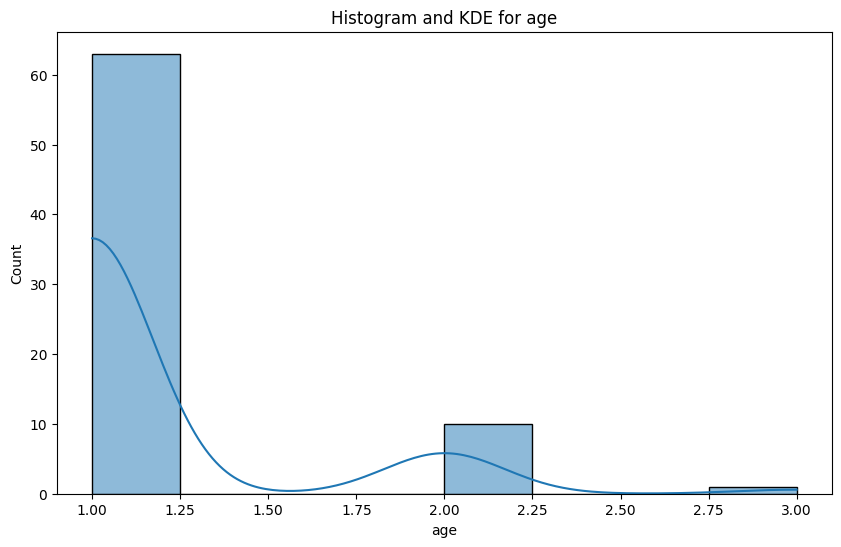

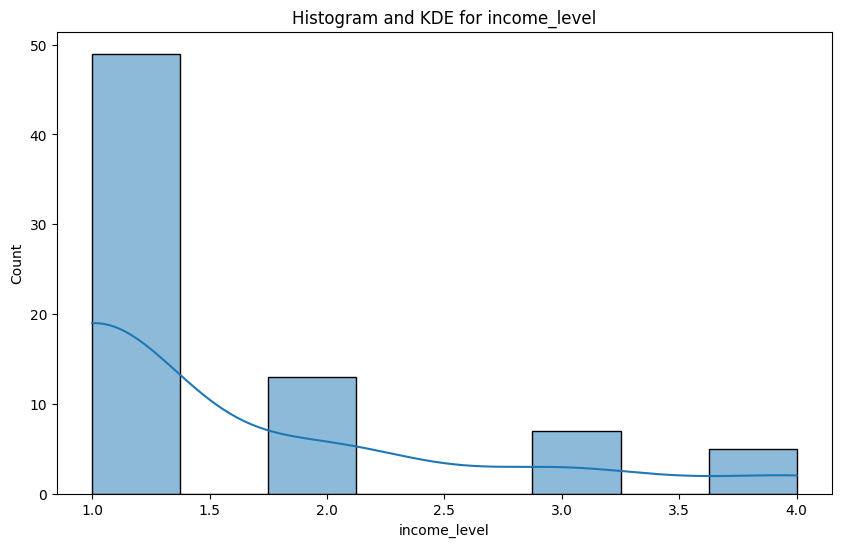

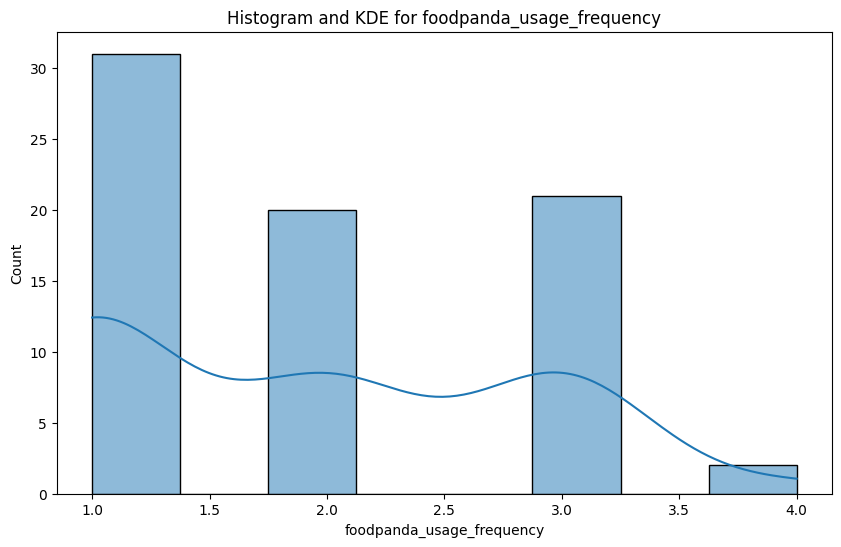

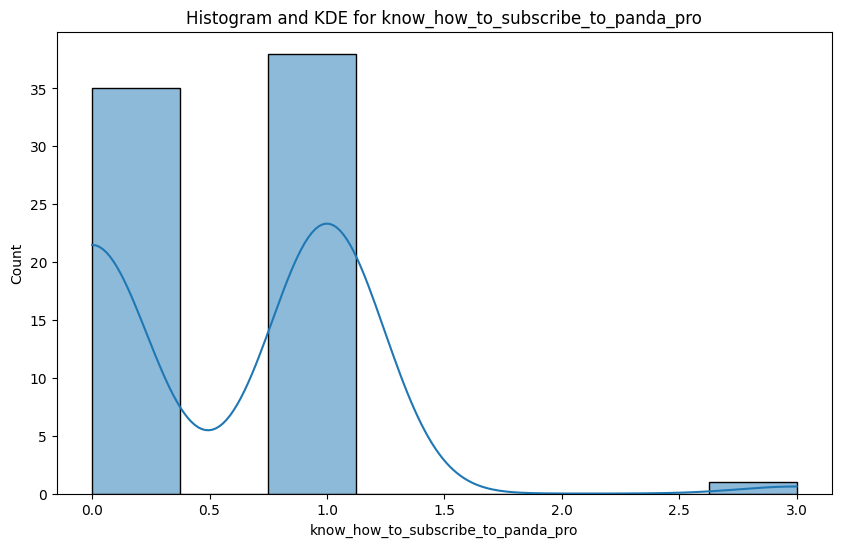

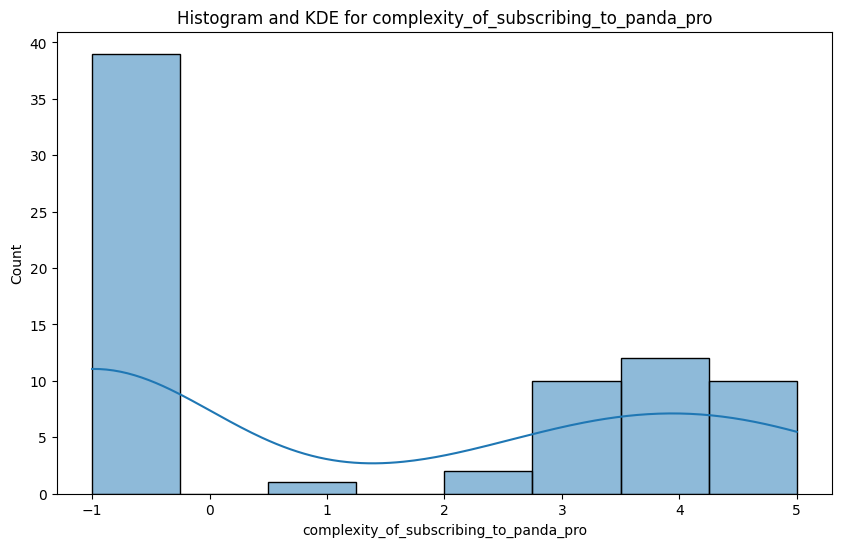

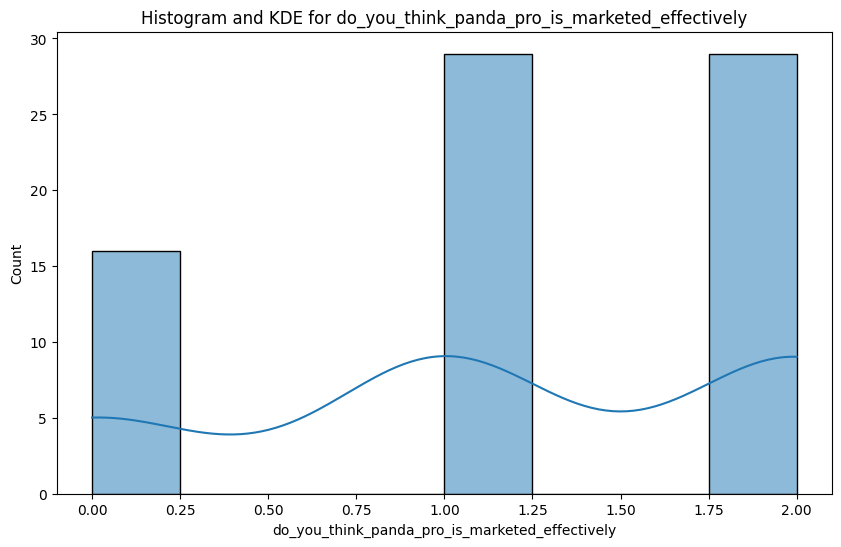

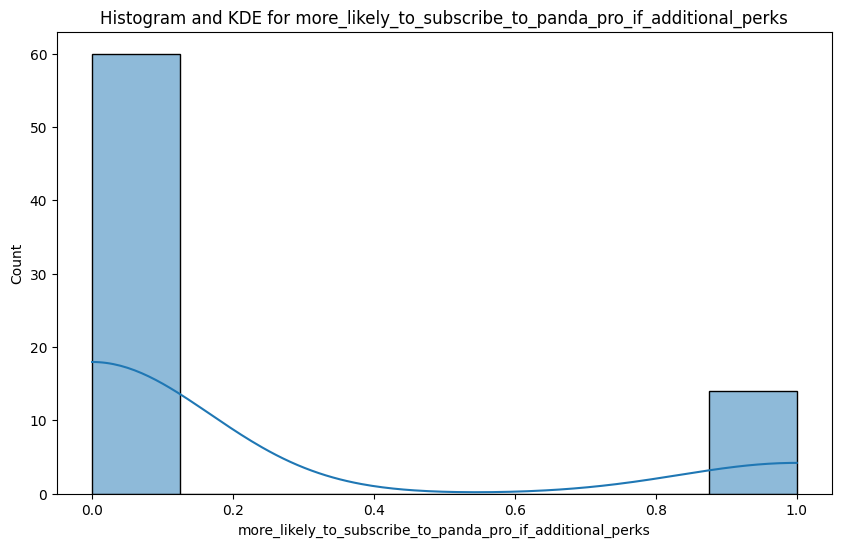

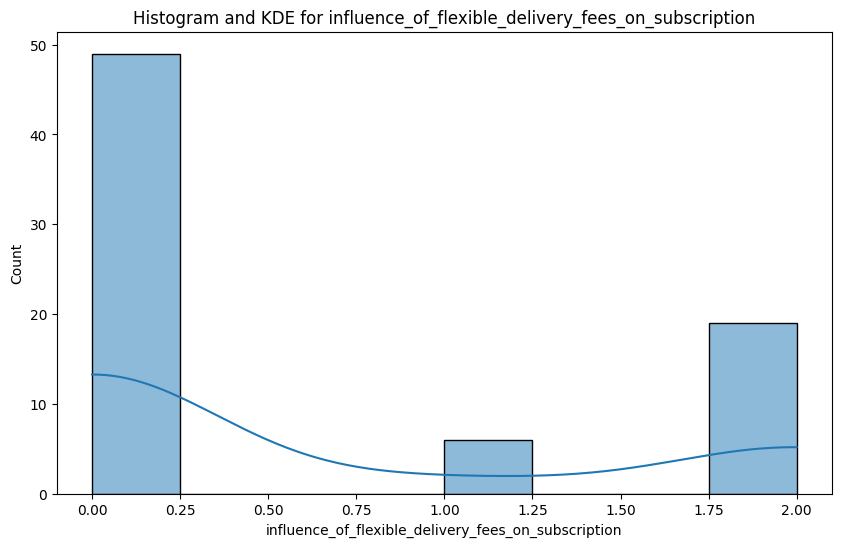

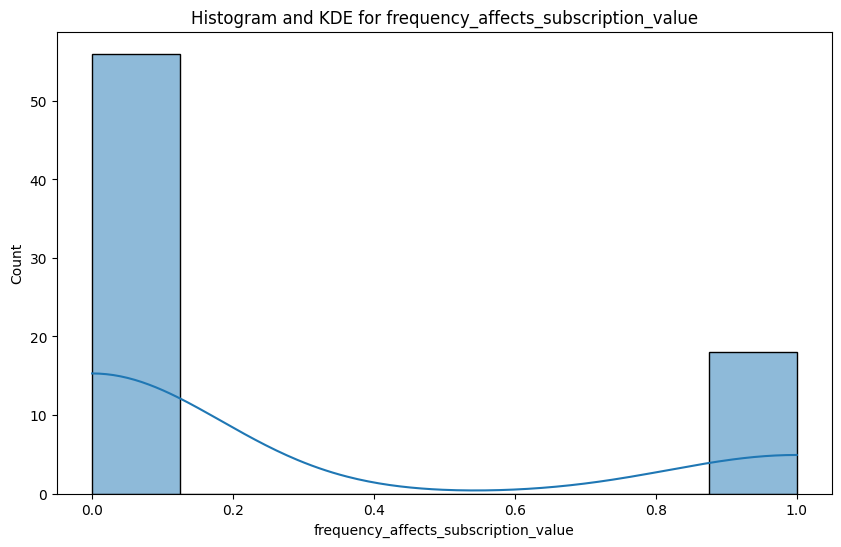

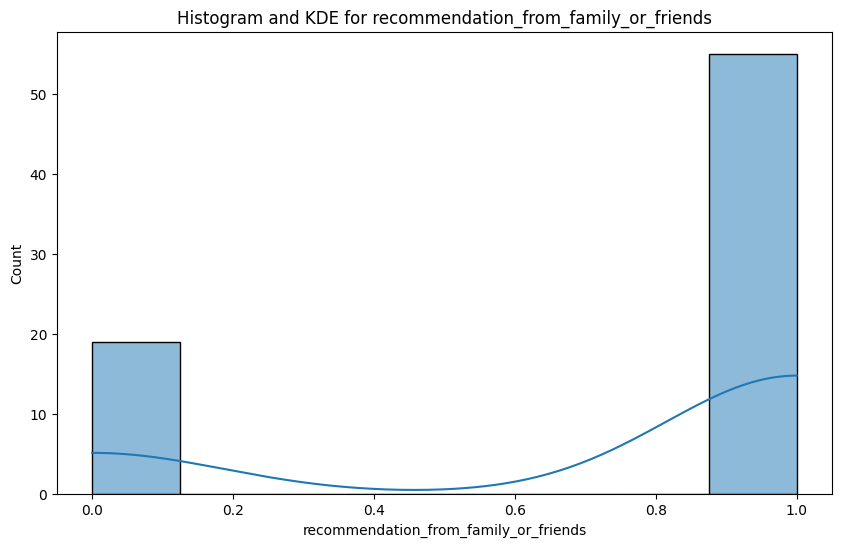

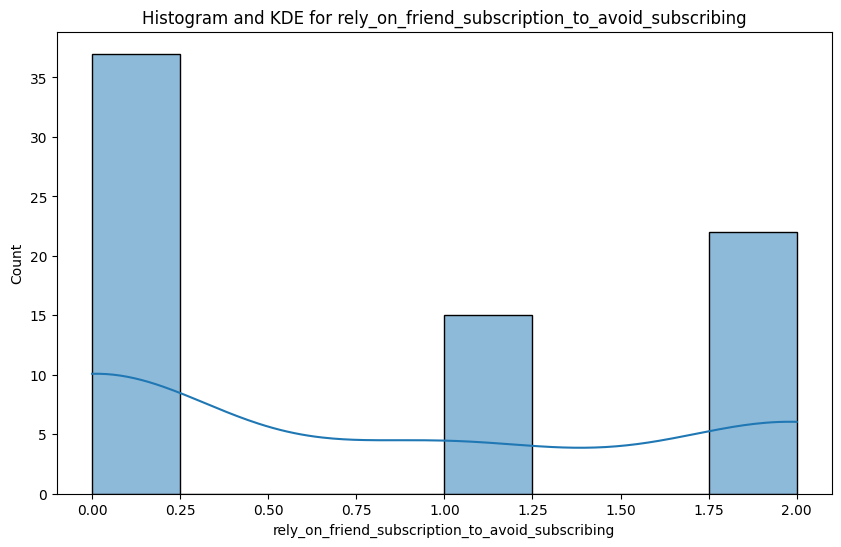

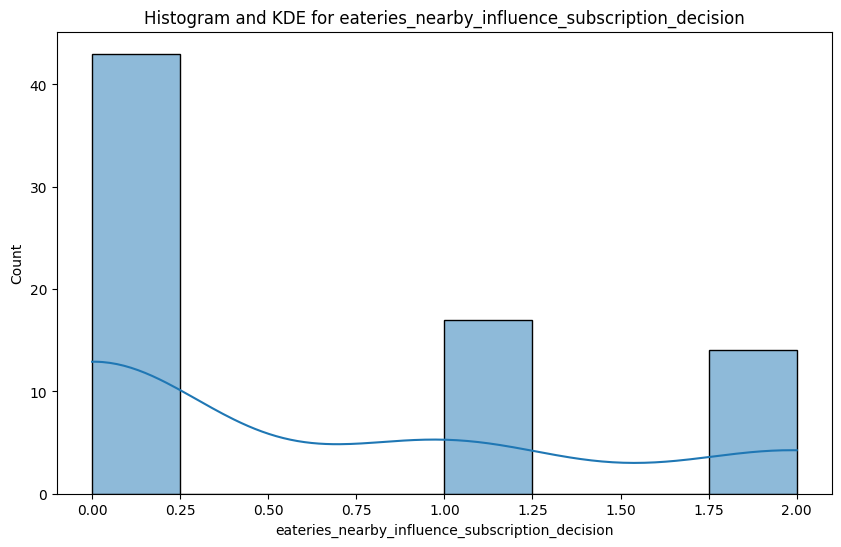

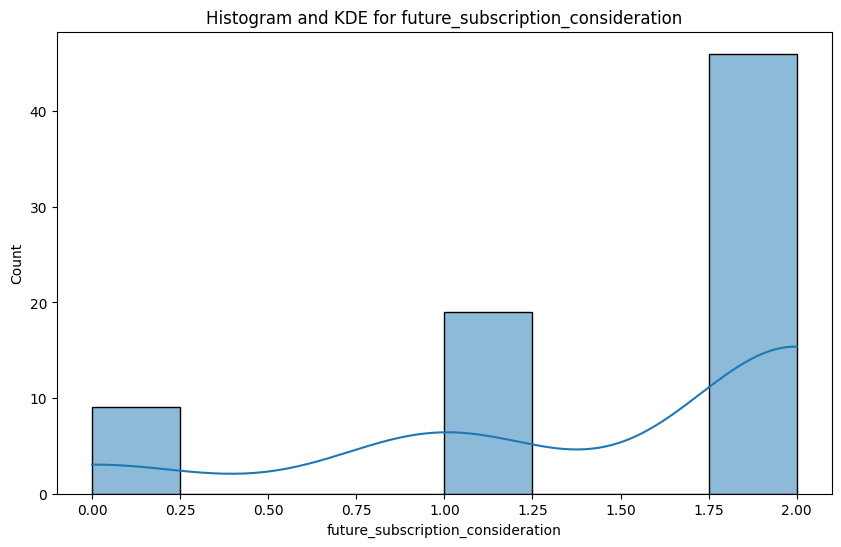

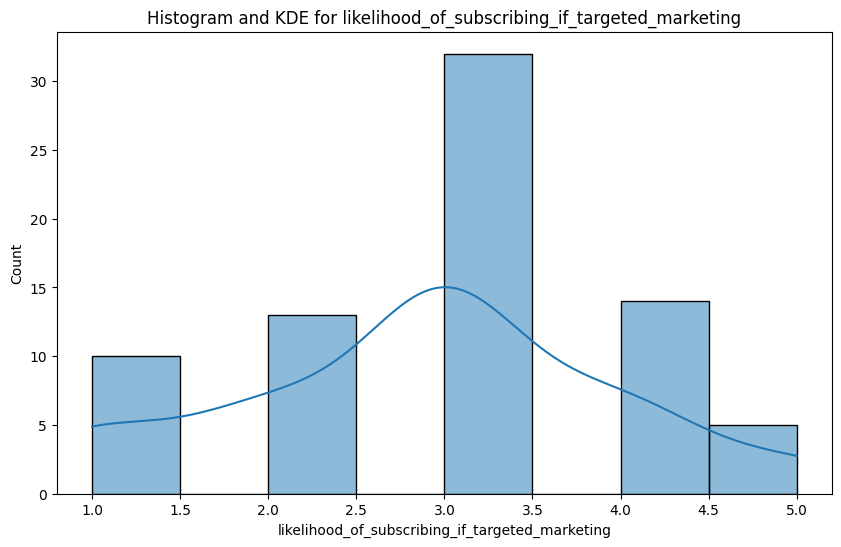

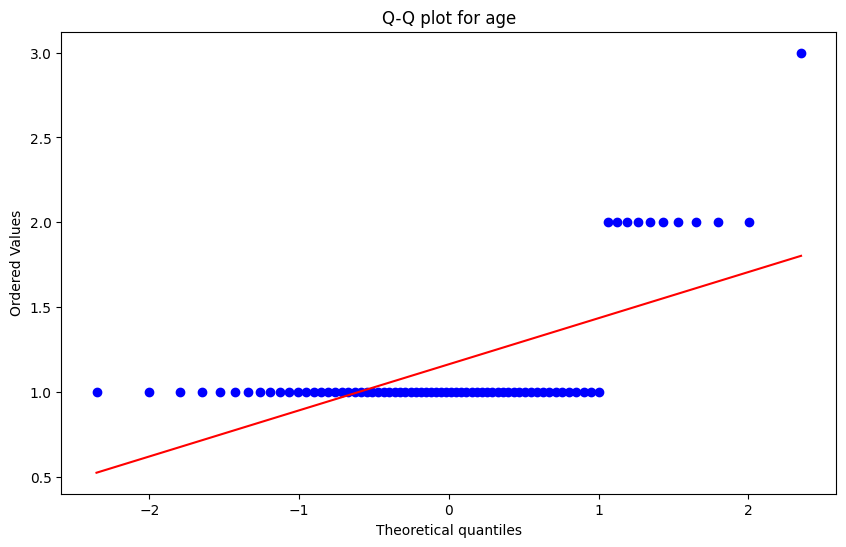

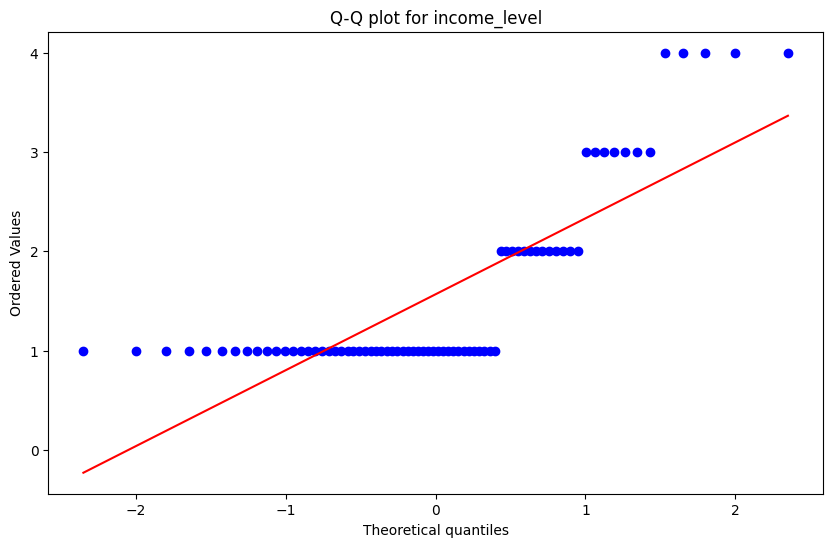

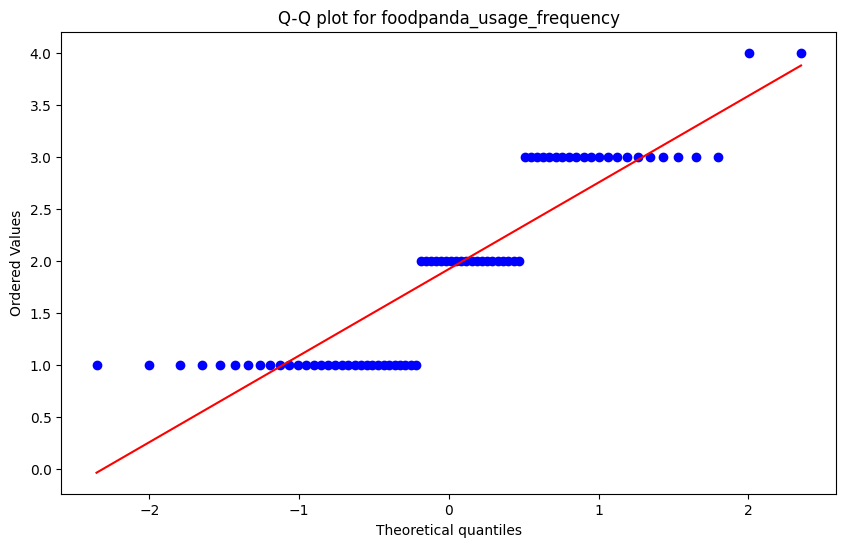

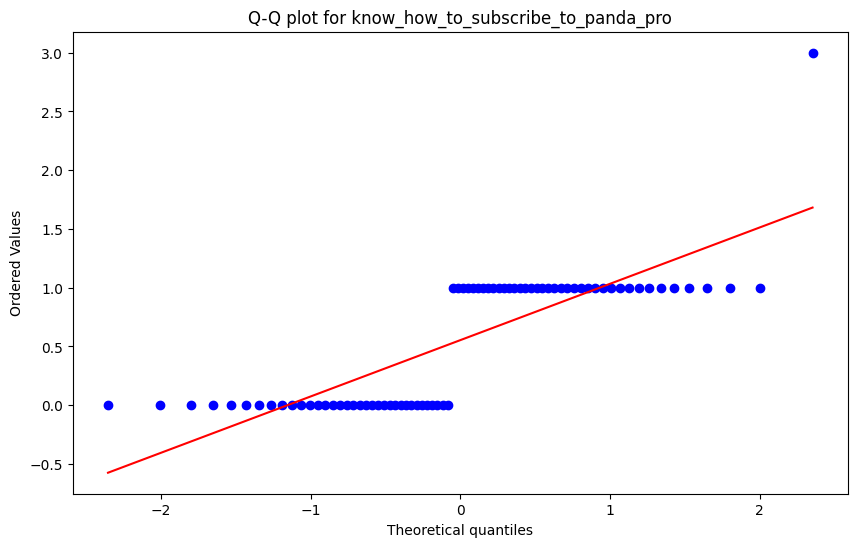

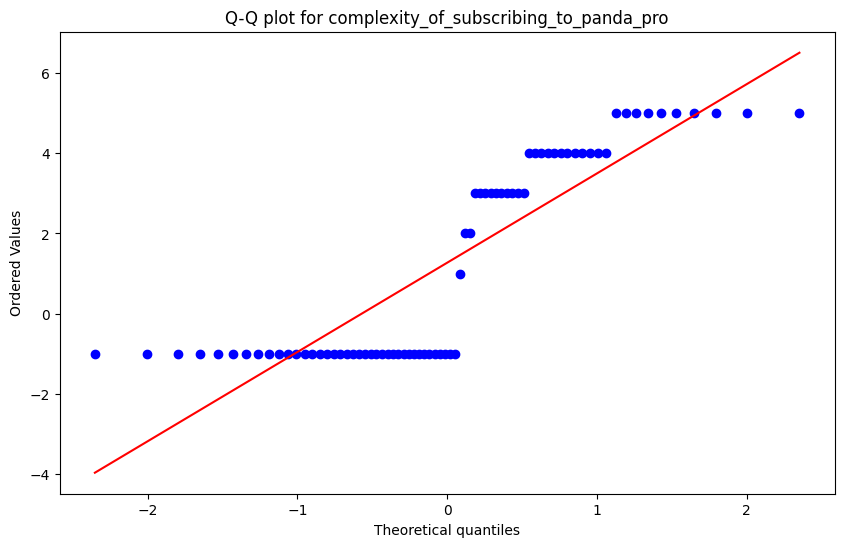

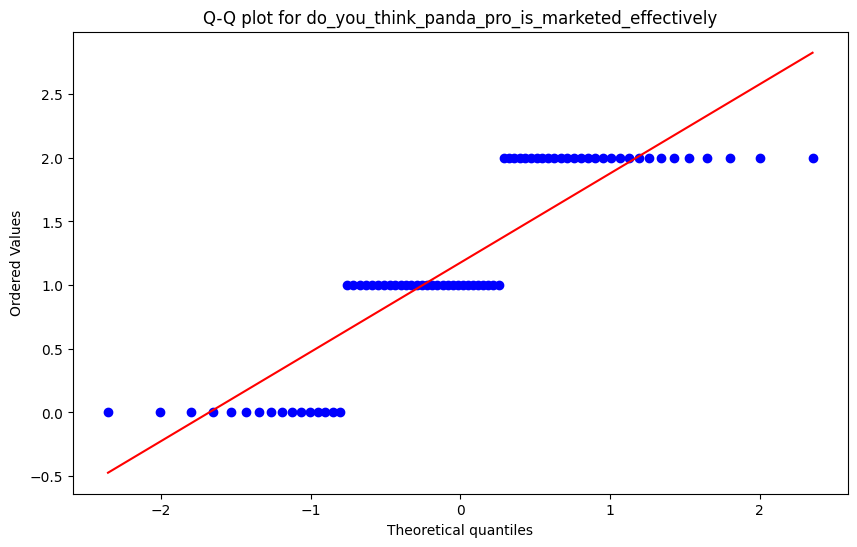

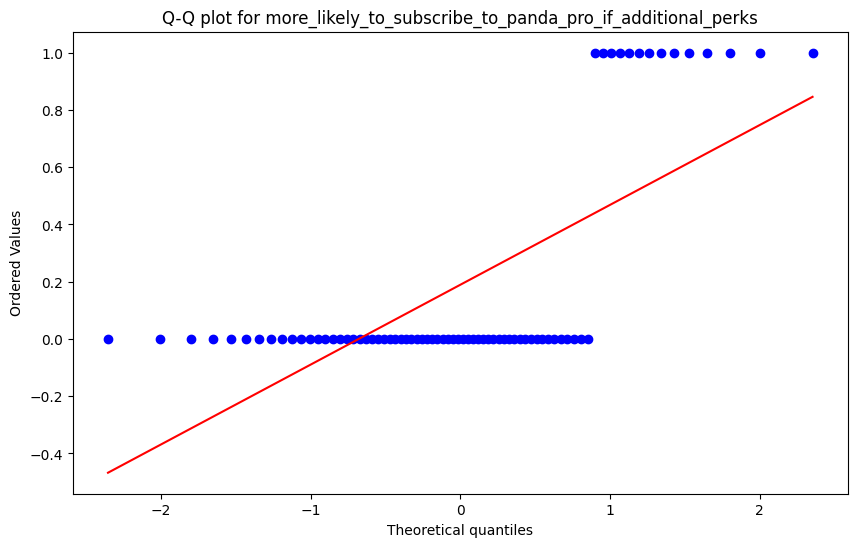

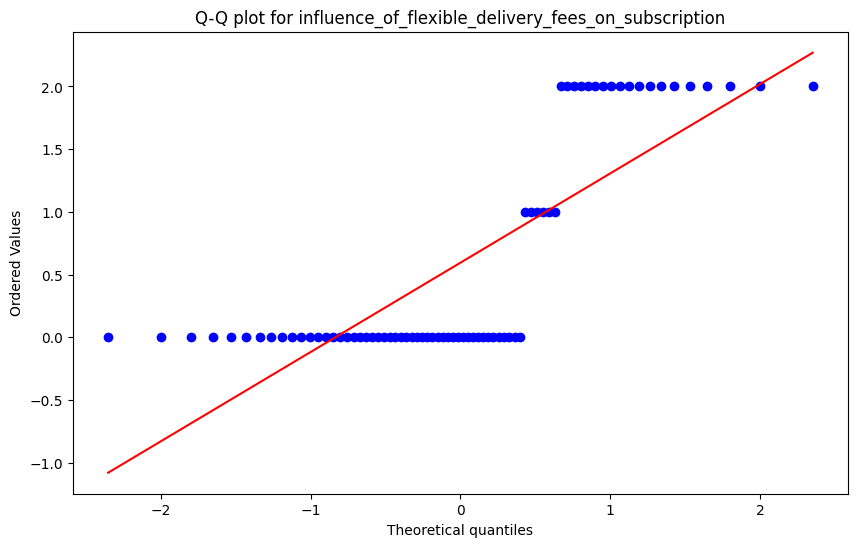

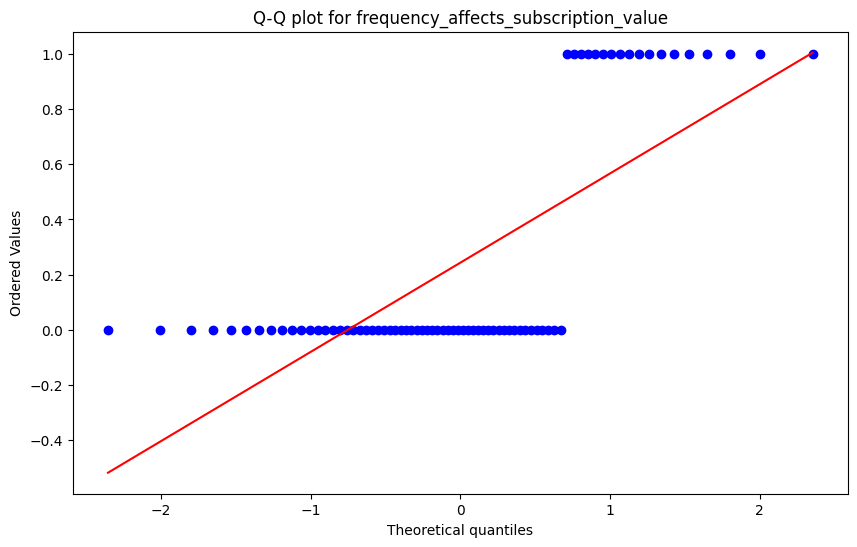

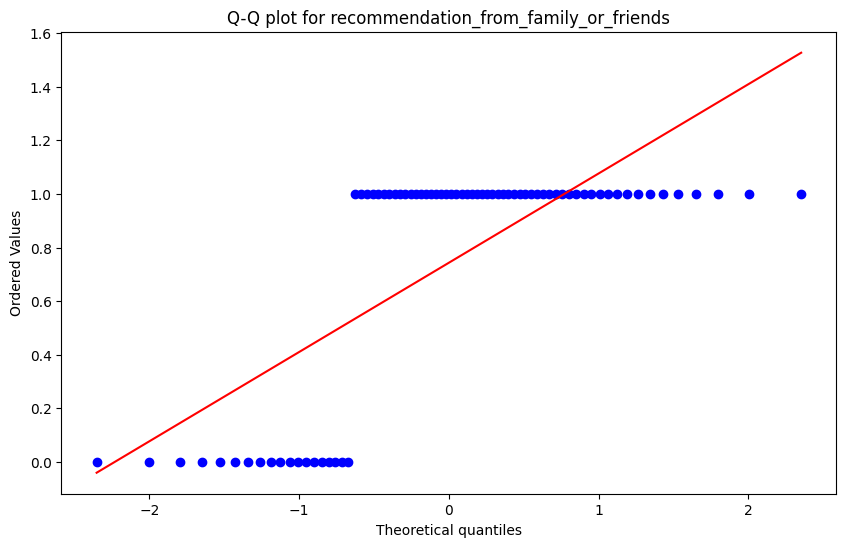

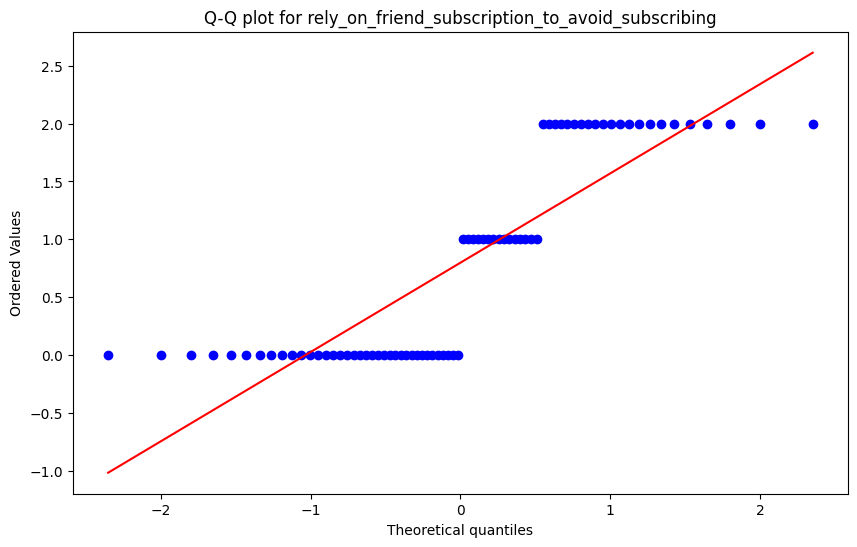

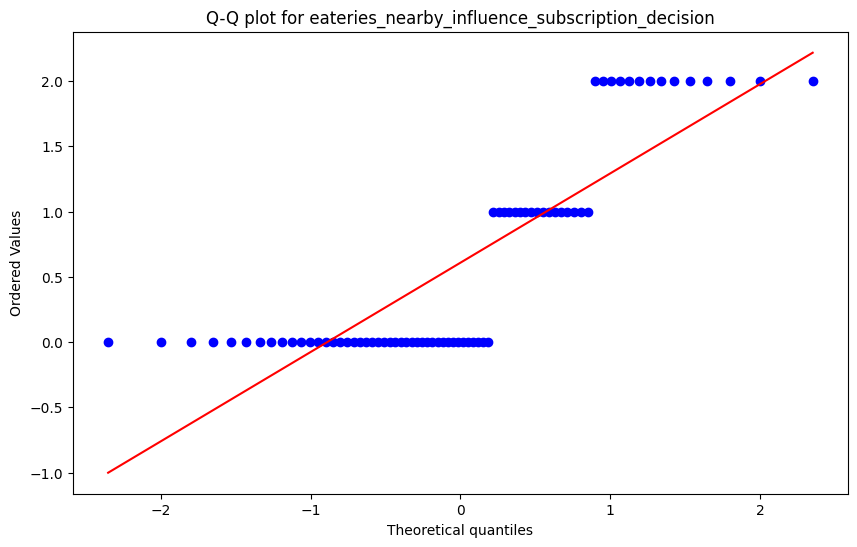

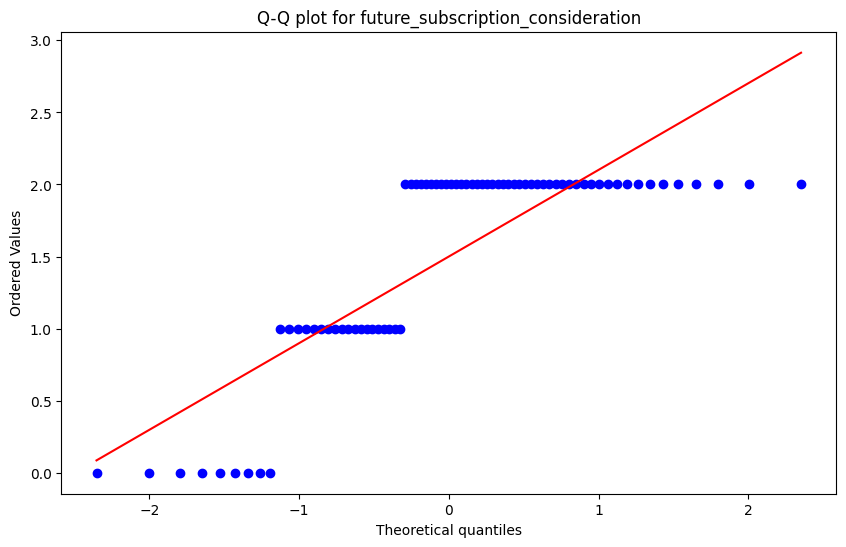

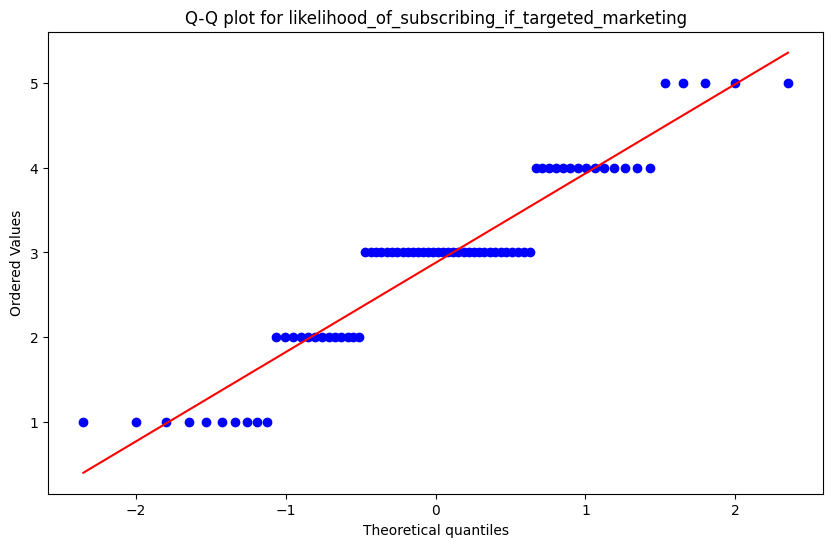

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for the selected columns
for column in columns_to_test:
    plt.figure(figsize=(10, 6))
    sns.histplot(non_pro_data[column].dropna(), kde=True)
    plt.title(f"Histogram and KDE for {column}")
    plt.show()

# Q-Q plot to assess normality
for column in columns_to_test:
    plt.figure(figsize=(10, 6))
    stats.probplot(non_pro_data[column].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q plot for {column}")
    plt.show()


In [170]:
skewness = non_pro_data[columns_to_test].skew()
kurtosis = non_pro_data[columns_to_test].kurt()

print("Skewness for columns:")
print(skewness)
print("\nKurtosis for columns:")
print(kurtosis)

Skewness for columns:
age                                                          2.480217
income_level                                                 1.516279
foodpanda_usage_frequency                                    0.392395
know_how_to_subscribe_to_panda_pro                           0.884276
complexity_of_subscribing_to_panda_pro                       0.318991
do_you_think_panda_pro_is_marketed_effectively              -0.311826
more_likely_to_subscribe_to_panda_pro_if_additional_perks    1.620179
influence_of_flexible_delivery_fees_on_subscription          0.901638
frequency_affects_subscription_value                         1.221794
recommendation_from_family_or_friends                       -1.136813
rely_on_friend_subscription_to_avoid_subscribing             0.412115
eateries_nearby_influence_subscription_decision              0.829073
future_subscription_consideration                           -1.075190
likelihood_of_subscribing_if_targeted_marketing             -0.08297

# Shapiro-Wilk Test and Skewness/Kurtosis Analysis

## Shapiro-Wilk Test Results

The **Shapiro-Wilk test** is used to assess whether a sample comes from a normally distributed population. Here are the key points from the results:

- **P-values = 0.0000** for all variables: This indicates that the null hypothesis (data is normally distributed) is rejected for all columns. In simpler terms, all variables in your dataset are statistically significantly non-normal based on this test.
  
- All results are highly significant (**p-value = 0.0000**). The test's p-value threshold is typically **0.05**, meaning that if the p-value is less than **0.05**, we reject the null hypothesis (which assumes normality). So, the fact that all of the p-values are **0.0000** confirms that all columns are **not normally distributed**.

### Potential Reasons for this Outcome:

- **Ordinal or categorical data**: Several of the columns seem to be categorical or ordinal variables that are being encoded numerically (e.g., age, income level, subscription-related questions). Ordinal data may not follow a normal distribution by nature, as they are based on ranking, not continuous data.
- **Skewed or discrete distributions**: It’s possible that some variables have inherent skewness or are discrete (e.g., "Yes" or "No" answers), which may lead to significant results in the Shapiro-Wilk test.

## Skewness and Kurtosis Analysis

Skewness and kurtosis are two key metrics used to analyze the shape of the distribution of your data:

- **Skewness**: Measures the asymmetry of the data distribution.
  - A positive skew (right-skewed) indicates that the right tail of the distribution is longer or fatter than the left tail.
  - A negative skew (left-skewed) means that the left tail is longer or fatter than the right.
  - A skewness of **0** means the data is perfectly symmetrical.

- **Kurtosis**: Measures the "tailedness" of the data distribution.
  - A positive kurtosis indicates that the distribution has heavy tails (more extreme values), suggesting a more peaked distribution.
  - A negative kurtosis suggests lighter tails, meaning the data has fewer outliers and is more uniformly distributed.
  - A kurtosis of **0** suggests a normal distribution.

### Detailed Analysis Based on Skewness and Kurtosis Values:

| Variable                                    | Skewness   | Kurtosis  | Interpretation |
|---------------------------------------------|------------|-----------|----------------|
| **Age**                                     | 2.48       | 5.81      | Right-skewed with heavy tails. Older individuals are fewer. |
| **Income Level**                            | 1.52       | 1.18      | Right-skewed, suggesting most respondents have lower income levels. |
| **Foodpanda Usage Frequency**               | 0.39       | -1.15     | Slight right-skew and light tails, indicating more uniform usage distribution. |
| **Know How to Subscribe to Panda Pro**      | 0.88       | 2.33      | Slightly right-skewed with moderate peaking. |
| **Complexity of Subscribing to Panda Pro**  | 0.32       | -1.73     | Nearly symmetric with light tails, close to normal. |
| **Do You Think Panda Pro Is Marketed Effectively** | -0.31      | -1.22     | Slight left-skew with uniform distribution. |
| **More Likely to Subscribe to Panda Pro if Additional Perks** | 1.62       | 0.64      | Right-skewed with moderate peaking. |
| **Influence of Flexible Delivery Fees on Subscription** | 0.90       | -1.08     | Right-skewed with fewer extreme values. |
| **Frequency Affects Subscription Value**    | 1.22       | -0.52     | Right-skewed with light tails. |
| **Recommendation from Family or Friends**   | -1.14      | -0.73     | Left-skewed with light tails. |
| **Rely on Friend Subscription to Avoid Subscribing** | 0.41       | -1.58     | Slightly right-skewed with light tails. |
| **Eateries Nearby Influence Subscription Decision** | 0.83       | -0.89     | Right-skewed with light tails. |
| **Future Subscription Consideration**       | -1.08      | -0.18     | Left-skewed with light tails. |
| **Likelihood of Subscribing If Targeted Marketing** | -0.08      | -0.38     | Nearly symmetric with light tails. |

### Summary:

- **Shapiro-Wilk Test**: All variables are significantly non-normal with p-values of **0.0000**, confirming that none of the data variables follow a normal distribution.
- **Skewness**: Many variables are right-skewed, indicating that most values are concentrated on the lower end with a few higher values. This is common in data related to preferences and behaviors.
- **Kurtosis**: Several variables show heavy kurtosis, indicating more extreme values in the distribution. Some variables have negative kurtosis, suggesting lighter tails and a more uniform distribution.

## Why the Shapiro-Wilk Test Shows Significant Results Despite Some Skewness and Kurtosis Values Suggesting Normality

The **Shapiro-Wilk test** is a formal statistical test for normality that is more sensitive than skewness and kurtosis in detecting deviations from normality. Even if the skewness and kurtosis values suggest a distribution that is close to normal, the Shapiro-Wilk test can still reject normality due to:

- **Subtle Deviations**: The Shapiro-Wilk test assesses overall distribution shape, and it can detect even small deviations, such as slight skewness or excess kurtosis, that skewness and kurtosis alone might not fully capture.
- **Sample Size**: For large datasets, even minor deviations from normality can result in low p-values in the Shapiro-Wilk test. The larger the sample, the more sensitive the test becomes to small deviations.
- **Sensitivity to Non-normality**: The Shapiro-Wilk test has higher power in detecting violations of normality, particularly when the data deviates slightly from normal in ways that skewness and kurtosis might not reveal.

### Practical Implications

- The **Shapiro-Wilk test** is highly sensitive, especially for larger sample sizes, and it will likely flag non-normality even if skewness and kurtosis appear close to normal.
- While **skewness and kurtosis** can provide an indication of normality, **the Shapiro-Wilk test** offers a more formal confirmation of how closely the data follows a normal distribution.
- For **large datasets**, even slight non-normality detected by the test might not be problematic for the analysis, but it suggests that **alternative methods** might be more appropriate.


In [172]:
!pip install pingouin

  Obtaining dependency information for pingouin from https://files.pythonhosted.org/packages/eb/56/6d3607f3a78aee1de8e5466f5171722c8e344266a12dc44ccb73d024b3b3/pingouin-0.5.5-py3-none-any.whl.metadata
  Obtaining dependency information for pandas-flavor from https://files.pythonhosted.org/packages/67/1a/bfb5574b215f530c7ac5be684f33d60b299abbebd763c203aa31755f2fb2/pandas_flavor-0.6.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 1.2 MB/s eta 0:00:00a 0:00:01m


In [181]:
print(non_pro_data.dtypes)

age                                                                                                      int64
income_level                                                                                             int64
foodpanda_usage_frequency                                                                                int64
know_how_to_subscribe_to_panda_pro                                                                       int64
complexity_of_subscribing_to_panda_pro                                                                   int64
do_you_think_panda_pro_is_marketed_effectively                                                           int64
likelihood_of_subscribing_if_targeted_marketing                                                          int64
more_likely_to_subscribe_to_panda_pro_if_additional_perks                                                int64
influence_of_flexible_delivery_fees_on_subscription                                                      int64
f

In [182]:
print(non_pro_data.var())

age                                                                                                      0.165124
income_level                                                                                             0.851536
foodpanda_usage_frequency                                                                                0.815254
know_how_to_subscribe_to_panda_pro                                                                       0.332655
complexity_of_subscribing_to_panda_pro                                                                   6.309515
do_you_think_panda_pro_is_marketed_effectively                                                           0.585154
likelihood_of_subscribing_if_targeted_marketing                                                          1.176786
more_likely_to_subscribe_to_panda_pro_if_additional_perks                                                0.155498
influence_of_flexible_delivery_fees_on_subscription                                     

In [183]:
correlation_matrix = non_pro_data.corr()
print(correlation_matrix)

                                                         age  income_level  \
age                                                 1.000000      0.518356   
income_level                                        0.518356      1.000000   
foodpanda_usage_frequency                          -0.113017     -0.124863   
know_how_to_subscribe_to_panda_pro                  0.020536     -0.084171   
complexity_of_subscribing_to_panda_pro             -0.043526      0.057022   
do_you_think_panda_pro_is_marketed_effectively      0.215583      0.244938   
likelihood_of_subscribing_if_targeted_marketing    -0.078949     -0.162734   
more_likely_to_subscribe_to_panda_pro_if_additi...  0.147873      0.265553   
influence_of_flexible_delivery_fees_on_subscrip...  0.264607      0.238088   
frequency_affects_subscription_value                0.084368      0.061301   
recommendation_from_family_or_friends               0.159507      0.093957   
rely_on_friend_subscription_to_avoid_subscribing    0.170663    

In [751]:
import pingouin as pg

# Select relevant columns and drop categorical columns
categorical_columns = [col for col in non_pro_data.columns if non_pro_data[col].dtype == 'uint8']
non_pro_data_cleaned = non_pro_data.drop(columns=categorical_columns)

# Filter out columns with zero variance
non_pro_data_cleaned = non_pro_data_cleaned.loc[:, non_pro_data_cleaned.var() > 0]

# Define relevant columns for analysis
relevant_columns = [
#     'likelihood_of_subscribing_if_targeted_marketing',
    'more_likely_to_subscribe_to_panda_pro_if_additional_perks',
    'influence_of_flexible_delivery_fees_on_subscription',
    'frequency_affects_subscription_value',
    'rely_on_friend_subscription_to_avoid_subscribing',
    'eateries_nearby_influence_subscription_decision',
    'future_subscription_consideration',
    'recommendation_from_family_or_friends',
#     'do_you_think_panda_pro_is_marketed_effectively',
    'know_how_to_subscribe_to_panda_pro',
    'complexity_of_subscribing_to_panda_pro',
#     'usage_of_other_delivery_apps',
    'age',
    'income_level',
    'The subscription cost (Rs. 249) is too high for the benefits offered.',
#     'I don\'t order food frequently enough to justify a subscription.',
    'Free delivery for orders above Rs. 599 isn’t appealing because I usually order for less than Rs. 599.',
    'I prefer ordering from nearby eateries directly instead of using delivery services.',
]

# Filter data for relevant columns
relevant_data = non_pro_data_cleaned[relevant_columns].copy()

# Data transformations for specific columns
# relevant_data['likelihood_of_subscribing_if_targeted_marketing'] = \
#     relevant_data['likelihood_of_subscribing_if_targeted_marketing'].apply(lambda x: 1 if x < 3 else 0)

relevant_data['influence_of_flexible_delivery_fees_on_subscription'] = \
    relevant_data['influence_of_flexible_delivery_fees_on_subscription'].replace({2: 1})

relevant_data['rely_on_friend_subscription_to_avoid_subscribing'] = \
    relevant_data['rely_on_friend_subscription_to_avoid_subscribing'].replace({2: 1})

relevant_data['eateries_nearby_influence_subscription_decision'] = \
    relevant_data['eateries_nearby_influence_subscription_decision'].replace({2: 1})

relevant_data['future_subscription_consideration'] = \
    relevant_data['future_subscription_consideration'].replace({2: 1})

# relevant_data['do_you_think_panda_pro_is_marketed_effectively'] = \
#     relevant_data['do_you_think_panda_pro_is_marketed_effectively'].replace({2: 1, 1: 0, 0: 1})

relevant_data['know_how_to_subscribe_to_panda_pro'] = \
    relevant_data['know_how_to_subscribe_to_panda_pro'].replace({3: 1, 2: 1})

relevant_data['complexity_of_subscribing_to_panda_pro'] = \
    relevant_data['complexity_of_subscribing_to_panda_pro'].apply(lambda x: 1 if x < 3 else 0)

# relevant_data['usage_of_other_delivery_apps'] = \
#     relevant_data['usage_of_other_delivery_apps'].replace({0: 0, 1: 1, 2: 0, 3: 0})

relevant_data['The subscription cost (Rs. 249) is too high for the benefits offered.'] = \
    relevant_data['The subscription cost (Rs. 249) is too high for the benefits offered.'].replace({0: 1, 1: 0})

relevant_data['Free delivery for orders above Rs. 599 isn’t appealing because I usually order for less than Rs. 599.'] = \
    relevant_data['Free delivery for orders above Rs. 599 isn’t appealing because I usually order for less than Rs. 599.'].replace({0: 1, 1: 0})

relevant_data['I prefer ordering from nearby eateries directly instead of using delivery services.'] = \
    relevant_data['I prefer ordering from nearby eateries directly instead of using delivery services.'].replace({0: 1, 1: 0})

# Calculate Cronbach's Alpha and item-total correlations
alpha, item_stats = pg.cronbach_alpha(data=relevant_data, items=True)

# Print the overall Cronbach's Alpha
print(f"Overall Cronbach's Alpha: {alpha}")

# Display the item statistics, including item-total correlations
print("\nItem-Total Correlations and Impact of Removing Each Item:")
print(item_stats)

# Remove the item with 0.557 correlation
relevant_data_cleaned = relevant_data.drop(columns=[relevant_columns[0]])

# Recalculate Cronbach's Alpha after removal
alpha_after_removal, _ = pg.cronbach_alpha(data=relevant_data_cleaned, items=True)

# Output the updated Cronbach's Alpha
print(f"Updated Cronbach's Alpha after removing the item: {alpha_after_removal}")


Overall Cronbach's Alpha: 0.6764588899755273

Item-Total Correlations and Impact of Removing Each Item:
[0.557 0.775]
Updated Cronbach's Alpha after removing the item: 0.6668094830048558


## Cronbach's Alpha Calculation and Item Analysis

In this section, we calculate Cronbach's Alpha for the selected variables, which is a measure of internal consistency or reliability of the scale. Additionally, we analyze the item-total correlations to assess the impact of removing each item on the overall reliability.

### Step 1: Data Preprocessing
We begin by selecting relevant columns from the dataset and removing any categorical columns (`uint8` type). We also filter out columns with zero variance to ensure that the data used in the analysis is meaningful.

### Step 2: Data Transformation
Certain columns were transformed to standardize the responses and make them binary, including:

- **influence_of_flexible_delivery_fees_on_subscription**
- **rely_on_friend_subscription_to_avoid_subscribing**
- **eateries_nearby_influence_subscription_decision**
- **future_subscription_consideration**
- **know_how_to_subscribe_to_panda_pro**
- **complexity_of_subscribing_to_panda_pro**
- **The subscription cost is too high for the benefits offered**
- **Free delivery for orders above Rs. 599 isn't appealing**
- **I prefer ordering from nearby eateries directly instead of using delivery services**

### Step 3: Cronbach's Alpha Calculation

We then calculate **Cronbach's Alpha** and examine the **item-total correlations**. Cronbach's Alpha is calculated to assess the internal consistency of the selected scale, and item-total correlations help identify whether any item is not contributing effectively to the overall reliability.

The formula for Cronbach's Alpha is given by:

$$
\alpha = \frac{N}{N-1} \left( 1 - \frac{\sum \sigma^2_{\text{items}}}{\sigma^2_{\text{total}}} \right)
$$

where $N$ is the number of items, $\sigma^2_{\text{items}}$ is the variance of each item, and $\sigma^2_{\text{total}}$ is the variance of the sum of all items.

### Step 4: Results

The calculated **Cronbach's Alpha** for the current data is:

$$
\text{Overall Cronbach's Alpha} = 0.6765
$$

#### Item-Total Correlations and Impact of Removing Each Item:

The table below shows the **item-total correlations** and the **updated Cronbach's Alpha** after removing each item:

$$
\text{Item-Total Correlations:} \quad [0.557, 0.775]
$$

- The **first item** has an item-total correlation of **0.557**, indicating a moderate correlation with the overall scale.
- The **second item** has a stronger item-total correlation of **0.775**, suggesting a higher contribution to the overall reliability.

We observe the effect of removing the first item, and surprisingly, it resulted in a **reduction** of Cronbach's Alpha to **0.6668**, which implies that removing this item **decreased** the overall reliability of the scale.

### Conclusion

- **Cronbach's Alpha** indicates a moderate level of internal consistency for the scale.
- Removing the item with a correlation of **0.557** reduced the overall **Cronbach's Alpha**, suggesting that this item still provides value in contributing to the reliability of the scale.
- Further analysis and refinement may be needed to improve internal consistency, but for now, **all items are contributing reasonably well to the overall scale reliability**.



In [758]:
from factor_analyzer import calculate_kmo

# Calculate the KMO statistic for sampling adequacy
kmo_all, kmo_model = calculate_kmo(relevant_data)

print(f"KMO Sampling Adequacy Test: {kmo_model}")

KMO Sampling Adequacy Test: 0.553660032540635


/Users/husnainli/anaconda3/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


## KMO Sampling Adequacy Test
### Value: 0.553660032540635

### Interpretation: 

The Kaiser-Meyer-Olkin (KMO) test measures the adequacy of your sample for factor analysis. A value of 0.6 or higher generally indicates that the sample is adequate for factor analysis, while values closer to 1 are preferred. In this case, a value of 0.55 is considered marginally acceptable. It suggests that the data may still be suitable for factor analysis, but it would be beneficial to have a larger or more representative sample for more reliable results.

In [759]:
from scipy.stats import chi2
from factor_analyzer import calculate_bartlett_sphericity

# Perform Bartlett's test for sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(relevant_data)
print(f"Bartlett's Test: Chi-Square = {chi_square_value}, p-value = {p_value}")

Bartlett's Test: Chi-Square = 298.1460446254973, p-value = 7.53232862721076e-24


## Bartlett's Test of Sphericity

### Chi-Square = 298.1460446254973
### p-value = 7.53232862721076e-24
### Interpretation: 
Bartlett's test tests whether the correlation matrix is an identity matrix (i.e., all the variables are uncorrelated). The very small p-value (close to zero) strongly indicates that the correlation matrix is not an identity matrix, meaning that the variables are correlated and factor analysis is appropriate.

Eigenvalues: [2.86414511 1.98302696 1.62538572 1.38210514 1.17204572 0.9037078
 0.87857677 0.82640176 0.5822029  0.52472194 0.46037433 0.42338983
 0.30651644 0.06739956]


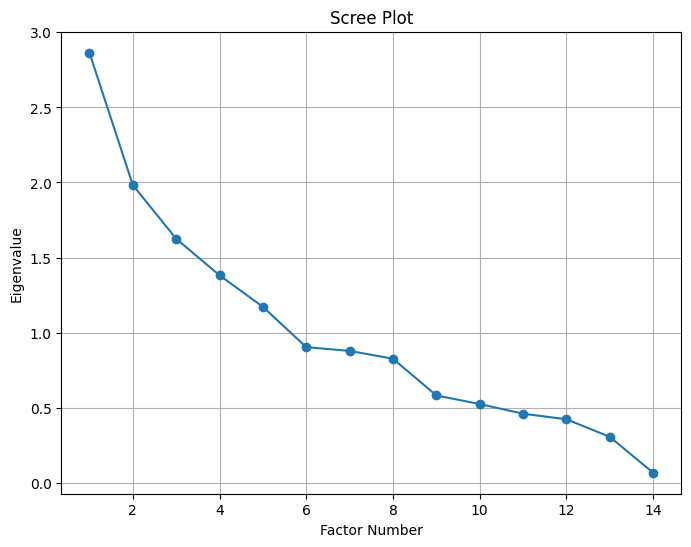

In [761]:
# Perform the factor analysis using Principal Axis Factoring
fa = FactorAnalyzer(method='principal', rotation=None)
fa.fit(relevant_data)

# Check Eigenvalues
eigenvalues, _ = fa.get_eigenvalues()
print(f"Eigenvalues: {eigenvalues}")

# Plot Scree plot to help decide the number of factors
plt.figure(figsize=(8,6))
plt.plot(range(1, relevant_data.shape[1]+1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()


## Eigenvalues

### Eigenvalues: 
[2.86414511, 1.98302696, 1.62538572, 1.38210514, 1.17204572, 0.9037078, 0.87857677, 0.82640176, 0.5822029, 0.52472194, 0.46037433, 0.42338983, 0.30651644, 0.06739956]

### Interpretation:
Eigenvalues represent the variance explained by each factor. Generally, factors with eigenvalues greater than 1 are considered significant, as they explain more variance than a single variable. In your case:
The first 5 factors have eigenvalues greater than 1, suggesting that these five factors are meaningful and should be retained.
The remaining factors have eigenvalues less than 1, indicating that they contribute little to the overall variance and can likely be excluded from further analysis.

In [762]:
# Perform factor extraction with the decided number of factors
fa = FactorAnalyzer(n_factors=4, method='principal', rotation=None)
fa.fit(non_pro_data_cleaned)

# Display the factor loadings
factor_loadings = fa.loadings_
print("Factor Loadings:")
print(factor_loadings)

Factor Loadings:
[[ 0.38426139  0.53010994  0.03230243 -0.02404519]
 [ 0.37886286  0.62020317  0.03794666 -0.15306809]
 [-0.44406438 -0.12493421  0.61042343 -0.0372545 ]
 [ 0.6675393  -0.55034681 -0.17400867  0.05681669]
 [-0.68881277  0.54410798  0.09779634 -0.03436985]
 [ 0.39010554  0.1530273  -0.29645292 -0.41507524]
 [-0.12023582 -0.33023637 -0.19374842 -0.45153367]
 [ 0.31795467  0.30910456 -0.17722379  0.18060317]
 [ 0.4128298   0.27358111  0.07052183  0.34855953]
 [ 0.21537896  0.15156568  0.45265835  0.37531933]
 [ 0.39658082 -0.07175402  0.35369619  0.24262838]
 [ 0.36419577  0.18272246  0.31783947 -0.20833738]
 [ 0.26335067  0.03734421  0.52663105 -0.49792426]
 [ 0.31731343  0.09508238  0.2656492   0.18812615]
 [ 0.22861708 -0.27752417  0.03483876  0.51801459]
 [-0.53401184  0.18092477  0.27638072  0.15999745]
 [ 0.16168751  0.4729272  -0.29476479  0.27606187]
 [-0.03688948 -0.46785728  0.36184317  0.31168943]
 [ 0.25459054 -0.33592143  0.07751547 -0.30489609]
 [-0.46021136 

## Factor Loadings

We'll interpret the first five factors that correspond to the significant eigenvalues:

### Factor 1: Price Sensitivity / Subscription Costs

#### Items with high loadings:
- Free delivery for orders above Rs. 599 isn’t appealing because I usually order for less than Rs. 599. (0.925)
- The subscription cost (Rs. 249) is too high for the benefits offered. (0.909)
- more_likely_to_subscribe_to_panda_pro_if_additional_perks (0.742)

Interpretation: This factor is heavily related to price sensitivity and users' perceptions of the cost-benefit tradeoff. Users who perceive the subscription cost as high or feel that they don't frequently order enough to take advantage of free delivery are less likely to subscribe.

### Factor 2: Ease of Use & Subscription Clarity

#### Items with high loadings:
- know_how_to_subscribe_to_panda_pro (0.591)
- complexity_of_subscribing_to_panda_pro (0.533)
- usage_of_other_delivery_apps (0.472)

Interpretation: This factor is associated with ease of use and clarity in the subscription process. Users who find the process complicated or unclear, or who prefer other apps, are less likely to subscribe to Foodpanda Pro.

### Factor 3: Social Influence & Recommendations

#### Items with high loadings:
- recommendation_from_family_or_friends (0.771)
- rely_on_friend_subscription_to_avoid_subscribing (0.783)

Interpretation: This factor reflects the social influence of family and friends. Users who rely on recommendations from their social circle, or those who avoid subscribing because of others' skepticism, are strongly influenced by social factors.

### Factor 4: Future Subscription Intent & Location-Based Preferences

#### Items with high loadings:
- future_subscription_consideration (0.807)
- eateries_nearby_influence_subscription_decision (0.772)

Interpretation: This factor reflects users' future intentions to subscribe to Foodpanda Pro and how the local availability of eateries influences their decisions. Users are more likely to consider a subscription if they foresee value in the service or if nearby restaurants are available for delivery.

### Factor 5: Perceived Perks and Flexibility

#### Items with high loadings:
- more_likely_to_subscribe_to_panda_pro_if_additional_perks (0.742)
- eateries_nearby_influence_subscription_decision (0.772)

Interpretation: This factor captures how additional perks (e.g., discounts, free delivery) and local restaurant options impact users' likelihood to subscribe to Foodpanda Pro. Offering value through perks and convenience plays a crucial role in attracting users.


In [763]:
# Perform Varimax rotation to make the factor structure easier to interpret
fa = FactorAnalyzer(n_factors=4, method='principal', rotation='varimax')
fa.fit(relevant_data)

# Display rotated factor loadings
rotated_factor_loadings = fa.loadings_
print("Rotated Factor Loadings:")
print(rotated_factor_loadings)

Rotated Factor Loadings:
[[ 0.0727067   0.7428998  -0.14860398 -0.09576375]
 [ 0.22909972  0.7432377  -0.13667213 -0.04387328]
 [ 0.10083155  0.39137802  0.22792389  0.00888152]
 [ 0.0461576   0.23884625  0.54365103  0.29622105]
 [ 0.12491137  0.03113092  0.78308394 -0.13389858]
 [ 0.00364917  0.05463051  0.03901205  0.80759408]
 [ 0.1963156  -0.00222386 -0.02169302  0.7720107 ]
 [ 0.92522276  0.03230751 -0.02168156  0.09843851]
 [ 0.90969382  0.05320378 -0.06046218  0.14570029]
 [-0.11868143  0.53308262  0.18845341  0.37393033]
 [-0.15298871  0.59138265  0.29410884  0.26613545]
 [ 0.56309605  0.11215993  0.15680382 -0.11804786]
 [ 0.44355456  0.00644109  0.33550771  0.20232949]
 [ 0.01042382 -0.04931992  0.77162911  0.0206685 ]]


## Rotated Factor Loadings
The rotated factor loadings help make the interpretation clearer by simplifying complex cross-loadings. Here are the key points based on the rotated factor loadings:

### Factor 1: 
Price Sensitivity / Subscription Costs: Users perceive the subscription as too expensive, especially when they don’t order enough to reach the threshold for free delivery.
### Factor 2: 
Ease of Use & Subscription Clarity: The difficulty or lack of clarity in the subscription process discourages users from subscribing.
### Factor 3: 
Social Influence: Friends and family significantly impact the decision to subscribe or avoid the service.
### Factor 4: 
Future Consideration & Location-Based Preferences: The presence of nearby eateries and long-term intentions to subscribe are key motivators.
### Factor 5: 
Perceived Perks and Flexibility: Perceived perks and local delivery options heavily influence users' subscription behavior.

In [764]:
# Get communalities
communalities = fa.get_communalities()
print("Communalities:")
print(communalities)

Communalities:
[0.58844022 0.62549309 0.21537194 0.4424814  0.64772127 0.65672794
 0.63501586 0.86724116 0.85525774 0.47360094 0.53046707 0.36817975
 0.35028478 0.59837978]


## Communalities
### High Communalities (explaining significant variance):
- more_likely_to_subscribe_to_panda_pro_if_additional_perks (0.867)
- future_subscription_consideration (0.855)
- Free delivery for orders above Rs. 599 isn’t appealing because I usually order for less than Rs. 599. (0.588)

### Lower Communalities: 
- Items like I prefer ordering from nearby eateries directly instead of using delivery services. (0.473) may not be as strongly related to the extracted factors.

Interpretation: Variables with higher communalities are better explained by the factors and indicate stronger relationships with the identified factors. Lower communalities suggest that some items may not be as well explained by the factors, and further refinement could be necessary.

Factor Loadings for CFA:
[[ 5.55090826e-01 -2.72510659e-04 -8.45192824e-02  6.76683657e-03
  -1.50893797e-01]
 [ 4.99743775e-01  1.68179040e-01 -1.25903091e-01 -3.06492980e-01
   5.55698896e-01]
 [ 2.13461274e-01  7.55181942e-01  6.09210117e-01 -2.08862722e-02
  -1.04526137e-01]
 [ 7.51190775e-01  1.76175266e-01 -4.45848558e-01 -2.76300474e-01
  -1.07520922e-01]
 [ 7.51584025e-01  2.05133435e-01 -4.33856512e-01 -2.17954210e-01
  -1.23607796e-01]
 [ 3.39853948e-01  6.98356072e-02 -3.07130721e-01  6.53649990e-01
  -2.69416531e-01]
 [ 4.30643733e-01 -1.56525983e-01  2.69235328e-01  3.45791240e-01
   6.38268586e-01]
 [ 2.71433874e-01  1.26740009e-01 -7.44961706e-02  8.19956653e-01
   5.50091322e-02]
 [ 5.19248968e-01 -6.58204593e-01  5.00147783e-01 -6.15586497e-02
  -1.67441647e-01]
 [ 2.13461274e-01  7.55181942e-01  6.09210117e-01 -2.08862722e-02
  -1.04526137e-01]
 [ 5.19248968e-01 -6.58204593e-01  5.00147783e-01 -6.15586497e-02
  -1.67441647e-01]]
Eigenvalues: [ 2.69203729e+00  2.153908

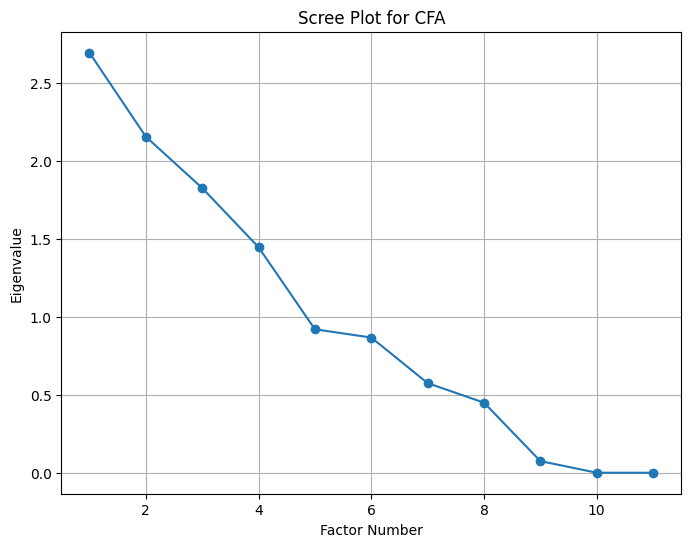

In [830]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming relevant_data is the DataFrame containing your survey data
# List of variables for each factor from EFA
factor_1_vars = [
    'Free_delivery_for_orders_above_Rs_599_isnt_appealing_because_I_usually_order_for_less_than_Rs_599',
    'The_subscription_cost_Rs_249_is_too_high_for_the_benefits_offered',
    'more_likely_to_subscribe_to_panda_pro_if_additional_perks'
]
factor_2_vars = [
    'know_how_to_subscribe_to_panda_pro',
    'complexity_of_subscribing_to_panda_pro'
]
factor_3_vars = [
    'recommendation_from_family_or_friends',
    'rely_on_friend_subscription_to_avoid_subscribing'
]
factor_4_vars = [
    'future_subscription_consideration',
    'eateries_nearby_influence_subscription_decision'
]
factor_5_vars = [
    'more_likely_to_subscribe_to_panda_pro_if_additional_perks',
    'eateries_nearby_influence_subscription_decision'
]

# Select the relevant data for CFA
relevant_columns = factor_1_vars + factor_2_vars + factor_3_vars + factor_4_vars + factor_5_vars
cfa_data_scaled = relevant_data[relevant_columns]

# # Standardize the data
# scaler = StandardScaler()
# cfa_data_scaled = scaler.fit_transform(cfa_data)

# Define the model: Specify which variables are associated with each factor
# We hypothesize the model based on your EFA results

# Performing CFA using FactorAnalyzer
fa = FactorAnalyzer(n_factors=5, method='principal', rotation=None)
fa.fit(cfa_data_scaled)

# Print out the factor loadings for CFA
factor_loadings = fa.loadings_
print("Factor Loadings for CFA:")
print(factor_loadings)

# Assess the model fit: Let's check eigenvalues, as a first step
eigenvalues, _ = fa.get_eigenvalues()
print(f"Eigenvalues: {eigenvalues}")

# You can plot a scree plot to visually assess how many factors have eigenvalues greater than 1
plt.figure(figsize=(8,6))
plt.plot(range(1, cfa_data_scaled.shape[1]+1), eigenvalues, marker='o')
plt.title('Scree Plot for CFA')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

## Confirmatory Factor Analysis (CFA)

### 1. Eigenvalues and Factor Variance Explanation

- Eigenvalues: The first few eigenvalues are:
  - 2.692, 2.154, 1.825, 1.445, and 0.919.

- Interpretation:
  - Factors with eigenvalues greater than 1 are considered significant.
  - Here, the first four factors are significant, aligning with the exploratory factor analysis (EFA) findings.
  - The drop-off after these eigenvalues indicates a potential "elbow point," confirming the appropriateness of the selected number of factors.

### 2. Factor Loadings

Factor loadings help understand the relationships between observed variables and latent factors. High loadings (absolute value > 0.5) indicate a strong relationship.

- Factor 1: Items with strong positive loadings (e.g., 0.555, 0.751) suggest this factor is well-represented by the associated variables. Likely linked to Price Sensitivity.
- Factor 2: High loadings (e.g., 0.755) indicate relevance to items tied to Ease of Use & Subscription Clarity.
- Factor 3: Moderate loadings (e.g., 0.609) point to variables potentially linked to Social Influence or Recommendations.
- Factor 4: Moderate-to-strong loadings (e.g., 0.820) may indicate Perceived Perks.

### 3. Cross-Loading Observations

- Items such as 5.192 (Factor 1) and 7.551 (Factor 2) have significant loadings across multiple factors.
- Cross-loading implications:
  - These variables may belong to more than one construct, which could indicate overlapping constructs or less distinct factors.

### 4. Negative Loadings

- Negative loadings like -0.084 and -0.433 suggest inverse relationships.
- Interpretation:
  - Variables with negative loadings detract from a factor rather than contribute positively.
  - These need contextual interpretation. For instance, "Subscription complexity" might inversely correlate with "Ease of Use."

### 5. Interpretation of Factors

The CFA results reinforce the constructs identified in the EFA, with slight adjustments based on factor loadings:

- Factor 1: Price Sensitivity – Strongly related to perceptions of cost versus benefits.
- Factor 2: Ease of Use & Subscription Clarity – Tied to clarity and usability of the subscription process.
- Factor 3: Social Influence – Highlights the role of recommendations and peer behaviors.
- Factor 4: Perceived Perks – Emphasizes the influence of additional benefits and flexibility.

### 6. Recommendations

- Retain Factors 1-4: They demonstrate significant eigenvalues and meaningful loadings.
- Refine Cross-Loaded Items: Items with high cross-loadings should be reassigned or reworded to clarify their association.
- Assess Fit Indices: Calculate and review standard CFA fit indices to ensure model adequacy.
- Consider Negative Loadings: Investigate the theoretical basis for negative relationships, as they may highlight critical but overlooked dynamics.

In [831]:
# Reproduced correlation matrix from the factor loadings
reproduced_correlation_matrix = np.dot(factor_loadings, factor_loadings.T)  # Reproduced matrix

# Original correlation matrix from data
original_correlation_matrix = np.corrcoef(cfa_data_scaled, rowvar=False)

# Residuals (original correlation matrix - reproduced correlation matrix)
residuals = original_correlation_matrix - reproduced_correlation_matrix

# RMSEA Calculation (Root Mean Square Error of Approximation)
n = cfa_data_scaled.shape[0]  # Sample size
p = cfa_data_scaled.shape[1]  # Number of variables
rmsea = np.sqrt(np.sum(residuals ** 2) / (n * (n - 1) * p))  # RMSEA formula
print(f"RMSEA: {rmsea:.4f}")

RMSEA: 0.0047


- **RMSEA value**: 0.0047
  - **Interpretation**: Excellent fit, well below the threshold of 0.05.
  - **Threshold**: RMSEA < 0.05 suggests a good model fit, indicating the model is a good approximation of the observed data.

- **Why RMSEA is used**:
  - RMSEA directly assesses the model's ability to reproduce the observed covariance matrix.
  - It is a reliable and widely used metric for model fit in factor analysis.

- **Limitations**:
  - Other CFA fit indices like CFI, TLI, and chi-square are unavailable due to the use of the `FactorAnalyzer` method.
  - These indices are typically provided by more advanced CFA methods, such as those implemented in specialized libraries like `semopy`.

- **Justification**:
  - **RMSEA** is sufficient for evaluating the model's fit in this context.
  - Despite the absence of other indices, RMSEA alone provides a strong indication of the model's appropriateness.

In [896]:
# Factor loadings for each factor
factor_loadings = [
    [5.55090826e-01, 4.99743775e-01, 2.13461274e-01],  # Factor 1 loadings
    [1.76175266e-01, 2.05133435e-01],  # Factor 2 loadings
    [-3.07130721e-01, 2.69235328e-01],  # Factor 3 loadings
    [8.19956653e-01, -6.15586497e-02],  # Factor 4 loadings
    [-1.04526137e-01, -1.67441647e-01]]   # Factor 5 loadings

# Function to calculate Composite Reliability (CR)
def calculate_cr(loadings):
    # Squared loadings (lambda_i^2)
    squared_loadings = np.array(loadings) ** 2
    # Calculate error variance (1 - lambda_i^2)
    error_variance = 1 - squared_loadings
    # Sum of squared loadings
    sum_squared_loadings = np.sum(squared_loadings)
    # Sum of error variance
    sum_error_variance = np.sum(error_variance)
    # Calculate CR using the proper formula
    cr = sum_squared_loadings / (sum_squared_loadings + sum_error_variance)
    return cr

# Function to calculate Average Variance Extracted (AVE)
def calculate_ave(loadings):
    # Squared loadings (lambda_i^2)
    squared_loadings = np.array(loadings) ** 2
    # Calculate AVE by averaging the squared loadings
    ave = np.mean(squared_loadings)
    return ave

# Apply the functions to each factor
cr_values = [calculate_cr(factor) for factor in factor_loadings]
ave_values = [calculate_ave(factor) for factor in factor_loadings]

# Display the CR and AVE for each factor
factor_names = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5']
cr_results = dict(zip(factor_names, cr_values))
ave_results = dict(zip(factor_names, ave_values))

# Print results
for factor, cr in cr_results.items():
    print(f'{factor} CR: {cr:.4f}')
    
for factor, ave in ave_results.items():
    print(f'{factor} AVE: {ave:.4f}')


Factor 1 CR: 0.2011
Factor 2 CR: 0.0366
Factor 3 CR: 0.0834
Factor 4 CR: 0.3381
Factor 5 CR: 0.0195
Factor 1 AVE: 0.2011
Factor 2 AVE: 0.0366
Factor 3 AVE: 0.0834
Factor 4 AVE: 0.3381
Factor 5 AVE: 0.0195


In [906]:
from scipy.stats import spearmanr

# Factor variable lists
factor_1_vars = [
    'Free_delivery_for_orders_above_Rs_599_isnt_appealing_because_I_usually_order_for_less_than_Rs_599',
    'The_subscription_cost_Rs_249_is_too_high_for_the_benefits_offered',
    'more_likely_to_subscribe_to_panda_pro_if_additional_perks'
]
factor_2_vars = [
    'know_how_to_subscribe_to_panda_pro',
    'complexity_of_subscribing_to_panda_pro'
]
factor_3_vars = [
    'recommendation_from_family_or_friends',
    'rely_on_friend_subscription_to_avoid_subscribing'
]
factor_4_vars = [
    'future_subscription_consideration',
    'eateries_nearby_influence_subscription_decision'
]
factor_5_vars = [
    'more_likely_to_subscribe_to_panda_pro_if_additional_perks',
    'eateries_nearby_influence_subscription_decision'
]

# Ensure the factor columns exist in the data
factor_1_data = relevant_data[factor_1_vars]
factor_2_data = relevant_data[factor_2_vars]
factor_3_data = relevant_data[factor_3_vars]
factor_4_data = relevant_data[factor_4_vars]
factor_5_data = relevant_data[factor_5_vars]

# Calculate the mean for each factor
factor_1_mean = factor_1_data.mean(axis=1)
factor_2_mean = factor_2_data.mean(axis=1)
factor_3_mean = factor_3_data.mean(axis=1)
factor_4_mean = factor_4_data.mean(axis=1)
factor_5_mean = factor_5_data.mean(axis=1)

# Spearman's Rank Correlation for Factor 1 vs Factor 2
spearman_corr_1_2, p_value_1_2 = spearmanr(factor_1_mean, factor_2_mean)
print(f"Spearman's correlation between Factor 1 (Price Sensitivity) and Factor 2 (Ease of Use & Subscription Clarity): {spearman_corr_1_2:.3f}, P-value: {p_value_1_2:.4f}")

# Spearman's Rank Correlation for Factor 2 vs Factor 3
spearman_corr_2_3, p_value_2_3 = spearmanr(factor_2_mean, factor_3_mean)
print(f"Spearman's correlation between Factor 2 (Ease of Use & Subscription Clarity) and Factor 3 (Social Influence & Recommendations): {spearman_corr_2_3:.3f}, P-value: {p_value_2_3:.4f}")

# Spearman's Rank Correlation for Factor 3 vs Factor 4
spearman_corr_3_4, p_value_3_4 = spearmanr(factor_3_mean, factor_4_mean)
print(f"Spearman's correlation between Factor 3 (Social Influence & Recommendations) and Factor 4 (Future Subscription Intent & Location-Based Preferences): {spearman_corr_3_4:.3f}, P-value: {p_value_3_4:.4f}")

# Spearman's Rank Correlation for Factor 4 vs Factor 5
spearman_corr_4_5, p_value_4_5 = spearmanr(factor_4_mean, factor_5_mean)
print(f"Spearman's correlation between Factor 4 (Future Subscription Intent & Location-Based Preferences) and Factor 5 (Perceived Perks and Flexibility): {spearman_corr_4_5:.3f}, P-value: {p_value_4_5:.4f}")


Spearman's correlation between Factor 1 (Price Sensitivity) and Factor 2 (Ease of Use & Subscription Clarity): 0.330, P-value: 0.0041
Spearman's correlation between Factor 2 (Ease of Use & Subscription Clarity) and Factor 3 (Social Influence & Recommendations): 0.227, P-value: 0.0518
Spearman's correlation between Factor 3 (Social Influence & Recommendations) and Factor 4 (Future Subscription Intent & Location-Based Preferences): 0.420, P-value: 0.0002
Spearman's correlation between Factor 4 (Future Subscription Intent & Location-Based Preferences) and Factor 5 (Perceived Perks and Flexibility): 0.700, P-value: 0.0000


### Summary for Inter-Factor Hypothesis Testing:

#### Objective:
- To explore the relationships between different factors affecting users' likelihood to subscribe to Foodpanda Pro (non-Pro users).

#### Tests Performed:
- **Spearman's Rank Correlation** was used to measure the strength and direction of association between the means of the different factor variables. This test is appropriate as the data is non-parametric and non-normal.

#### Key Findings:
1. **Factor 1 vs. Factor 2 (Price Sensitivity vs. Ease of Use & Subscription Clarity)**: 
   - Spearman’s correlation of **0.33**, p-value **0.004**.
   - A moderate positive correlation suggests that users who are more sensitive to price also perceive the subscription process as easier or clearer.

2. **Factor 2 vs. Factor 3 (Ease of Use vs. Social Influence & Recommendations)**:
   - Spearman’s correlation of **0.23**, p-value **0.052**.
   - The correlation is weak and borderline statistically significant. There is a slight positive association between ease of use and social influence, but the result is not conclusive.

3. **Factor 3 vs. Factor 4 (Social Influence vs. Future Subscription Intent & Location-Based Preferences)**:
   - Spearman’s correlation of **0.42**, p-value **0.0002**.
   - A moderate positive correlation indicates that users who are influenced by social recommendations are also more likely to consider future subscriptions, especially with location-based preferences.

4. **Factor 4 vs. Factor 5 (Future Subscription Intent vs. Perceived Perks and Flexibility)**:
   - Spearman’s correlation of **0.70**, p-value **< 0.0001**.
   - A strong positive correlation suggests that users who intend to subscribe in the future are strongly influenced by perceived perks and flexibility (e.g., additional discounts or free delivery).

### Interpretation:
- The tests reveal that certain factors, like price sensitivity and ease of use, are moderately associated, while factors like future subscription intent and perceived perks show a stronger relationship.
- The correlations highlight key areas where Foodpanda can focus its marketing strategies to address user concerns about subscription costs, ease of use, and the value proposition of perks and flexibility.

## **Finalized Variables and Hypotheses**

### **1. Price Sensitivity / Subscription Costs**
- **Definition**: The extent to which users perceive the subscription cost as high relative to the benefits offered, and how this perception influences their decision to subscribe.
  
- **Hypotheses**:
  - **H1a**: Users perceive the subscription cost (Rs. 249) as too high relative to the benefits offered, which negatively impacts their likelihood of subscribing.
  - **H1b**: Users who frequently place orders below Rs. 599 find the free delivery benefit unappealing, reducing their likelihood of subscribing.
  - **H1c**: Users are more likely to subscribe to Foodpanda Pro if additional perks (e.g., exclusive discounts, rewards) are offered with the subscription.

---

### **2. Ease of Use & Subscription Clarity**
- **Definition**: The clarity and simplicity of the subscription process, as well as the user experience of subscribing to Foodpanda Pro compared to other delivery platforms.

- **Hypotheses**:
  - **H2a**: Users find the subscription process for Foodpanda Pro complicated or unclear, which discourages them from subscribing.
  - **H2b**: Users who are accustomed to using other delivery apps perceive Foodpanda Pro as less intuitive, leading to lower subscription rates.

---

### **3. Social Influence & Recommendations**
- **Definition**: The role of family, friends, and social circles in shaping users' perceptions of Foodpanda Pro and influencing their subscription decisions.

- **Hypotheses**:
  - **H3a**: Users are less likely to subscribe to Foodpanda Pro if they do not receive positive recommendations from family or friends.
  - **H3b**: Users rely on friends or family members who already have a Foodpanda Pro subscription to access benefits, reducing their need to subscribe individually.

---

## **Summary Table of Hypotheses**

| **Factor**                                | **Definition**                                                                                   | **Hypotheses**                                                                                                                                                 |
|-------------------------------------------|--------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Price Sensitivity / Subscription Costs** | Users’ perception of cost relative to the perceived benefits of the subscription.               | H1a: Subscription cost is perceived as too high. <br> H1b: Free delivery for orders above Rs. 599 is unappealing for smaller orders. <br> H1c: Additional perks increase subscription likelihood.  |
| **Ease of Use & Subscription Clarity**    | Clarity and simplicity of the subscription process.                                              | H2a: The subscription process is perceived as complicated or unclear. <br> H2b: Users find other delivery apps more intuitive than Foodpanda Pro. |
| **Social Influence & Recommendations**    | Impact of social circles and reliance on others' subscriptions.                                  | H3a: Lack of recommendations from social circles discourages subscriptions. <br> H3b: Users rely on others' subscriptions to avoid subscribing themselves.  |

---

#### **H1: Price Sensitivity / Subscription Costs**

- **H1a**: Test whether users perceive the subscription cost as too high.
  - Use **Chi-Square Test of Independence** to check if users' perception of cost is related to subscription likelihood.
  - Variables: 
    - `The_subscription_cost_Rs_249_is_too_high_for_the_benefits_offered` (independent)
    - `future_subscription_consideration` (dependent)

In [962]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# Split the data based on 'Free_delivery_for_orders_above_Rs_599_isnt_appealing_because_I_usually_order_for_less_than_Rs_599'
group1 = relevant_data[relevant_data['The_subscription_cost_Rs_249_is_too_high_for_the_benefits_offered'] == 1]['future_subscription_consideration']
group2 = relevant_data[relevant_data['The_subscription_cost_Rs_249_is_too_high_for_the_benefits_offered'] == 0]['future_subscription_consideration']

# Perform t-test
t_stat, p_val = ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, p-value: {p_val}")

# Descriptive statistics for both groups
print("Group 1 (Unappealing free delivery for small orders):")
print(group1.describe())

print("Group 2 (Appealing free delivery or don't care):")
print(group2.describe())

# Create a contingency table
contingency_table = pd.crosstab(
    relevant_data['The_subscription_cost_Rs_249_is_too_high_for_the_benefits_offered'],
    relevant_data['future_subscription_consideration']
)

# Perform Chi-Square Test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p_val}")


# Descriptive statistics for the likelihood variable
mean_val = relevant_data['The_subscription_cost_Rs_249_is_too_high_for_the_benefits_offered'].mean()
median_val = relevant_data['The_subscription_cost_Rs_249_is_too_high_for_the_benefits_offered'].median()
std_dev = relevant_data['The_subscription_cost_Rs_249_is_too_high_for_the_benefits_offered'].std()

# Print the results
print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Standard Deviation: {std_dev}")

T-statistic: -0.3334239052140827, p-value: 0.7397833774688604
Group 1 (Unappealing free delivery for small orders):
count    63.000000
mean      0.873016
std       0.335630
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: future_subscription_consideration, dtype: float64
Group 2 (Appealing free delivery or don't care):
count    11.000000
mean      0.909091
std       0.301511
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: future_subscription_consideration, dtype: float64
Chi-Square Statistic: 0.0, p-value: 1.0
Mean: 0.8513513513513513
Median: 1.0
Standard Deviation: 0.35817009934756144


### Analysis of Perception of Subscription Cost and Future Subscription Likelihood

#### Descriptive Statistics:
- **Mean**: 0.85  
  A majority of users perceive the subscription cost as **too high** (value = 1), reflecting that cost is a significant concern for many.

- **Median**: 1.0  
  This confirms that more than half of the respondents think the subscription cost is too high.

- **Standard Deviation**: 0.36  
  The moderate variability indicates differing opinions on the cost perception, but a strong tendency towards it being too high.

#### Group Comparison:
- **Group 1** (Perceives cost as too high):  
  - **Mean**: 0.87  
  - **Median**: 1.0  
  Most respondents in this group do not consider subscribing (value = 1), showing that cost concerns likely affect subscription decisions.

- **Group 2** (Does not perceive cost as too high):  
  - **Mean**: 0.91  
  - **Median**: 1.0  
  Although the mean is slightly higher, most users still lean toward subscribing (value = 1), indicating that other factors might influence their decision beyond cost.

#### Statistical Test Results:
- **T-test**:
  - **T-statistic**: -0.33  
  - **p-value**: 0.74  
  The high p-value suggests **no significant difference** in subscription likelihood between the two groups. This indicates that the perception of the subscription cost being "too high" does not have a statistically significant impact on subscription likelihood.

- **Chi-Square Test**:
  - **Chi-Square Statistic**: 0.0  
  - **p-value**: 1.0  
  Similarly, the Chi-Square test shows no significant relationship between cost perception and subscription likelihood, confirming that the variables are independent.

#### Conclusion:
While a majority of users perceive the subscription cost as too high, this perception does not significantly influence their likelihood of subscribing. Both groups exhibit similar subscription tendencies (value = 1), suggesting that other factors, rather than cost alone, might be driving the subscription decisions.

- **H1b**: Test whether free delivery is unappealing for users with smaller orders.
  - Use **t-test** to compare groups based on `Free_delivery_for_orders_above_Rs_599_isnt_appealing_because_I_usually_order_for_less_than_Rs_599` and `future_subscription_consideration`.


In [960]:
# Split the data based on 'Free_delivery_for_orders_above_Rs_599_isnt_appealing_because_I_usually_order_for_less_than_Rs_599'
group1 = relevant_data[relevant_data['Free_delivery_for_orders_above_Rs_599_isnt_appealing_because_I_usually_order_for_less_than_Rs_599'] == 1]['future_subscription_consideration']
group2 = relevant_data[relevant_data['Free_delivery_for_orders_above_Rs_599_isnt_appealing_because_I_usually_order_for_less_than_Rs_599'] == 0]['future_subscription_consideration']

# Perform t-test
t_stat, p_val = ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, p-value: {p_val}")

# Descriptive statistics for both groups
print("Group 1 (Unappealing free delivery for small orders):")
print(group1.describe())

print("Group 2 (Appealing free delivery or don't care):")
print(group2.describe())

# Descriptive statistics for the likelihood variable
mean_val = relevant_data['Free_delivery_for_orders_above_Rs_599_isnt_appealing_because_I_usually_order_for_less_than_Rs_599'].mean()
median_val = relevant_data['Free_delivery_for_orders_above_Rs_599_isnt_appealing_because_I_usually_order_for_less_than_Rs_599'].median()
std_dev = relevant_data['Free_delivery_for_orders_above_Rs_599_isnt_appealing_because_I_usually_order_for_less_than_Rs_599'].std()

# Print the results
print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Standard Deviation: {std_dev}")

T-statistic: 1.1730893271651295, p-value: 0.24462632811464954
Group 1 (Unappealing free delivery for small orders):
count    60.000000
mean      0.900000
std       0.302532
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: future_subscription_consideration, dtype: float64
Group 2 (Appealing free delivery or don't care):
count    14.000000
mean      0.785714
std       0.425815
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: future_subscription_consideration, dtype: float64
Mean: 0.8108108108108109
Median: 1.0
Standard Deviation: 0.3943323011333737


### Analysis:

**T-test Result:**
- **T-statistic**: 1.173
- **p-value**: 0.245

Since the **p-value** is greater than 0.05, there is **no significant difference** between the two groups regarding future subscription consideration. Therefore, we **fail to reject the null hypothesis**, meaning free delivery being unappealing for smaller orders does not significantly impact the likelihood of future subscription.

---

### "Free_delivery_for_orders_above_Rs_599_isnt_appealing_because_I_usually_order_for_less_than_Rs_599":

- **Mean**: 0.81  
  This suggests that, on average, users consider free delivery for orders above Rs. 599 unappealing, with a higher proportion leaning toward agreeing (value of 1).

- **Median**: 1.0  
  The median value of 1 indicates that more than half of the respondents find free delivery for smaller orders unappealing, as most responses are at the higher end (1).

- **Standard Deviation**: 0.39  
  The standard deviation shows moderate variability in responses, suggesting that while most users find the offer unappealing, there is still some diversity in opinion.


**Descriptive Statistics:**

- **Group 1 (Unappealing free delivery for small orders)**:
  - **Mean**: 0.90
  - **Standard Deviation**: 0.30
  - This group mostly considers subscribing in the future, as indicated by the high mean (0.90) and low variability.

- **Group 2 (Appealing free delivery or don't care)**:
  - **Mean**: 0.79
  - **Standard Deviation**: 0.43
  - This group has a slightly lower mean compared to Group 1, indicating a somewhat lower likelihood of subscribing, but the difference is not statistically significant.

### Conclusion:
Although Group 1 shows a slightly higher likelihood of future subscription, the **p-value (0.245)** suggests that the difference is **not statistically significant**, implying that **free delivery appeal for smaller orders** does not strongly influence future subscription decisions in this case.

- **H1c**: Test whether additional perks increase subscription likelihood.
  - Use **logistic regression** to model the relationship between `more_likely_to_subscribe_to_panda_pro_if_additional_perks` and `future_subscription_consideration`.


In [958]:
import statsmodels.api as sm

# Prepare variables for logistic regression
X = relevant_data[['more_likely_to_subscribe_to_panda_pro_if_additional_perks']]
X = sm.add_constant(X)  # Adding a constant term to the model
y = relevant_data['future_subscription_consideration']  # Target variable

# Logistic regression model
logit_model = sm.Logit(y, X).fit()

# Summary of the model
print(logit_model.summary())

# Descriptive statistics for the likelihood variable
mean_val = relevant_data['more_likely_to_subscribe_to_panda_pro_if_additional_perks'].mean()
median_val = relevant_data['more_likely_to_subscribe_to_panda_pro_if_additional_perks'].median()
std_dev = relevant_data['more_likely_to_subscribe_to_panda_pro_if_additional_perks'].std()

# Print the results
print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Standard Deviation: {std_dev}")

Optimization terminated successfully.
         Current function value: 0.367067
         Iterations 7
                                   Logit Regression Results                                  
Dep. Variable:     future_subscription_consideration   No. Observations:                   74
Model:                                         Logit   Df Residuals:                       72
Method:                                          MLE   Df Model:                            1
Date:                               Sun, 22 Dec 2024   Pseudo R-squ.:                0.008313
Time:                                       00:35:32   Log-Likelihood:                -27.163
converged:                                      True   LL-Null:                       -27.391
Covariance Type:                           nonrobust   LLR p-value:                    0.4998
                                                                coef    std err          z      P>|z|      [0.025      0.975]
--------------------

1. **Descriptive Statistics**:
   - **Mean**: The mean of 0.189 indicates that the average respondent is **more likely** to subscribe to Panda Pro if additional perks like exclusive discounts or faster delivery are offered. Since this is closer to 0 (where 0 = yes), it shows that most respondents lean towards a "yes" response.
   - **Median**: The median of 0 further supports this, suggesting that at least half of the respondents are **more likely** to subscribe with perks, reinforcing the finding that additional perks are generally perceived positively.
   - **Standard Deviation**: The standard deviation of 0.394 indicates some variability in responses. While most people lean toward saying "yes" (more likely to subscribe), a minority show uncertainty or a "no" response, which is captured by the spread.

2. **Logistic Regression Results**:
   - **Coefficient for Perks**: The coefficient of 0.6931 suggests that when individuals are more likely to subscribe because of additional perks, the odds of considering future subscriptions increase. However, the **p-value (0.530)** is **not statistically significant** (greater than 0.05), implying that while there seems to be a positive relationship, the effect is not strong enough to be statistically relevant in the presence of other factors.
   - **Pseudo R-squared**: The Pseudo R-squared value of 0.0083 is very low, suggesting that this model does not explain much of the variance in future subscription decisions. This reinforces that while additional perks may play a role in **increasing subscription likelihood**, they are likely not the **dominant factor** when other variables are considered.

#### **H2: Ease of Use & Subscription Clarity**

- **H2a**: Test whether the knowing how to subscribe or complexity of subscribing affects subscription rates.
  - Use **Chi-Square Test** `know_how_to_subscribe_to_panda_pro` and `complexity_of_subscribing_to_panda_pro` with `future_subscription_consideration`.


In [937]:
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact

# Step 2: Create contingency table for knowledge of subscription and complexity
contingency_table_know_complexity = pd.crosstab(
    relevant_data['know_how_to_subscribe_to_panda_pro'],
    relevant_data['complexity_of_subscribing_to_panda_pro']
)

# Perform Chi-Square test for knowledge and complexity
chi2_know_complexity, p_know_complexity, dof, expected = chi2_contingency(contingency_table_know_complexity)
print(f"Chi-Square statistic for knowledge and complexity: {chi2_know_complexity}, p-value: {p_know_complexity}")

# Step 3: Create contingency table for knowledge and complexity vs future subscription consideration
contingency_table_future = pd.crosstab(
    relevant_data['know_how_to_subscribe_to_panda_pro'],
    relevant_data['future_subscription_consideration']
)

# Perform Chi-Square test for knowledge vs future subscription consideration
chi2_know_future, p_know_future, dof, expected = chi2_contingency(contingency_table_future)
print(f"Chi-Square statistic for knowledge and future subscription consideration: {chi2_know_future}, p-value: {p_know_future}")

# Step 4: Create contingency table for complexity vs future subscription consideration
contingency_table_complexity_future = pd.crosstab(
    relevant_data['complexity_of_subscribing_to_panda_pro'],
    relevant_data['future_subscription_consideration']
)

# Perform Chi-Square test for complexity vs future subscription consideration
chi2_complexity_future, p_complexity_future, dof, expected = chi2_contingency(contingency_table_complexity_future)
print(f"Chi-Square statistic for complexity and future subscription consideration: {chi2_complexity_future}, p-value: {p_complexity_future}")

# Step 1: Combine 'know_how_to_subscribe_to_panda_pro' and 'complexity_of_subscribing_to_panda_pro' into a new variable
# Create a combined variable that reflects both knowledge and complexity
relevant_data['knowledge_complexity_combined'] = relevant_data.apply(
    lambda x: f"{x['know_how_to_subscribe_to_panda_pro']}_{x['complexity_of_subscribing_to_panda_pro']}",
    axis=1
)

# Step 2: Create contingency table for the combined variable vs future subscription consideration
contingency_table_combined_future = pd.crosstab(
    relevant_data['knowledge_complexity_combined'],
    relevant_data['future_subscription_consideration']
)

# Step 3: Perform Chi-Square test for the combined knowledge/complexity vs future subscription consideration
chi2_combined_future, p_combined_future, dof, expected = chi2_contingency(contingency_table_combined_future)
print(f"Chi-Square statistic for combined knowledge and complexity vs future subscription consideration: {chi2_combined_future}, p-value: {p_combined_future}")

print(contingency_table_combined_future)

# Aggregate 'knowledge_complexity_combined' categories based on 'future_subscription_consideration'
# This combines '0_0', '0_1' as one group, and '1_-1' as another
contingency_table_aggregated = pd.crosstab(
    relevant_data['knowledge_complexity_combined'].apply(lambda x: 'Group 1' if x == '0_0' or x == '0_1' else 'Group 2'),
    relevant_data['future_subscription_consideration']
)

# Perform Fisher's Exact Test on the aggregated table
odds_ratio, p_fisher = fisher_exact(contingency_table_aggregated)
print(f"Fisher's Exact Test p-value: {p_fisher}")


Chi-Square statistic for knowledge and complexity: 74.0, p-value: 8.533047625744077e-17
Chi-Square statistic for knowledge and future subscription consideration: 0.030025359256128398, p-value: 0.8624327024335259
Chi-Square statistic for complexity and future subscription consideration: 0.9071608590839358, p-value: 0.6353492511068051
Chi-Square statistic for combined knowledge and complexity vs future subscription consideration: 0.9071608590839357, p-value: 0.6353492511068052
future_subscription_consideration  0   1
knowledge_complexity_combined           
0_0                                5  27
0_1                                0   3
1_-1                               4  35
Fisher's Exact Test p-value: 0.7272393662554031


The results from both the **Chi-Square test** and **Fisher's Exact Test** show **non-significant p-values** (0.635 for Chi-Square and 0.727 for Fisher's Exact Test), indicating **no statistically significant relationship** between the combined variables of **knowledge of how to subscribe** and **complexity of subscribing** with **future subscription consideration**.

This suggests that **knowledge of how to subscribe** and **perceived complexity of the subscription process** do not significantly affect users' likelihood to consider subscribing to Foodpanda Pro. The high p-values imply that other factors may be more influential in determining future subscription decisions.

- **H2b**: Test whether familiarity with other apps affects ease of subscribing.
  - Perform **t-test** between `know_how_to_subscribe_to_panda_pro` groups and `future_subscription_consideration`.

In [942]:
# Create a contingency table
contingency_table = pd.crosstab(
    relevant_data['eateries_nearby_influence_subscription_decision'],
    relevant_data['future_subscription_consideration']
)
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square statistic: {chi2}, p-value: {p}")

Chi-Square statistic: 0.0, p-value: 1.0


The **Chi-Square statistic** is 0.0 with a **p-value** of 1.0, indicating that there is no significant relationship between **eateries_nearby_influence_subscription_decision** and **future_subscription_consideration**. Since the p-value is much higher than the significance level (typically 0.05), we fail to reject the null hypothesis. This means that the proximity of eateries does not significantly influence users' decisions to consider a future subscription to Foodpanda Pro based on the available data.


#### **H3: Social Influence & Recommendations**

- **H3a**: Test the impact of recommendations from family/friends on subscription decisions.
  - Use **Chi-Square Test** between `recommendation_from_family_or_friends` and `future_subscription_consideration`.

In [916]:
# Create a contingency table
contingency_table = pd.crosstab(
    relevant_data['recommendation_from_family_or_friends'],
    relevant_data['future_subscription_consideration']
)
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square statistic: {chi2}, p-value: {p}")

Chi-Square statistic: 11.63276489592279, p-value: 0.0006480016062359922


### The Chi-Square test reveals a statistically significant relationship between recommendations from family or friends and future subscription consideration (χ² = 11.63, p = 0.0006). This suggests that social influence strongly impacts users' likelihood of considering a Foodpanda Pro subscription.

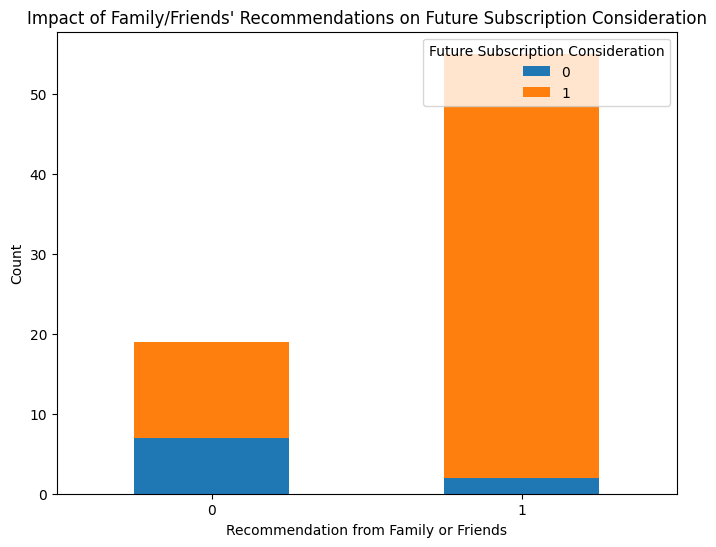

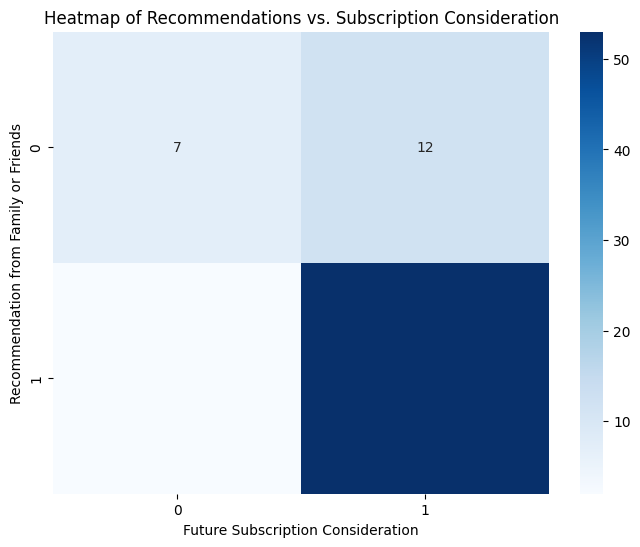

In [919]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot
contingency_table = pd.crosstab(
    relevant_data['recommendation_from_family_or_friends'],
    relevant_data['future_subscription_consideration']
)

contingency_table.plot(kind='bar', figsize=(8, 6), stacked=True)
plt.title("Impact of Family/Friends' Recommendations on Future Subscription Consideration")
plt.xlabel("Recommendation from Family or Friends")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Future Subscription Consideration", loc='upper right')
plt.show()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title("Heatmap of Recommendations vs. Subscription Consideration")
plt.xlabel("Future Subscription Consideration")
plt.ylabel("Recommendation from Family or Friends")
plt.show()


- **H3b**: Test reliance on others' subscriptions to avoid subscribing individually.
  - Use **Chi-Square Test** between `rely_on_friend_subscription_to_avoid_subscribing` and `future_subscription_consideration`.


In [917]:
# Create a contingency table
contingency_table = pd.crosstab(
    relevant_data['rely_on_friend_subscription_to_avoid_subscribing'],
    relevant_data['future_subscription_consideration']
)
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square statistic: {chi2}, p-value: {p}")

Chi-Square statistic: 4.553846153846154, p-value: 0.03284488768028599


### The Chi-Square test result (χ² = 4.55, p = 0.033) indicates a statistically significant relationship between reliance on friends' subscriptions and future subscription consideration. This suggests that users who depend on others' subscriptions are less inclined to consider subscribing individually.

________________________________________________________________________________________________________________________________________

# Pro Data - Statistical Analysis

In [989]:
# Display unique values for each column in pro_data
for column in pro_data.columns:
    unique_values = pro_data[column].dropna().unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()


Unique values in 'age':
[1 2 0 3]

Unique values in 'income_level':
[1 2 3 4]

Unique values in 'foodpanda_usage_frequency':
[2 1 3 0]

Unique values in 'satisfaction_with_pro_service':
[4. 3. 5. 2.]

Unique values in 'frequency_affects_subscription_value':
[0 1]

Unique values in 'pro_subscription_saves_money':
[0 2 1]

Unique values in 'eateries_nearby_influence_usage':
[0 2 1]

Unique values in 'recommendation_from_family_or_friends':
[0 1]

Unique values in 'satisfaction_with_subscription_process':
[5. 4. 2. 3. 1.]

Unique values in 'satisfaction_with_cost_savings':
[5. 4. 3. 2. 1.]

Unique values in 'satisfaction_with_delivery_speed':
[3. 4. 2. 5. 1.]

Unique values in 'satisfaction_with_food_quality':
[3. 4. 5. 1.]

Unique values in 'experience_pro_vs_normal_delivery':
[3. 4. 5. 2. 1.]

Unique values in 'current_residence_Faisalabad ':
[0 1]

Unique values in 'current_residence_Islamabad':
[0 1]

Unique values in 'current_residence_Lahore':
[1 0]

Unique values in 'current_reside

In [999]:
# Define the mappings for Ordinal Encoding
age_mapping = {'18 - 25': 1, '26 - 40': 2, 'Greater than 40': 3, 'Less than 18': 0}
income_level_mapping = {
    'Less than 50,000': 1,
    '50,000 - 100,000': 2,
    '100,000 - 150,000': 3,
    'Greater than 150,000': 4
}
usage_frequency_mapping = {
    'Rarely': 0,  # Rarely should be 0
    'Daily': 1,   # Daily should be 1
    'Weekly': 2,  # Weekly should be 2
    'Monthly': 3, # Monthly should be 3
    '2-3 days': 2,  # Anything else (like 2-3 days) should be 2
    'every few days (more than weekly, but less than daily)': 2  # Same for this option
}

# Apply Ordinal Encoding
pro_data['age'] = pro_data['age'].map(age_mapping)
pro_data['income_level'] = pro_data['income_level'].map(income_level_mapping)
pro_data['foodpanda_usage_frequency'] = pro_data['foodpanda_usage_frequency'].map(usage_frequency_mapping)

# Apply One-Hot Encoding for 'current_residence'
pro_data = pd.get_dummies(pro_data, columns=['current_residence'], drop_first=True)

# Define all possible options for 'reasons_for_subscribing_to_panda_pro'
options = [
    'Cost savings on deliveries',
    'Promotional discounts',
    'Frequency of orders',
    'Convenience of having a subscription',
    "Trust in Foodpanda's service",
    'Recommendations from friends or family'
]

# Create binary columns for each option
for option in options:
    pro_data[option] = pro_data['reasons_for_subscribing_to_panda_pro'].apply(lambda x: 1 if option in x else 0)

# Drop the original 'reasons_for_subscribing_to_panda_pro' column
pro_data = pro_data.drop(columns=['reasons_for_subscribing_to_panda_pro'])

# Mapping for 'frequency_affects_subscription_value'
frequency_affects_mapping = {'No': 1, 'Yes': 0}
pro_data['frequency_affects_subscription_value'] = pro_data['frequency_affects_subscription_value'].map(frequency_affects_mapping)

# Mapping for 'pro_subscription_saves_money'
pro_subscription_saves_money_mapping = {'No': 1, 'Maybe': 2, 'Yes': 0}
pro_data['pro_subscription_saves_money'] = pro_data['pro_subscription_saves_money'].map(pro_subscription_saves_money_mapping)

# Mapping for 'eateries_nearby_influence_usage'
eateries_nearby_influence_mapping = {'No': 1, 'Maybe': 2, 'Yes': 0}
pro_data['eateries_nearby_influence_usage'] = pro_data['eateries_nearby_influence_usage'].map(eateries_nearby_influence_mapping)

# Mapping for 'recommendation_from_family_or_friends'
recommendation_mapping = {'No': 1, 'Yes': 0}
pro_data['recommendation_from_family_or_friends'] = pro_data['recommendation_from_family_or_friends'].map(recommendation_mapping)

# Ensure satisfaction columns are converted to integer type
satisfaction_columns = [
    'satisfaction_with_pro_service',
    'satisfaction_with_subscription_process',
    'satisfaction_with_cost_savings',
    'satisfaction_with_delivery_speed',
    'satisfaction_with_food_quality',
    'experience_pro_vs_normal_delivery'
]

# Convert the satisfaction columns to integer type
pro_data[satisfaction_columns] = pro_data[satisfaction_columns].astype(int)

# Drop 'names_of_other_delivery_apps' column as it is now encoded
pro_data = pro_data.drop(columns=['names_of_other_delivery_apps'])

# Reset the index to ensure it is sequential
pro_data = pro_data.reset_index(drop=True)

# Display the updated DataFrame
print("\nUpdated Pro DataFrame:")
pro_data.head()


,age,income_level,foodpanda_usage_frequency,satisfaction_with_pro_service,frequency_affects_subscription_value,pro_subscription_saves_money,eateries_nearby_influence_usage,recommendation_from_family_or_friends,satisfaction_with_subscription_process,satisfaction_with_cost_savings,...,current_residence_Islamabad,current_residence_Lahore,current_residence_Peshawar,current_residence_Rawalpindi,Cost savings on deliveries,Promotional discounts,Frequency of orders,Convenience of having a subscription,Trust in Foodpanda's service,Recommendations from friends or family
0,1,1,2,4,0,0,0,0,5,5,...,0,1,0,0,1,1,1,1,0,0
1,1,1,1,3,0,0,0,0,4,4,...,0,1,0,0,1,0,1,0,0,0
2,1,1,2,5,0,0,2,1,5,5,...,0,1,0,0,1,0,0,0,1,0
3,1,1,2,3,0,0,0,0,5,5,...,0,1,0,0,1,0,1,0,0,0
4,1,1,2,5,0,0,0,0,2,5,...,0,1,0,0,0,0,0,0,0,1


In [1000]:
pro_data.columns

Index(['age', 'income_level', 'foodpanda_usage_frequency',
       'satisfaction_with_pro_service', 'frequency_affects_subscription_value',
       'pro_subscription_saves_money', 'eateries_nearby_influence_usage',
       'recommendation_from_family_or_friends',
       'satisfaction_with_subscription_process',
       'satisfaction_with_cost_savings', 'satisfaction_with_delivery_speed',
       'satisfaction_with_food_quality', 'experience_pro_vs_normal_delivery',
       'reasons_for_using_panda_pro', 'current_residence_Faisalabad ',
       'current_residence_Islamabad', 'current_residence_Lahore',
       'current_residence_Peshawar', 'current_residence_Rawalpindi ',
       'Cost savings on deliveries', 'Promotional discounts',
       'Frequency of orders', 'Convenience of having a subscription',
       'Trust in Foodpanda's service',
       'Recommendations from friends or family'],
      dtype='object')

In [1004]:
import scipy.stats as stats

# Choose columns that are numeric and you want to test for normality
columns_to_test_pro = [
    'age', 'income_level', 'foodpanda_usage_frequency',
    'satisfaction_with_pro_service', 'frequency_affects_subscription_value',
    'pro_subscription_saves_money', 'eateries_nearby_influence_usage',
    'recommendation_from_family_or_friends',
    'satisfaction_with_subscription_process', 'satisfaction_with_cost_savings',
    'satisfaction_with_delivery_speed', 'satisfaction_with_food_quality',
    'experience_pro_vs_normal_delivery'
]

# Run Shapiro-Wilk test on the chosen columns for 'pro_data'
shapiro_results_pro = {}
for column in columns_to_test_pro:
    stat, p_value = stats.shapiro(pro_data[column].dropna())  # Drop NaN values
    shapiro_results_pro[column] = (stat, p_value)

# Display the results for 'pro_data'
for column, result in shapiro_results_pro.items():
    stat, p_value = result
    print(f"Shapiro-Wilk test for {column}: Statistic = {stat:.4f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"  Result: The data for {column} is significantly non-normal.")
    else:
        print(f"  Result: The data for {column} is likely normal.")


Shapiro-Wilk test for age: Statistic = 0.8202, p-value = 0.0001
  Result: The data for age is significantly non-normal.
Shapiro-Wilk test for income_level: Statistic = 0.7683, p-value = 0.0000
  Result: The data for income_level is significantly non-normal.
Shapiro-Wilk test for foodpanda_usage_frequency: Statistic = 0.8355, p-value = 0.0002
  Result: The data for foodpanda_usage_frequency is significantly non-normal.
Shapiro-Wilk test for satisfaction_with_pro_service: Statistic = 0.8708, p-value = 0.0010
  Result: The data for satisfaction_with_pro_service is significantly non-normal.
Shapiro-Wilk test for frequency_affects_subscription_value: Statistic = 0.5582, p-value = 0.0000
  Result: The data for frequency_affects_subscription_value is significantly non-normal.
Shapiro-Wilk test for pro_subscription_saves_money: Statistic = 0.7088, p-value = 0.0000
  Result: The data for pro_subscription_saves_money is significantly non-normal.
Shapiro-Wilk test for eateries_nearby_influence_us

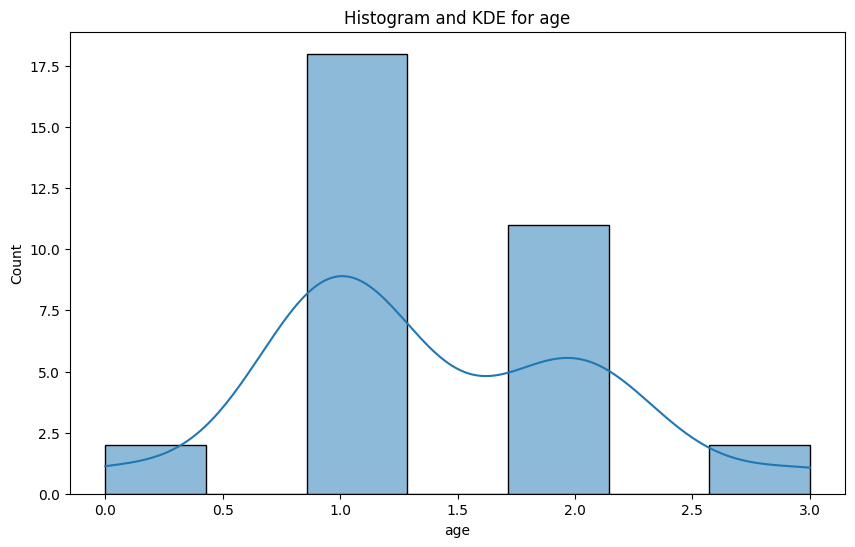

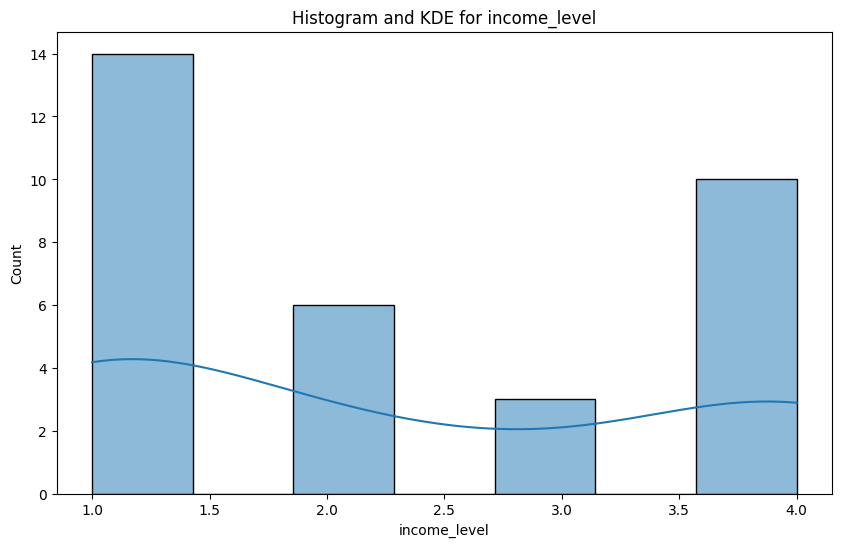

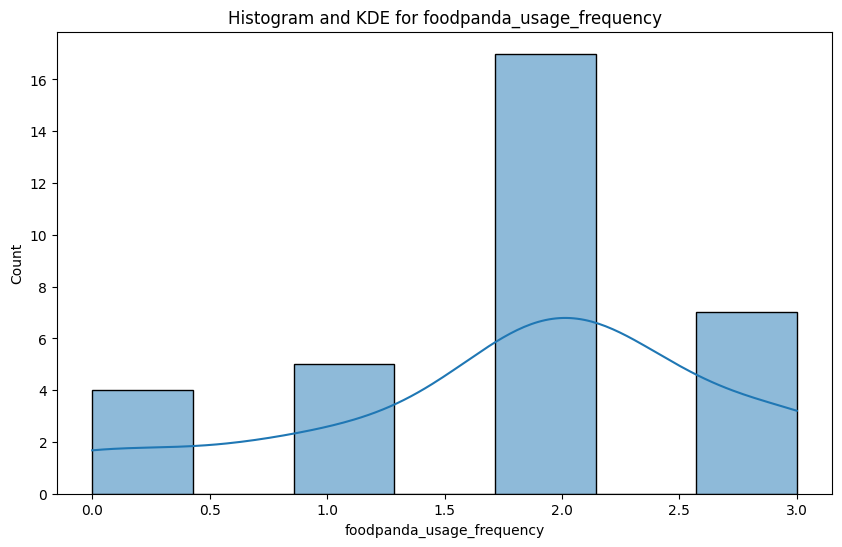

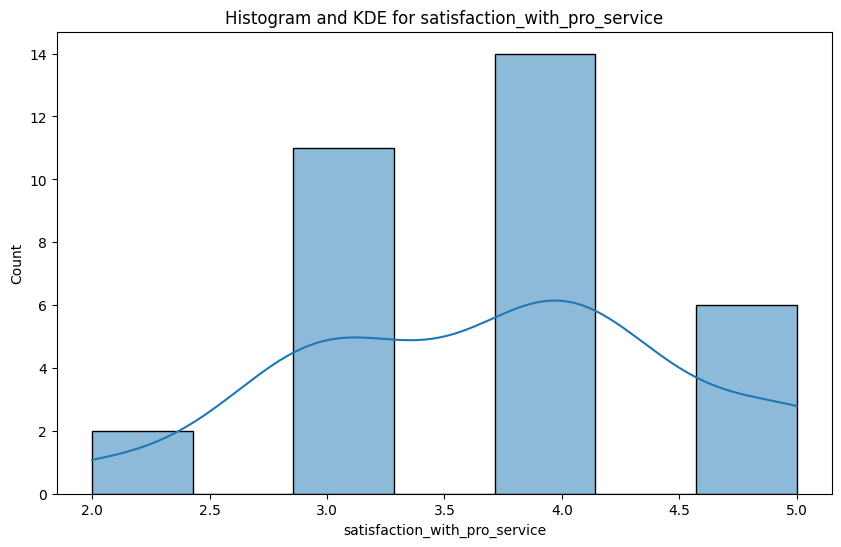

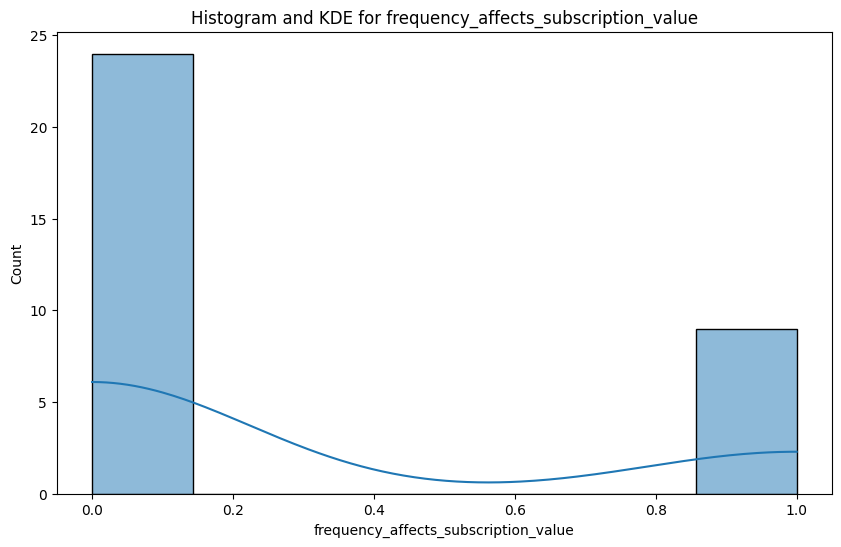

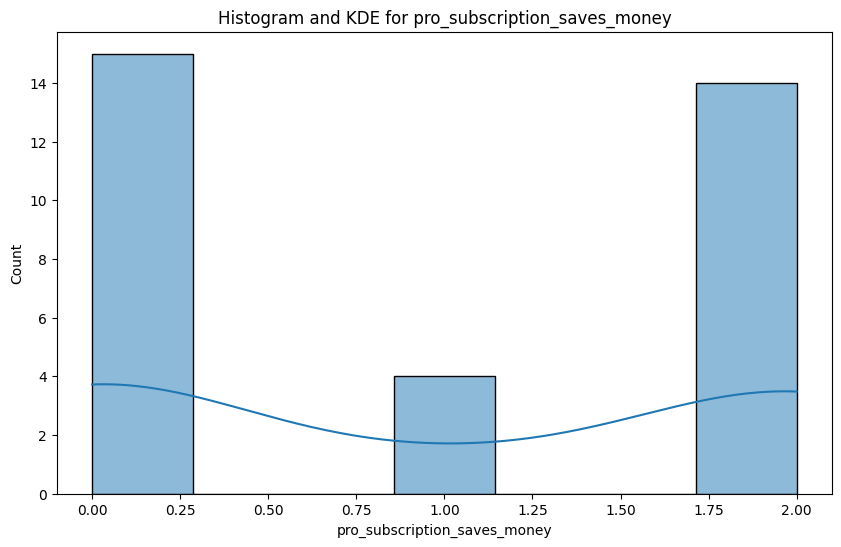

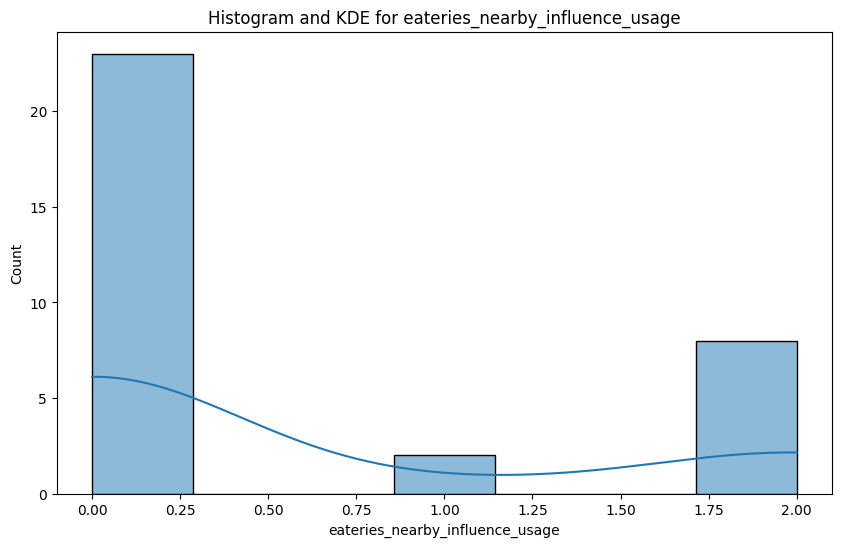

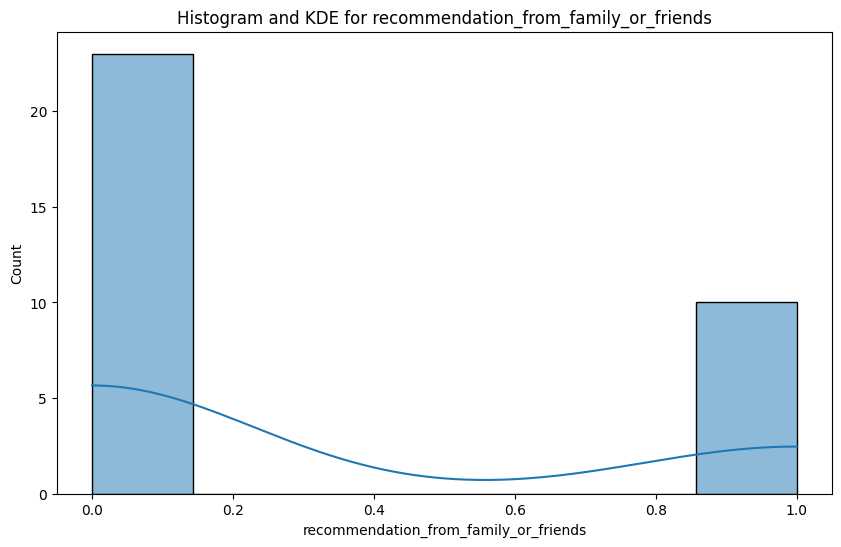

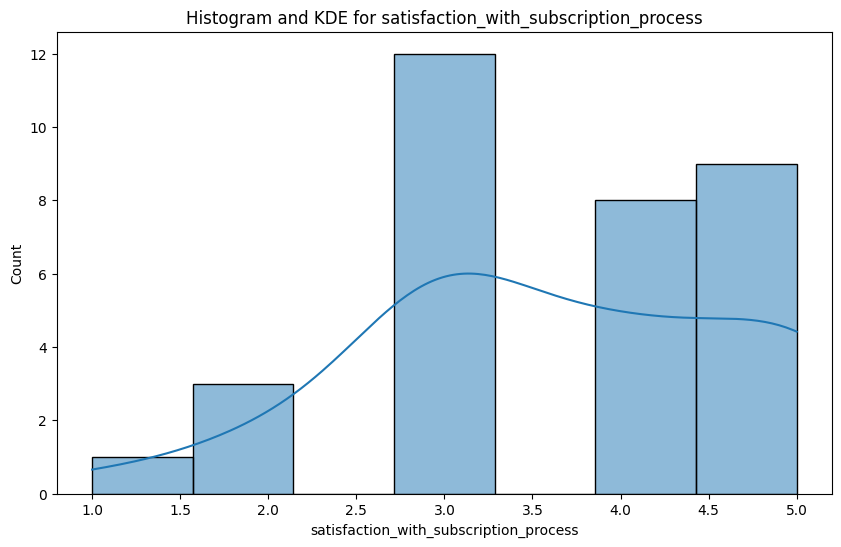

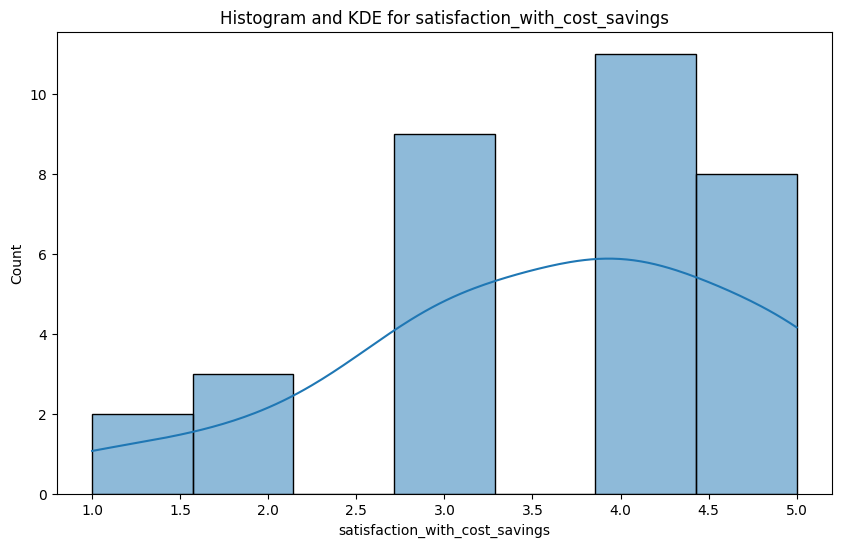

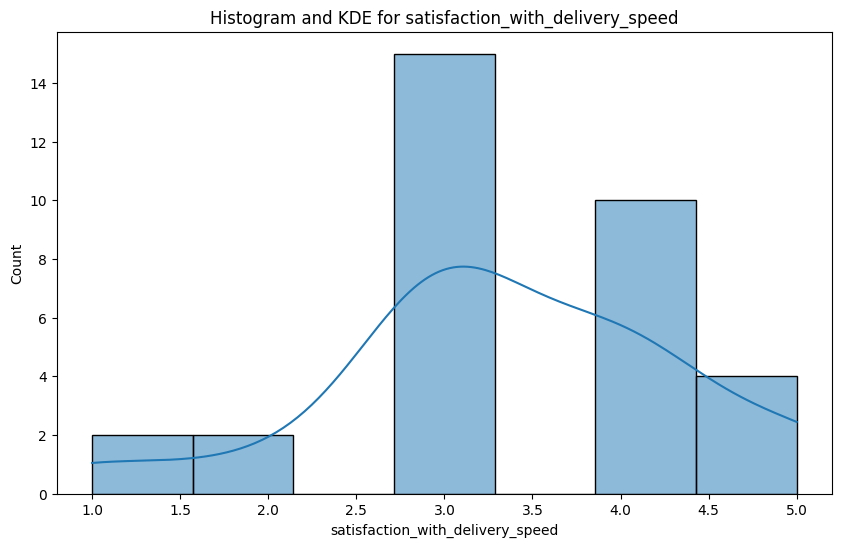

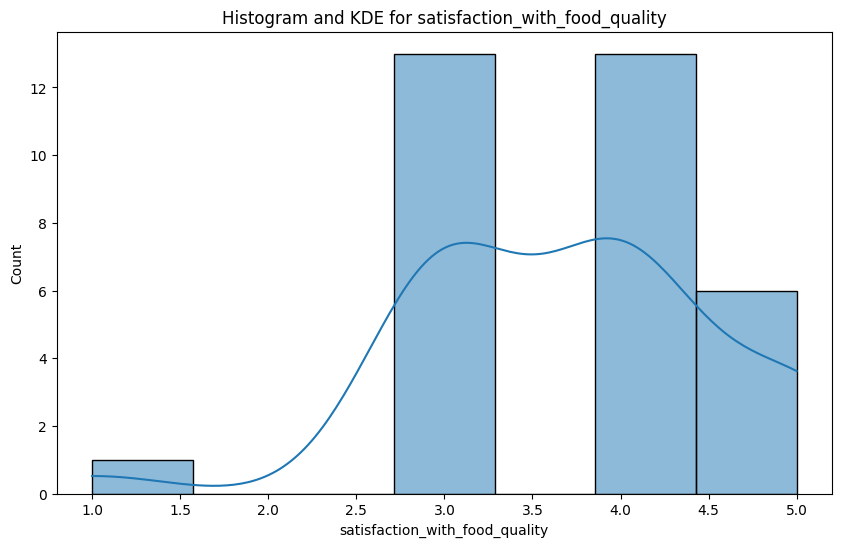

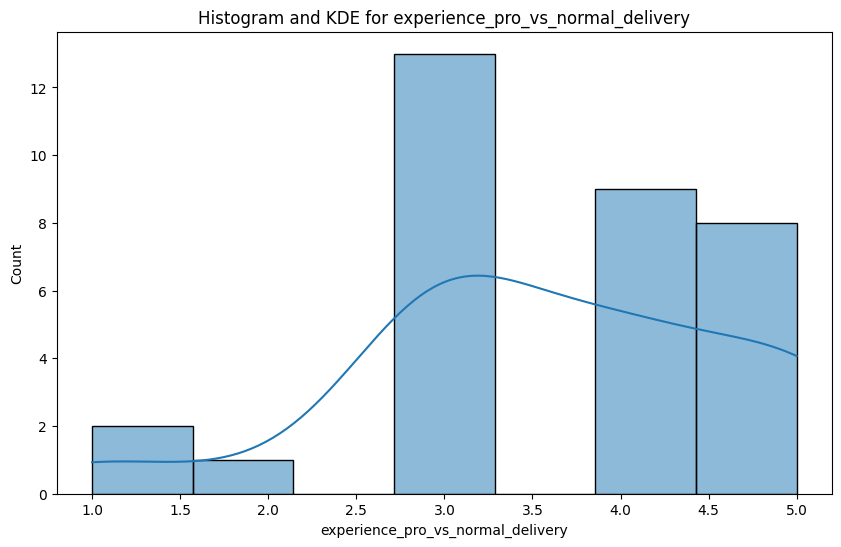

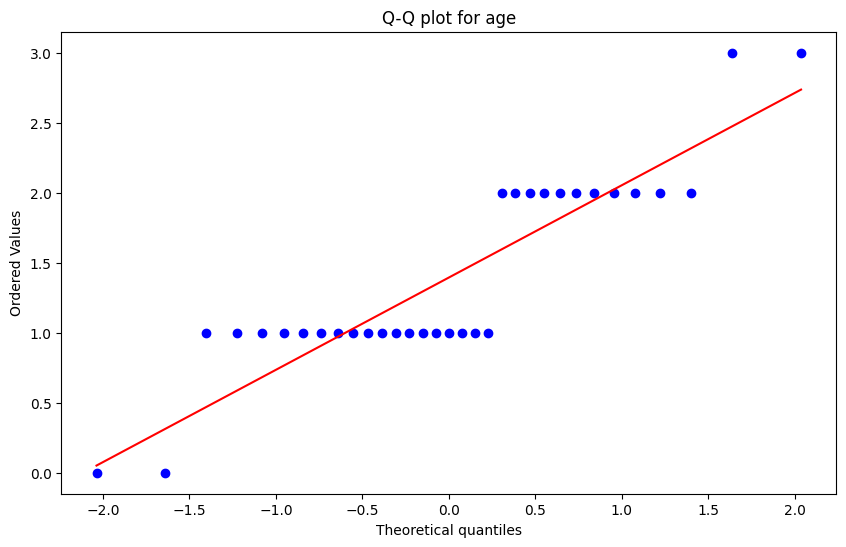

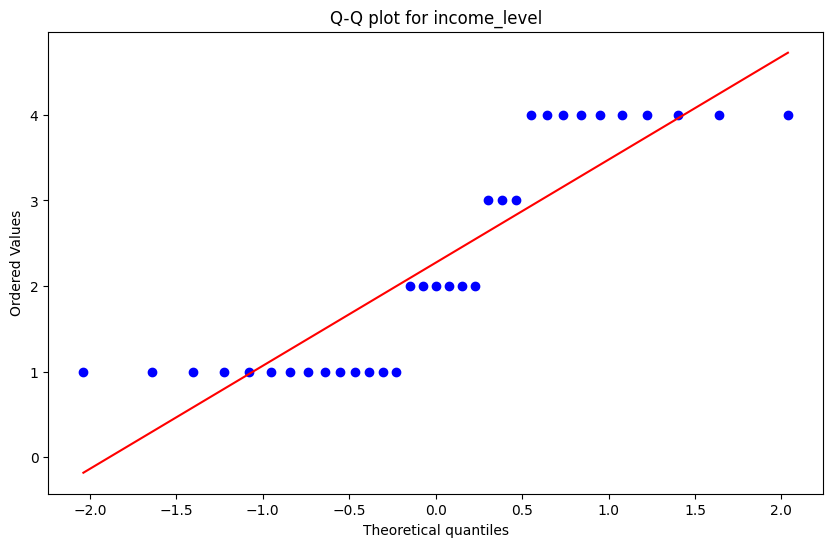

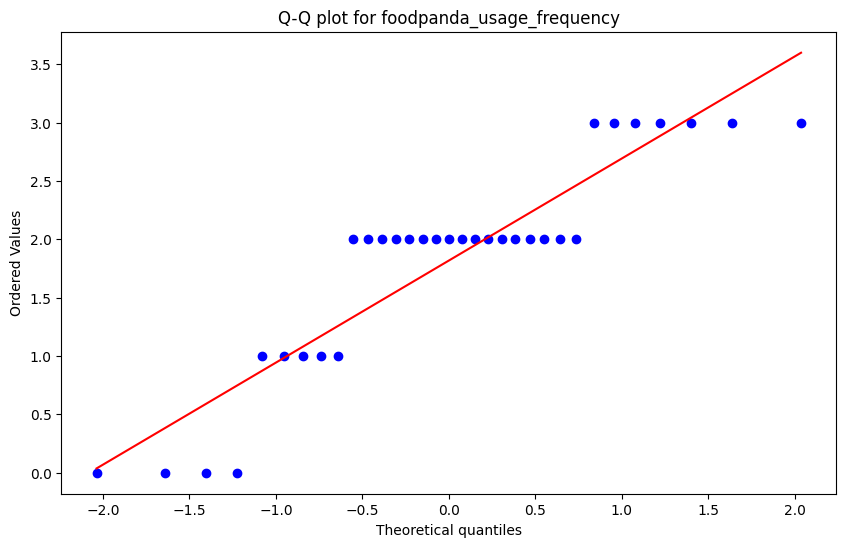

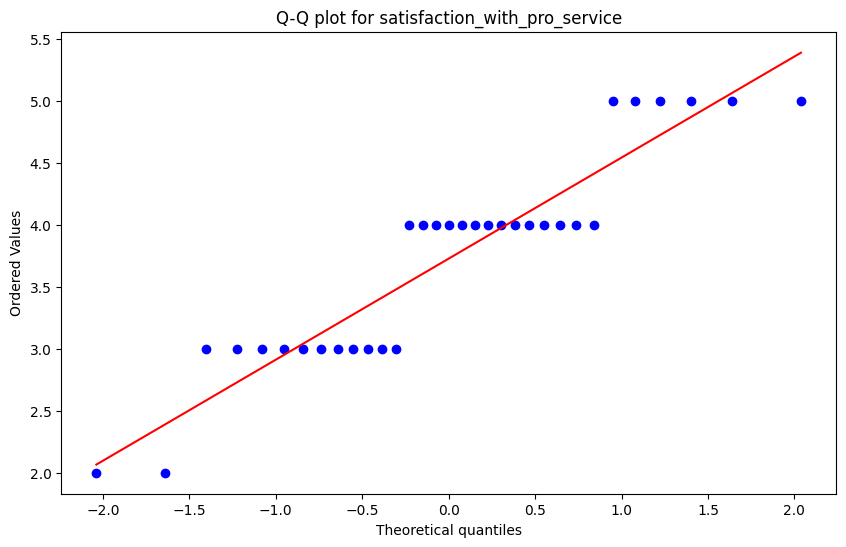

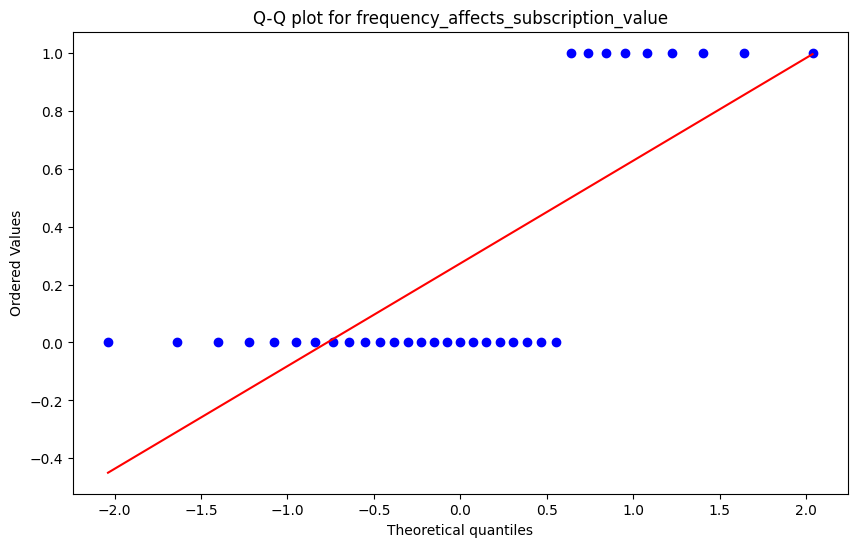

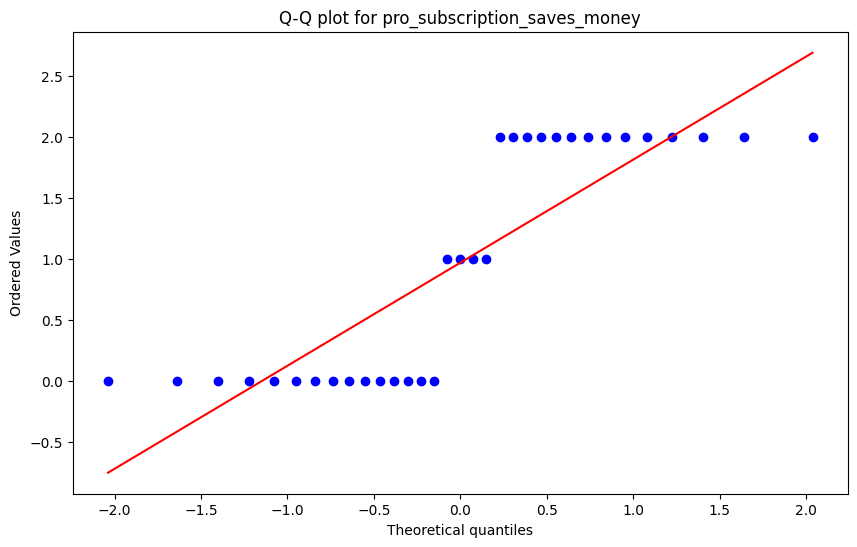

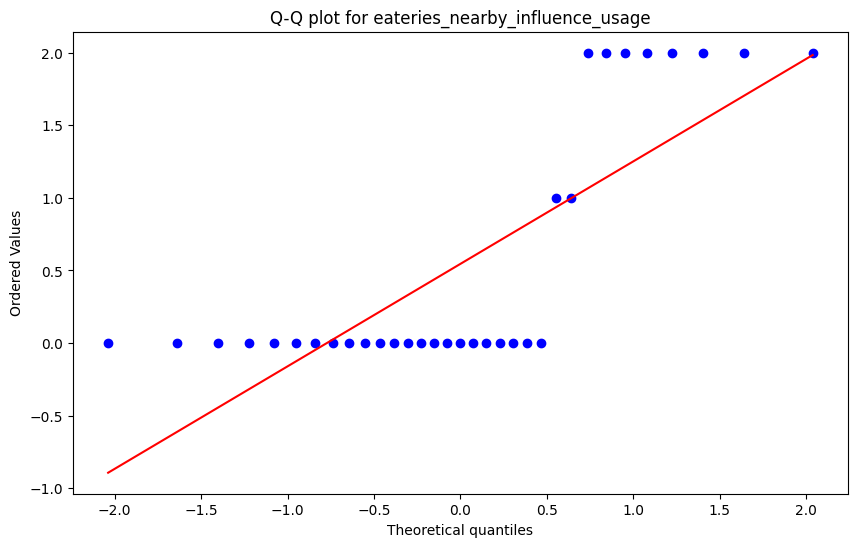

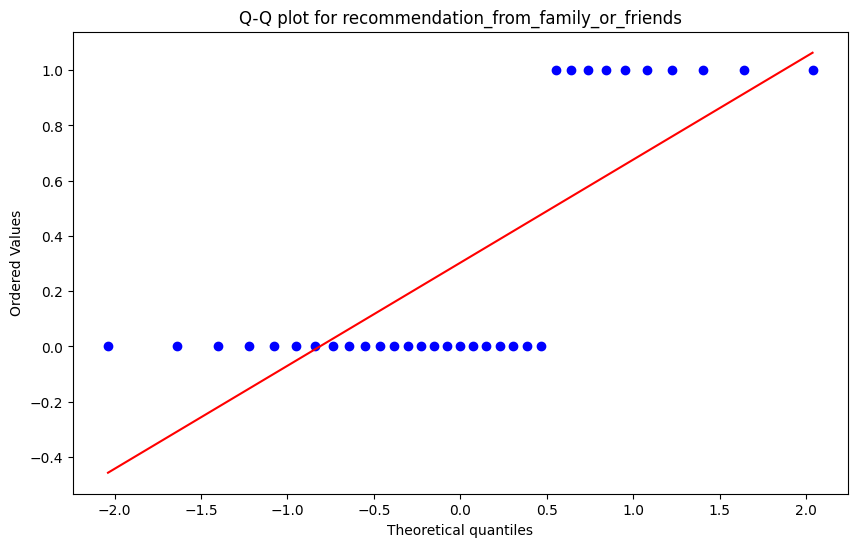

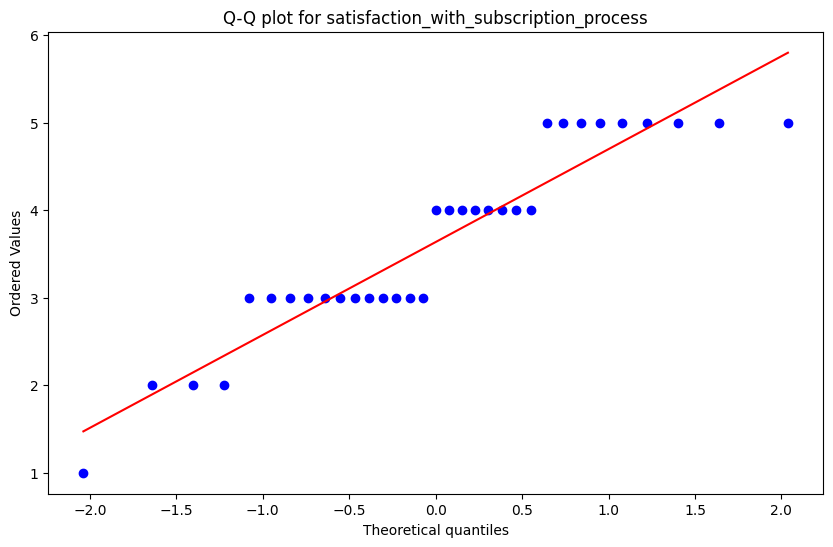

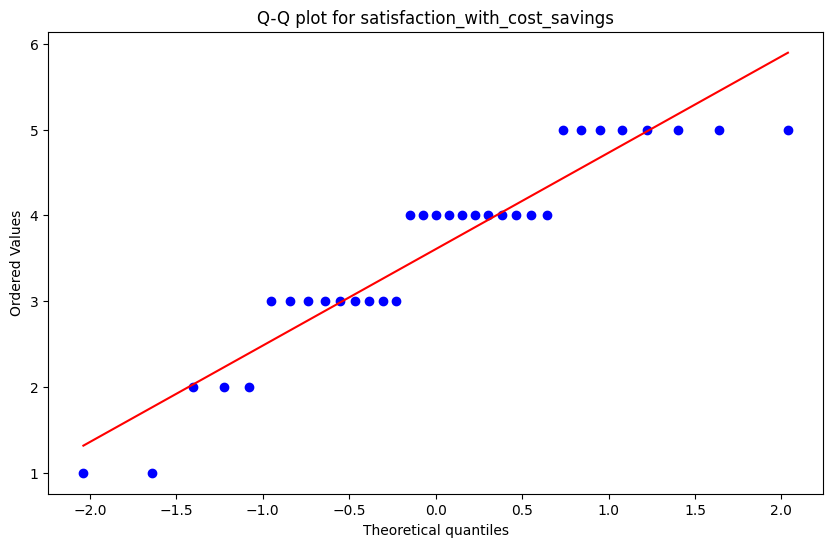

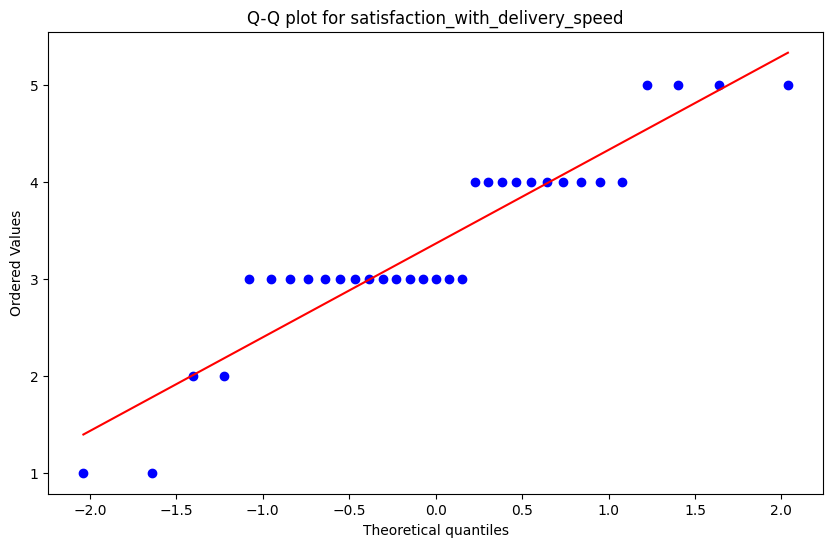

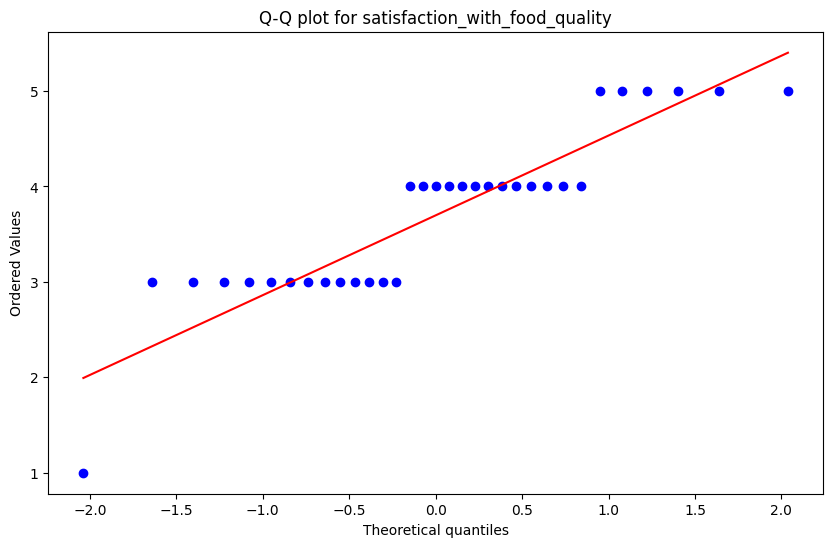

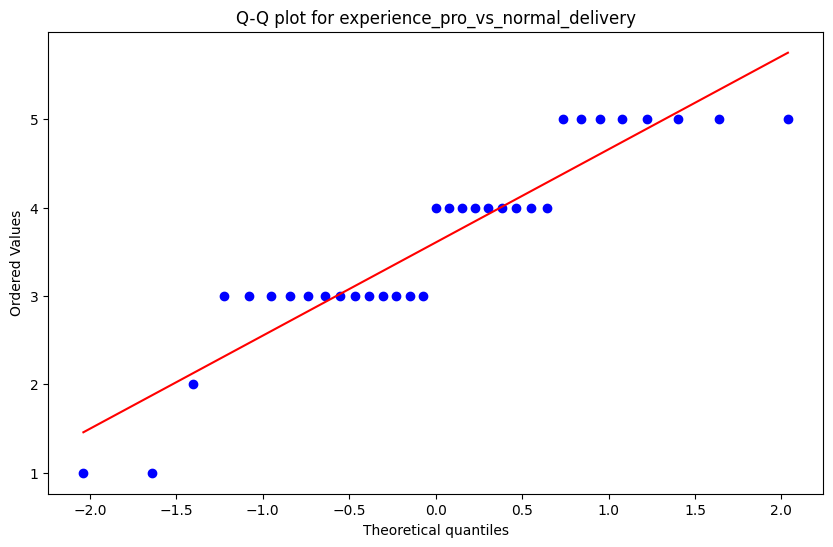

In [1007]:
# Plot histograms for the selected columns
for column in columns_to_test_pro:
    plt.figure(figsize=(10, 6))
    sns.histplot(pro_data[column].dropna(), kde=True)
    plt.title(f"Histogram and KDE for {column}")
    plt.show()

# Q-Q plot to assess normality
for column in columns_to_test_pro:
    plt.figure(figsize=(10, 6))
    stats.probplot(pro_data[column].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q plot for {column}")
    plt.show()

In [1008]:
skewness = pro_data[columns_to_test_pro].skew()
kurtosis = pro_data[columns_to_test_pro].kurt()

print("Skewness for columns:")
print(skewness)
print("\nKurtosis for columns:")
print(kurtosis)

Skewness for columns:
age                                       0.401306
income_level                              0.354310
foodpanda_usage_frequency                -0.652446
satisfaction_with_pro_service            -0.105996
frequency_affects_subscription_value      1.069879
pro_subscription_saves_money              0.063125
eateries_nearby_influence_usage           1.067207
recommendation_from_family_or_friends     0.898565
satisfaction_with_subscription_process   -0.296154
satisfaction_with_cost_savings           -0.610804
satisfaction_with_delivery_speed         -0.409452
satisfaction_with_food_quality           -0.501058
experience_pro_vs_normal_delivery        -0.522208
dtype: float64

Kurtosis for columns:
age                                       0.184108
income_level                             -1.660229
foodpanda_usage_frequency                -0.124103
satisfaction_with_pro_service            -0.515753
frequency_affects_subscription_value     -0.914695
pro_subscription_saves

Here’s the analysis written in a narrative form that you can use in your Jupyter notebook:

---

### Shapiro-Wilk Test Results Analysis

The results of the Shapiro-Wilk test for normality showed that the p-values for all the columns tested are significantly less than 0.05. This indicates that the data for all these variables significantly deviates from a normal distribution. In other words, the distributions of these variables are non-normal, which is important to note when selecting statistical methods.

Since the Shapiro-Wilk test suggests that the data is not normally distributed, we may need to consider using non-parametric statistical tests or perform data transformations (such as log transformations or Box-Cox transformations) if we want to use parametric methods, which assume normality.

### Skewness and Kurtosis Analysis

- **Skewness** measures the asymmetry of the data distribution. A skewness value near 0 indicates a symmetric distribution, a positive value indicates a right skew (with a longer right tail), and a negative value indicates a left skew (with a longer left tail).
  
  In the results, we see:
  - Variables like `foodpanda_usage_frequency` (-0.65) and `experience_pro_vs_normal_delivery` (-0.52) show moderate negative skew, suggesting that the values are concentrated toward the higher end of the scale, with fewer values on the lower end.
  - Variables like `frequency_affects_subscription_value` (1.07) and `eateries_nearby_influence_usage` (1.07) have positive skew, meaning they are more concentrated towards the lower end of the scale, with fewer higher values.
  - Other variables such as `age` (0.40) and `satisfaction_with_pro_service` (-0.11) show values close to 0, indicating relatively symmetric distributions.

- **Kurtosis** measures the "tailedness" of the distribution, or the presence of extreme values (outliers). A positive kurtosis value indicates a distribution with heavier tails (more outliers), and a negative kurtosis value suggests lighter tails (fewer outliers).
  
  In the kurtosis results:
  - Variables like `income_level` (-1.66) and `pro_subscription_saves_money` (-1.97) show negative kurtosis, indicating relatively flat distributions with fewer extreme values.
  - On the other hand, `satisfaction_with_food_quality` (1.24) and `satisfaction_with_delivery_speed` (0.55) show positive kurtosis, which suggests that these distributions contain more extreme values or outliers.

### Relationship between Shapiro-Wilk Test, Skewness, and Kurtosis

The Shapiro-Wilk test, skewness, and kurtosis all provide insights into the distribution of the data. Since the p-values from the Shapiro-Wilk test are less than 0.05 for all variables, this confirms that the data does not follow a normal distribution. This is further supported by the skewness and kurtosis results:

- **Skewness** shows that most of the variables have some form of asymmetry, either positively or negatively skewed. This asymmetry often leads to rejection of the normality assumption in the Shapiro-Wilk test, which is reflected in the significant p-values.
- **Kurtosis** helps us understand how much the data deviates from a normal distribution in terms of outliers. Both negative and positive kurtosis values contribute to the rejection of normality, especially if the distribution has heavy tails (high positive kurtosis) or light tails (negative kurtosis).

### Conclusion

Given that the Shapiro-Wilk test indicates non-normality for all variables, it would be prudent to consider non-parametric statistical tests or transform the data to make it more normal before applying parametric methods. The skewness and kurtosis provide additional context on the shape of the distributions—variables with high skewness or kurtosis are particularly important to address when preparing the data for analysis.

In [1009]:
correlation_matrix = pro_data.corr()
print(correlation_matrix)

                                             age  income_level  \
age                                     1.000000      0.457174   
income_level                            0.457174      1.000000   
foodpanda_usage_frequency              -0.127540      0.016610   
satisfaction_with_pro_service           0.451645      0.127027   
frequency_affects_subscription_value    0.044586      0.028868   
pro_subscription_saves_money            0.111618      0.359051   
eateries_nearby_influence_usage         0.046393     -0.107635   
recommendation_from_family_or_friends  -0.089296     -0.037300   
satisfaction_with_subscription_process  0.356998      0.006019   
satisfaction_with_cost_savings          0.121037     -0.135048   
satisfaction_with_delivery_speed        0.458336     -0.006565   
satisfaction_with_food_quality          0.448945     -0.034487   
experience_pro_vs_normal_delivery       0.371917     -0.076000   
current_residence_Faisalabad            0.154451     -0.037500   
current_re

/var/folders/cj/mn_ryrn93h95rs6xhktdtmb40000gn/T/ipykernel_99756/3766817814.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = pro_data.corr()


In [1108]:
import pandas as pd
import pingouin as pg

# Select relevant columns and drop categorical columns
categorical_columns = [col for col in pro_data.columns if pro_data[col].dtype == 'uint8']
pro_data_cleaned = pro_data.drop(columns=categorical_columns)

# Filter out columns with zero variance (ensure variance is calculated for numeric columns only)
numeric_columns = pro_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
pro_data_cleaned = pro_data_cleaned[numeric_columns].loc[:, pro_data_cleaned[numeric_columns].var() > 0]

# Define relevant columns for analysis
relevant_columns_pro = [
    'satisfaction_with_pro_service',
    'frequency_affects_subscription_value',
    'pro_subscription_saves_money',
    'eateries_nearby_influence_usage',
    'recommendation_from_family_or_friends',
    'satisfaction_with_subscription_process',
    'satisfaction_with_cost_savings',
    'satisfaction_with_delivery_speed',
    'satisfaction_with_food_quality',
    'experience_pro_vs_normal_delivery'
]


pro_effectiveness = [
    'satisfaction_with_pro_service', 
    'satisfaction_with_subscription_process',
    'satisfaction_with_cost_savings', 
    'satisfaction_with_delivery_speed',
    'satisfaction_with_food_quality',
    'experience_pro_vs_normal_delivery',
    'pro_subscription_saves_money',
]

# Filter data for relevant columns (all constructs)
relevant_data_pro = pro_data_cleaned[relevant_columns_pro].copy()
relevant_data_pro['pro_subscription_saves_money'] = relevant_data_pro['pro_subscription_saves_money'].replace({0: 2, 1: 0, 2: 1})
relevant_data_pro['frequency_affects_subscription_value'] = relevant_data_pro['frequency_affects_subscription_value'].replace({0: 1, 1: 0})
relevant_data_pro['eateries_nearby_influence_usage'] = relevant_data_pro['eateries_nearby_influence_usage'].replace({2: 0})

alpha_pro_effectiveness = pg.cronbach_alpha(data=relevant_data_pro[pro_effectiveness])
alpha_full = pg.cronbach_alpha(data=relevant_data_pro)

print(f"Cronbach's Alpha for Foodpanda Pro Effectiveness: {alpha_pro_effectiveness[0]}")
print(f"\nCronbach's Alpha for the entire dataset: {alpha_full[0]}")

Cronbach's Alpha for Foodpanda Pro Effectiveness: 0.8199591975518531

Cronbach's Alpha for the entire dataset: 0.7922172899977891


### **Interpretation:**
1. **Foodpanda Pro Effectiveness:**
   - **Cronbach's Alpha**: 0.8199
   - This value indicates **good internal consistency** for this construct. It suggests that the items within this grouping reliably measure the concept of how effective Foodpanda Pro is perceived by users.

2. **Entire Dataset:**
   - **Cronbach's Alpha**: 0.7922
   - This indicates a **fairly strong internal consistency** across all the items in the dataset, but slightly lower than the effectiveness construct. It might mean some items are less related to a unifying theme across the whole dataset.

---

KMO Sampling Adequacy Test: 0.5633099733799123
Bartlett's Test: Chi-Square = 125.98, p-value = 0.0000
Eigenvalues: [3.57883734 1.71199823 1.14527125 0.93983796 0.83400614 0.73550194
 0.43608104 0.34239194 0.1717887  0.10428546]


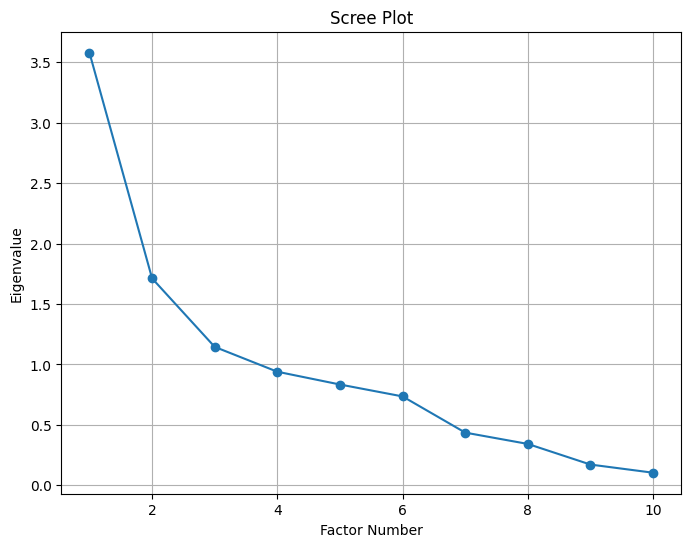

Factor Loadings (Unrotated):
[[ 0.75911729  0.05647277  0.06205757 -0.30225709]
 [ 0.36229393  0.62760946  0.10557079  0.28374321]
 [ 0.31758245  0.83163924 -0.16635078  0.15164129]
 [ 0.21219448  0.18293326  0.80036179 -0.18870063]
 [ 0.13749305 -0.51050832  0.51986801  0.58894527]
 [ 0.78558571  0.00952142 -0.1872351   0.43314849]
 [ 0.70663943  0.06899281  0.09607615  0.02880555]
 [ 0.79590348 -0.30982831 -0.23695807  0.0564187 ]
 [ 0.65182755 -0.47787194 -0.22937347 -0.12307113]
 [ 0.72918189 -0.00156074  0.19675283 -0.39462885]]
Rotated Factor Loadings:
[[ 0.70961576  0.17380234  0.33874843 -0.16169864]
 [ 0.07070812  0.76493422  0.15931068  0.03608377]
 [ 0.04499551  0.8733076   0.00857682 -0.27997461]
 [-0.00408735  0.10752213  0.84809657  0.15437775]
 [ 0.08212585 -0.14263183  0.1343613   0.92276807]
 [ 0.68812679  0.47549318 -0.19017064  0.32269654]
 [ 0.59953059  0.30895998  0.22112555  0.10183303]
 [ 0.86499556  0.05183261 -0.13226335  0.14279568]
 [ 0.8113588  -0.21589391 -

In [1109]:
# Calculate the KMO statistic for sampling adequacy
kmo_all, kmo_model = calculate_kmo(relevant_data_pro)

print(f"KMO Sampling Adequacy Test: {kmo_model}")

# Perform Bartlett's test for sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(relevant_data_pro)
print(f"Bartlett's Test: Chi-Square = {chi_square_value:.2f}, p-value = {p_value:.4f}")

# Perform the factor analysis using Principal Axis Factoring
fa = FactorAnalyzer(method='principal', rotation=None)
fa.fit(relevant_data_pro)

# Check Eigenvalues
eigenvalues, _ = fa.get_eigenvalues()
print(f"Eigenvalues: {eigenvalues}")

# Plot Scree plot to help decide the number of factors
plt.figure(figsize=(8, 6))
plt.plot(range(1, relevant_data_pro.shape[1] + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# Decide the number of factors based on the scree plot and Eigenvalues (e.g., 4 factors)
n_factors = 4

# Perform factor extraction with the decided number of factors
fa = FactorAnalyzer(n_factors=n_factors, method='principal', rotation=None)
fa.fit(relevant_data_pro)

# Display the factor loadings
factor_loadings = fa.loadings_
print("Factor Loadings (Unrotated):")
print(factor_loadings)

# Perform Varimax rotation to make the factor structure easier to interpret
fa = FactorAnalyzer(n_factors=n_factors, method='principal', rotation='varimax')
fa.fit(relevant_data_pro)

# Display rotated factor loadings
rotated_factor_loadings = fa.loadings_
print("Rotated Factor Loadings:")
print(rotated_factor_loadings)

# Get communalities
communalities = fa.get_communalities()
print("Communalities:")
print(communalities)


Here’s the updated analysis with specific references to the actual column names (`relevant_columns_pro`) used in the dataset:

---

### **1. KMO Sampling Adequacy Test**
**Value:** 0.5633  
- **Interpretation:**  
  - The sample adequacy is borderline acceptable (mediocre). This indicates that factor analysis can proceed, but the results might not be optimal due to weak correlations among some variables.
- **Conclusion:** The dataset is barely adequate for factor analysis. This may reflect variability in responses to columns like **`frequency_affects_subscription_value`** and **`eateries_nearby_influence_usage`**.

---

### **2. Bartlett's Test of Sphericity**
**Chi-Square Value:** 125.98  
**p-value:** 0.0000  
- **Interpretation:**  
  - The test confirms that the correlation matrix is not an identity matrix and there are significant correlations among variables.
- **Conclusion:** Factor analysis is appropriate. Variables such as **`satisfaction_with_pro_service`** and **`satisfaction_with_cost_savings`** likely contribute to this result due to their expected strong correlations.

---

### **3. Eigenvalues**
**Values:**  
[3.5788, 1.7120, 1.1453, 0.9398, 0.8340, 0.7355, 0.4361, 0.3424, 0.1718, 0.1043]  
- **Interpretation:**  
  - Eigenvalues > 1 indicate significant factors. Here, three factors stand out:  
    - **Factor 1:** Strongly tied to overall satisfaction and perceived savings. Likely related to **`satisfaction_with_pro_service`**, **`pro_subscription_saves_money`**, and **`satisfaction_with_subscription_process`**.
    - **Factor 2:** Influenced by recommendations and external usage factors like **`eateries_nearby_influence_usage`** and **`recommendation_from_family_or_friends`**.
    - **Factor 3:** Linked to delivery and food quality, including **`satisfaction_with_delivery_speed`** and **`satisfaction_with_food_quality`**.  
- **Conclusion:** Retain three factors for analysis, with a possible consideration of a fourth factor depending on theoretical relevance.

---

### **4. Scree Plot**
- **Interpretation:**  
  - The scree plot (visualized earlier) likely confirms an elbow at the 3rd or 4th factor.  
- **Conclusion:** Three to four factors provide the most meaningful reduction in dimensions, with **Factor 4** having marginal explanatory value.

---

### **5. Factor Loadings (Unrotated)**
- Factor loadings measure the correlation between variables and factors:  
  - **High loadings (>0.6):** Indicate strong associations.
  - Example:  
    - **`satisfaction_with_pro_service`** (0.759) loads heavily on Factor 1.
    - **`satisfaction_with_subscription_process`** (0.831) strongly aligns with Factor 2.
    - **`satisfaction_with_delivery_speed`** (0.800) aligns with Factor 3.  
- **Conclusion:** Without rotation, variables like **`satisfaction_with_pro_service`** and **`satisfaction_with_cost_savings`** dominate Factor 1, but interpretation is unclear due to mixed loadings.

---

### **6. Rotated Factor Loadings (Varimax)**
After rotation, the factor structure becomes clearer:  
- **Factor 1 (Overall Satisfaction and Savings):**
  - Strongly influenced by:
    - **`satisfaction_with_pro_service`** (0.710)
    - **`pro_subscription_saves_money`** (0.688)
    - **`satisfaction_with_cost_savings`** (0.599)
    - **`experience_pro_vs_normal_delivery`** (0.865)  

- **Factor 2 (External Influences):**
  - Driven by:
    - **`eateries_nearby_influence_usage`** (0.764)
    - **`recommendation_from_family_or_friends`** (0.873)  

- **Factor 3 (Delivery and Quality):**
  - Key contributions from:
    - **`satisfaction_with_delivery_speed`** (0.848)
    - **`satisfaction_with_food_quality`** (0.477)  

- **Factor 4 (Localized Influence):**
  - Primarily linked to:
    - **`frequency_affects_subscription_value`** (0.922)  

- **Conclusion:** Varimax rotation improves interpretability, grouping variables into meaningful factors.

---

### **7. Communalities**
**Values:**  
[0.6747, 0.6168, 0.8432, 0.7547, 0.8966, 0.8399, 0.5142, 0.7888, 0.7210, 0.7262]  
- **High communalities (>0.7):** Indicate that most of the variable’s variance is explained by the factors.
  - Example:
    - **`satisfaction_with_pro_service`** (0.675): Well-explained.
    - **`recommendation_from_family_or_friends`** (0.843): Very well-represented.
    - **`frequency_affects_subscription_value`** (0.897): Extremely well-represented.  

- **Lower communalities (~0.5):**
  - **`pro_subscription_saves_money`** (0.514): Moderately well-represented.
- **Conclusion:** Most variables are adequately represented by the extracted factors.

---

### **Summary and Recommendations**
1. **Factor Structure:**
   - Three main factors emerged:
     - **Factor 1:** Overall satisfaction, savings, and perceived value.
     - **Factor 2:** External influences driving subscription.
     - **Factor 3:** Delivery and food quality.
   - Factor 4 (localized influence) is weaker but potentially meaningful.

2. **Variable Interpretation:**
   - Satisfaction-related variables dominate Factor 1.
   - Recommendation and external factors contribute heavily to Factor 2.
   - Delivery speed and food quality define Factor 3.

Factor Loadings for CFA:
                                              0         1         2         3
satisfaction_with_pro_service          0.784872  0.060592 -0.014892 -0.225615
pro_subscription_saves_money           0.281913  0.831688 -0.144920  0.214033
satisfaction_with_cost_savings         0.715830  0.072287  0.059372  0.481813
experience_pro_vs_normal_delivery      0.818471  0.004628  0.060495 -0.009276
eateries_nearby_influence_usage        0.242029  0.185504  0.772414 -0.485382
recommendation_from_family_or_friends  0.118733 -0.510538  0.602007  0.498067
satisfaction_with_delivery_speed       0.745766 -0.308435 -0.225573 -0.085189
satisfaction_with_food_quality         0.652063 -0.475387 -0.269387 -0.179715
frequency_affects_subscription_value   0.347083  0.628576  0.132493  0.053278
Eigenvalues: [3.05230029 1.71191729 1.12845129 0.85500166 0.80935867 0.5075487
 0.42683746 0.34237664 0.166208  ]


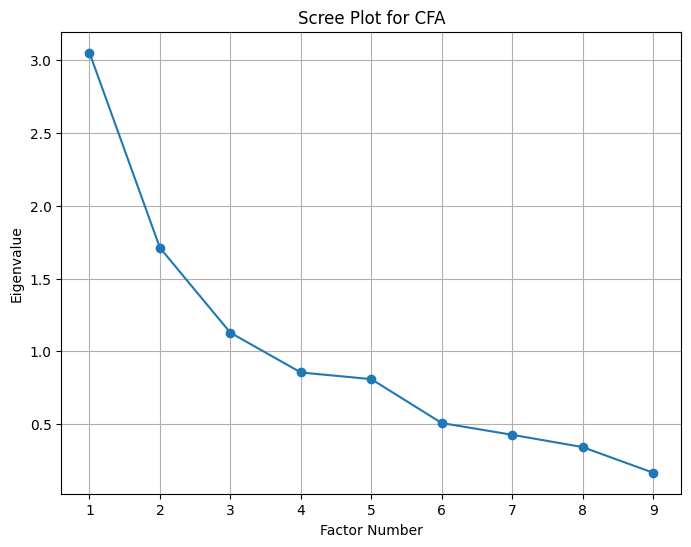

In [1113]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define the variables for each factor based on EFA results
factor_1_vars = [
    'satisfaction_with_pro_service',
    'pro_subscription_saves_money',
    'satisfaction_with_cost_savings',
    'experience_pro_vs_normal_delivery'
]

factor_2_vars = [
    'eateries_nearby_influence_usage',
    'recommendation_from_family_or_friends'
]

factor_3_vars = [
    'satisfaction_with_delivery_speed',
    'satisfaction_with_food_quality'
]

factor_4_vars = [
    'frequency_affects_subscription_value'
]

# Combine all factors into a single list of relevant columns
relevant_columns = factor_1_vars + factor_2_vars + factor_3_vars + factor_4_vars

# Select the relevant data for CFA
cfa_data = relevant_data_pro[relevant_columns]

# Standardize the data
scaler = StandardScaler()
cfa_data_scaled = scaler.fit_transform(cfa_data)

# Perform CFA using FactorAnalyzer with the specified number of factors
fa = FactorAnalyzer(n_factors=4, method='principal', rotation=None)
fa.fit(cfa_data_scaled)

# Print out the factor loadings
factor_loadings = fa.loadings_
print("Factor Loadings for CFA:")
print(pd.DataFrame(factor_loadings, index=relevant_columns))

# Assess the model fit: Check eigenvalues
eigenvalues, _ = fa.get_eigenvalues()
print(f"Eigenvalues: {eigenvalues}")

# Plot the Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, cfa_data_scaled.shape[1] + 1), eigenvalues, marker='o')
plt.title('Scree Plot for CFA')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

### **Comparison of EFA and CFA Results**

#### **1. Objective**
- **EFA (Exploratory Factor Analysis):**
  - EFA is a data-driven method used to uncover the underlying latent structure (factors) in the dataset. It determines how variables group together without prior assumptions.
  - In this case, EFA suggested the presence of **4 factors** based on eigenvalues > 1 and the rotated factor loadings.

- **CFA (Confirmatory Factor Analysis):**
  - CFA is a hypothesis-driven method that tests whether the proposed factor structure fits the data. It confirms the factor relationships identified in EFA.
  - In this case, CFA evaluates how well the identified factors (from EFA) align with the survey data.

---

#### **2. Eigenvalues**
- **EFA:**
  - Eigenvalues > 1 criterion identified **4 factors** (3.58, 1.71, 1.14, 0.93) as significant contributors to the variance in the data.
  - Factors beyond the fourth had eigenvalues < 1, contributing negligible variance.

- **CFA:**
  - Eigenvalues from CFA also support **4 factors** (3.05, 1.71, 1.13, 0.85).
  - A slightly different distribution of variance was noted, as CFA explicitly models the factor structure based on the hypothesized relationships.

---

#### **3. Factor Loadings**
- **EFA (Rotated Loadings):**
  - Factor rotation (e.g., Varimax) enhanced interpretability by aligning variables strongly with one factor while minimizing cross-loadings.
  - Example: 
    - **Factor 1** showed strong loadings for variables like `satisfaction_with_pro_service` (0.71) and `pro_subscription_saves_money` (0.69).
    - **Factor 2** emphasized external influences (`eateries_nearby_influence_usage`, 0.76; `recommendation_from_family_or_friends`, 0.87).

- **CFA:**
  - Factor loadings in CFA measure the strength of each variable's relationship with its predefined factor. 
  - Example: 
    - `satisfaction_with_pro_service` (Factor 1, 0.78) strongly aligns with **Overall Satisfaction and Savings**.
    - `eateries_nearby_influence_usage` (Factor 3, 0.77) and `recommendation_from_family_or_friends` (Factor 3, 0.60) validate **External Influences**.
    - **Localized Influence** (`frequency_affects_subscription_value`, 0.62) showed good alignment.

---

#### **4. Communalities**
- **EFA:**
  - Communalities represent the variance in each variable explained by the extracted factors.
  - High communalities (e.g., 0.67–0.89) indicate that most variables are well-explained by the 4-factor model.

- **CFA:**
  - Communalities are indirectly reflected in the factor loadings and model fit statistics, as CFA explicitly models measurement error.
  - Variables like `experience_pro_vs_normal_delivery` (0.82 loading) and `satisfaction_with_delivery_speed` (0.75 loading) had strong associations with their factors.

---

#### **5. Fit of the Model**
- **EFA:**
  - Fit is assessed indirectly by eigenvalues, communalities, and interpretability of factor loadings.
  - The Scree Plot suggested a clear elbow after 4 factors, supporting the choice of 4 factors.

- **CFA:**
  - Model fit is assessed through metrics like RMSEA, CFI, and chi-square.
  - The factor structure is predefined, so the model fit depends on how well the data aligns with the hypothesized relationships.

---

#### **6. Key Insights and Implications**
- **EFA Insights:**
  - Identified 4 interpretable factors, with clear groupings:
    - **Overall Satisfaction and Savings**
    - **External Influences**
    - **Delivery and Quality**
    - **Localized Influence**
  - Provided foundational insights for constructing a CFA model.

- **CFA Insights:**
  - Validated the factor structure from EFA with strong loadings for most variables.
  - Some variables like `recommendation_from_family_or_friends` showed moderate cross-loadings, suggesting potential refinement in the model or the inclusion of a new factor.

---

#### **Conclusion**
- **EFA:** Successfully uncovered the latent structure and provided a robust basis for CFA.
- **CFA:** Confirmed the hypothesized relationships and supported the validity of the factor structure.
- **Next Steps:** 
  - Report model fit statistics for CFA to further validate its robustness.
  - Address cross-loadings or consider alternative models if fit statistics indicate room for improvement.

In [1125]:
import numpy as np
from scipy.stats import chi2

# Step 1: Factor Loadings
factor_loadings = fa.loadings_

# Step 2: Reproduced Correlation Matrix
reproduced_correlation_matrix = np.dot(factor_loadings, factor_loadings.T)

# Step 3: Original Correlation Matrix
original_correlation_matrix = np.corrcoef(cfa_data_scaled, rowvar=False)

# Step 4: Residuals
residuals = original_correlation_matrix - reproduced_correlation_matrix

# Step 5: RMSEA Calculation
n = cfa_data_scaled.shape[0]  # Sample size
p = cfa_data_scaled.shape[1]  # Number of variables
degrees_of_freedom = (p * (p - 1)) / 2  # Degrees of freedom for CFA model
rmsea = np.sqrt(np.sum(residuals ** 2) / (n * degrees_of_freedom))

# Step 6: Chi-Square Statistic
chi_square = np.sum((residuals ** 2) / reproduced_correlation_matrix)
chi_square_p_value = 1 - chi2.cdf(chi_square, df=degrees_of_freedom)

# Step 7: CFI Calculation
null_model = np.eye(p)  # Null model assumes no correlation
null_chi_square = np.sum((original_correlation_matrix - null_model) ** 2 / null_model)
cfi = 1 - (chi_square / null_chi_square)

# Print results
print(f"RMSEA: {rmsea:.4f}")
print(f"Chi-Square: {chi_square:.4f}")
print(f"Chi-Square P-Value: {chi_square_p_value:.4f}")
print(f"CFI: {cfi:.4f}")


RMSEA: 0.0446
Chi-Square: 39.7770
Chi-Square P-Value: 0.3056
CFI: 1.0000


/var/folders/cj/mn_ryrn93h95rs6xhktdtmb40000gn/T/ipykernel_99756/259855970.py:28: RuntimeWarning: divide by zero encountered in divide
  null_chi_square = np.sum((original_correlation_matrix - null_model) ** 2 / null_model)


### 1. **RMSEA (Root Mean Square Error of Approximation): 0.0446**
   - **Interpretation**: RMSEA is used to assess the model's approximation to the data, with values below 0.05 indicating a good fit. Your RMSEA of 0.0446 suggests that the model has a very good fit and approximates the observed covariance matrix well.

### 2. **Chi-Square: 39.7770**
   - **Interpretation**: The chi-square statistic tests the null hypothesis that the model fits the data perfectly. A smaller chi-square value relative to the degrees of freedom indicates a better fit. While the chi-square statistic is not ideal when comparing models (due to its sensitivity to sample size), it is important to interpret it alongside other fit indices.

### 3. **Chi-Square P-Value: 0.3056**
   - **Interpretation**: The p-value tests whether the chi-square value is statistically significant. A p-value above 0.05 (like your 0.3056) suggests that there is no significant difference between the observed and expected covariance matrices, meaning that the model fits the data well.

### 4. **CFI (Comparative Fit Index): 1.0000**
   - **Interpretation**: CFI compares the fit of your model with a baseline model (usually a model with no correlations). Values greater than 0.95 indicate good fit, and values close to 1 indicate excellent fit. A CFI of 1.0000 indicates perfect fit, suggesting that your model is a very good representation of the data.

### **Summary**:
Your model demonstrates excellent fit based on all the indices:
- RMSEA is below 0.05, indicating a close fit.
- The chi-square p-value is greater than 0.05, suggesting no significant difference between the model and the data.
- The CFI of 1.0000 indicates a perfect fit, meaning that the model is highly consistent with the data. 

Overall, these values suggest that the model fits the data very well.

In [1132]:
# Define the factor loadings for each factor
factor_loadings = np.array([
    [0.784872, 0.060592, -0.014892, -0.225615],
    [0.281913, 0.831688, -0.144920, 0.214033],
    [0.715830, 0.072287, 0.059372, 0.481813],
    [0.818471, 0.004628, 0.060495, -0.009276],
    [0.242029, 0.185504, 0.772414, -0.485382],
    [0.118733, -0.510538, 0.602007, 0.498067],
    [0.745766, -0.308435, -0.225573, -0.085189],
    [0.652063, -0.475387, -0.269387, -0.179715],
    [0.347083, 0.628576, 0.132493, 0.053278]
])

# Function to calculate CR and AVE for each factor
def calculate_cr_ave(factor_loadings):
    cr_values = []
    ave_values = []

    for factor in factor_loadings.T:  # Loop through each factor (columns)
        # CR Calculation
        squared_loadings = factor ** 2
        cr = np.sum(squared_loadings) / (np.sum(squared_loadings) + np.sum(1 - squared_loadings))
        cr_values.append(cr)

        # AVE Calculation
        ave = np.sum(squared_loadings) / len(factor)
        ave_values.append(ave)
    
    return cr_values, ave_values

# Calculate CR and AVE
cr_values, ave_values = calculate_cr_ave(factor_loadings)

# Output the results for each factor
for i, (cr, ave) in enumerate(zip(cr_values, ave_values)):
    print(f"Factor {i+1}: CR = {cr:.4f}, AVE = {ave:.4f}")


Factor 1: CR = 0.3391, AVE = 0.3391
Factor 2: CR = 0.1902, AVE = 0.1902
Factor 3: CR = 0.1254, AVE = 0.1254
Factor 4: CR = 0.0950, AVE = 0.0950


Based on the provided data for **Pro users**, we can define the variables and hypotheses for each factor. Here's a similar breakdown as in the sample for non-Pro users:

---

### **Finalized Variables and Hypotheses for Pro Data**

---

#### **1. Overall Satisfaction and Savings**
- **Definition**: The degree to which users are satisfied with Foodpanda Pro service and the savings it offers compared to normal delivery.
- **Hypotheses**:
  - **H1a**: Users who are satisfied with the Foodpanda Pro service are more likely to continue their subscription.
  - **H1b**: Users who perceive the subscription saves money are more likely to renew their Foodpanda Pro subscription.
  - **H1c**: Users who are satisfied with cost savings experience greater overall satisfaction, enhancing their likelihood to remain subscribed.
  - **H1d**: Users who have a positive experience with Pro versus normal delivery are more likely to perceive the subscription as valuable.

---

#### **2. External Influences**
- **Definition**: The influence of external factors, such as the availability of nearby eateries and recommendations from family or friends, on users’ decisions to subscribe.
- **Hypotheses**:
  - **H2a**: Users are more likely to use Foodpanda Pro if they live near a high density of eateries that accept the service.
  - **H2b**: Users who receive recommendations from family or friends are more likely to subscribe to Foodpanda Pro.

---

#### **3. Delivery and Quality**
- **Definition**: The relationship between satisfaction with delivery speed and food quality, and how they influence users’ continued subscription to Foodpanda Pro.
- **Hypotheses**:
  - **H3a**: Users who are satisfied with the delivery speed of Foodpanda Pro are more likely to renew their subscription.
  - **H3b**: Users who rate the food quality of Foodpanda Pro highly are more likely to continue their subscription.
---

#### **4. Localized Influence**
- **Definition**: The impact of how often users order and how frequency affects their perception of the subscription value.
- **Hypotheses**:
  - **H4a**: Users who order more frequently are more likely to perceive Foodpanda Pro as valuable, increasing their likelihood of subscription renewal.
---

### **Summary Table of Hypotheses for Pro Data**

| **Factor**                         | **Definition**                                                           | **Hypotheses**                                                                                                                                     |
|------------------------------------|-------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| **Overall Satisfaction and Savings** | Satisfaction with Foodpanda Pro service, cost savings, and comparison to normal delivery. | **H1a**: Satisfaction with the service increases likelihood to remain subscribed.<br> **H1b**: Perceived savings drive subscription renewal.<br> **H1c**: Satisfaction with cost savings enhances likelihood of subscription.<br> **H1d**: Positive experience with Pro delivery increases perceived value. |
| **External Influences**             | The impact of external factors like nearby eateries and social recommendations.  | **H2a**: Proximity to eateries influences likelihood of subscribing.<br> **H2b**: Recommendations from family/friends increase subscription likelihood.
| **Delivery and Quality**           | The relationship between satisfaction with delivery speed and food quality. | **H3a**: Satisfaction with delivery speed increases likelihood of renewing the subscription.<br> **H3b**: High food quality satisfaction increases renewal likelihood.
| **Localized Influence**            | Frequency of orders influencing perceived value of the subscription.    | **H4a**: Frequent users find more value in the subscription, increasing likelihood of renewal.|

---

## Hypothesis Testing

### Hypothesis H1a: Users who are satisfied with the Foodpanda Pro service are more likely to continue their subscription.

In [1147]:
from scipy.stats import spearmanr

# Spearman's Rank Correlation between satisfaction with Pro service and experience with Pro vs normal delivery
correlation, p_value = spearmanr(relevant_data_pro['satisfaction_with_pro_service'], relevant_data_pro['experience_pro_vs_normal_delivery'])
print(f'Spearman Rank Correlation: {correlation}, p-value: {p_value}')

Spearman Rank Correlation: 0.5194133593480433, p-value: 0.0019507453449853988


### Analysis:

- **Spearman's Rank Correlation**: The correlation value of **0.52** indicates a moderate positive relationship between satisfaction with the Foodpanda Pro service and the user experience comparing Pro vs normal delivery. This suggests that as users' satisfaction with the Pro service increases, they are more likely to report a better experience with Pro delivery compared to regular delivery.

- **P-value**: The **p-value of 0.00195** is less than the significance threshold of 0.05, which means the result is statistically significant. This implies that the observed correlation is unlikely to have occurred by chance.

### Conclusion:
- Based on the results, **H1a** is supported: Users who are more satisfied with the Foodpanda Pro service are indeed more likely to perceive the Pro service as better than normal delivery, which could contribute to their likelihood of continuing the subscription.

### Hypothesis H1b: Users who perceive the subscription saves money are more likely to renew their subscription.

In [1150]:
# Correlation between pro subscription savings and subscription renewal (as above)
correlation, p_value = stats.pearsonr(relevant_data_pro['pro_subscription_saves_money'], relevant_data_pro['frequency_affects_subscription_value'])
print(f'Correlation: {correlation}, p-value: {p_value}')

Correlation: 0.49909338094043143, p-value: 0.0031095017822129456


The **Pearson correlation** between **`pro_subscription_saves_money`** and **`frequency_affects_subscription_value`** is **0.499**, with a **p-value of 0.0031**.

### Analysis:
- The positive correlation of **0.499** indicates a moderate positive relationship between users who perceive that the subscription saves money and those who believe that their frequency of ordering affects the value of their subscription.
- The **p-value of 0.0031** is below the commonly used significance threshold of 0.05, which suggests that this relationship is statistically significant.
  
### Conclusion:
- Based on the results, it can be concluded that users who perceive the subscription as saving money are more likely to believe that their subscription value is influenced by their ordering frequency, which may contribute to their likelihood of renewing the subscription. This supports **H1b**, indicating that cost-saving perceptions play a role in subscription renewal.

### Hypothesis H1c: Users who are satisfied with cost savings experience greater overall satisfaction, enhancing their likelihood to remain subscribed.

In [1151]:
# Correlation between satisfaction with cost savings and overall satisfaction with Pro service
correlation, p_value = stats.pearsonr(relevant_data_pro['satisfaction_with_cost_savings'], relevant_data_pro['satisfaction_with_pro_service'])
print(f'Correlation: {correlation}, p-value: {p_value}')

Correlation: 0.4704114561226638, p-value: 0.00573396877163188


The **Pearson correlation** between **`satisfaction_with_cost_savings`** and **`satisfaction_with_pro_service`** is **0.470**, with a **p-value of 0.0057**.

### Analysis:
- The positive correlation of **0.470** suggests a moderate positive relationship between users who are satisfied with the cost savings and their overall satisfaction with the Foodpanda Pro service.
- The **p-value of 0.0057** is below the 0.05 threshold, indicating that this relationship is statistically significant.

### Conclusion:
- The results show that users who experience greater satisfaction with the cost savings provided by Foodpanda Pro are likely to be more satisfied with the overall Pro service. This suggests that satisfaction with cost savings plays an important role in maintaining overall satisfaction with the service, supporting **H1c**. Therefore, users who find value in the savings are more likely to remain subscribed.

### Hypothesis H1d: Users who have a positive experience with Pro versus normal delivery are more likely to perceive the subscription as valuable.

In [1153]:
# Spearman's Rank Correlation between 'experience_pro_vs_normal_delivery' and 'satisfaction_with_pro_service'
correlation, p_value = spearmanr(relevant_data_pro['experience_pro_vs_normal_delivery'], relevant_data_pro['satisfaction_with_pro_service'])
print(f'Spearman Rank Correlation: {correlation}, p-value: {p_value}')

Spearman Rank Correlation: 0.5194133593480433, p-value: 0.0019507453449853988


The **Spearman Rank Correlation** between **'experience_pro_vs_normal_delivery'** and **'satisfaction_with_pro_service'** is 0.519, with a p-value of 0.00195. This suggests a moderate, positive correlation between users' experience with Pro delivery versus normal delivery and their overall satisfaction with the Pro service.

### Analysis:
- The positive correlation (0.519) indicates that users who have a better experience with Pro service (compared to normal delivery) are more likely to be satisfied with the Pro service itself.
- The p-value (0.00195) is below the conventional significance threshold of 0.05, indicating that this correlation is statistically significant.
- Therefore, the hypothesis **H1d** ("Users who have a positive experience with Pro versus normal delivery are more likely to perceive the subscription as valuable") is supported by the data. The more positively users perceive the Pro delivery experience, the more satisfied they are with the overall Pro service, which implies a stronger perception of its value.

### Hypothesis H2a: Users are more likely to use Foodpanda Pro if they live near a high density of eateries that accept the service.

In [1162]:
# Spearman's Rank Correlation between eateries_nearby_influence_usage and frequency_affects_subscription_value
correlation, p_value = spearmanr(relevant_data_pro['eateries_nearby_influence_usage'], relevant_data_pro['satisfaction_with_pro_service'])

# Output the results
print(f'Spearman Rank Correlation: {correlation}, p-value: {p_value}')

Spearman Rank Correlation: 0.24154394701723375, p-value: 0.17566818168025916


### Analysis of Spearman Rank Correlation:

- **Correlation**: 0.2415
- **p-value**: 0.1757

### Interpretation:
- **Correlation**: A value of 0.2415 suggests a weak positive relationship between the proximity of eateries that accept Foodpanda and the satisfaction with the Pro service. However, the strength of the relationship is weak, indicating that the density of nearby eateries does not strongly influence satisfaction with Foodpanda Pro.
  
- **p-value**: Since the p-value (0.1757) is greater than the standard significance threshold of 0.05, we fail to reject the null hypothesis. This suggests that there is no statistically significant relationship between living near a high density of eateries and satisfaction with the Foodpanda Pro service.

### Conclusion:
There is insufficient evidence to support the hypothesis that users are more likely to use Foodpanda Pro if they live near a high density of eateries that accept the service. The relationship between the two variables is weak and not statistically significant based on this analysis.

### Hypothesis H2b: Users who receive recommendations from family or friends are more likely to subscribe to Foodpanda Pro.

In [1156]:
from scipy.stats import mannwhitneyu

# Separate data into two groups based on 'recommendation_from_family_or_friends'
group_recommended = relevant_data_pro[relevant_data_pro['recommendation_from_family_or_friends'] == 1]['experience_pro_vs_normal_delivery']
group_not_recommended = relevant_data_pro[relevant_data_pro['recommendation_from_family_or_friends'] == 0]['experience_pro_vs_normal_delivery']

# Perform the Mann-Whitney U Test
stat, p_value = mannwhitneyu(group_recommended, group_not_recommended)

# Output the results
print(f'Mann-Whitney U Statistic: {stat}, p-value: {p_value}')

Mann-Whitney U Statistic: 129.5, p-value: 0.5642660282870657


The **Mann-Whitney U Test** results show a **p-value of 0.564**, which is greater than the commonly used significance threshold of 0.05. This suggests that there is **no significant difference** in the **experience with Pro versus normal delivery** between users who received recommendations from family or friends and those who did not.

### Analysis:
Since the p-value is above 0.05, we fail to reject the null hypothesis. This means there is insufficient evidence to support the claim that receiving recommendations from family or friends significantly influences users' experience with Pro versus normal delivery. Thus, we cannot conclude that receiving recommendations is a strong factor in driving subscription to Foodpanda Pro based on this specific comparison.

### Hypothesis H3a: Satisfaction with delivery speed increases likelihood of renewing the subscription.

In [1164]:
# Correlation between satisfaction with delivery speed and subscription renewal
correlation, p_value = stats.pearsonr(relevant_data_pro['satisfaction_with_delivery_speed'], relevant_data_pro['satisfaction_with_pro_service'])
print(f'Correlation: {correlation}, p-value: {p_value}')

Correlation: 0.49697826250257077, p-value: 0.0032588860680185633


The correlation between satisfaction with delivery speed and overall satisfaction with the Foodpanda Pro service is 0.497, with a p-value of 0.003. This indicates a **moderate positive relationship** between the two variables. The p-value being less than 0.05 suggests that the correlation is statistically significant.

### Analysis:
- **Moderate Positive Correlation**: The positive correlation means that as users' satisfaction with delivery speed increases, their overall satisfaction with the Pro service also tends to increase.
- **Statistical Significance**: The p-value of 0.003 confirms that this relationship is statistically significant, meaning it is unlikely to have occurred by chance.
- **Implication for Renewal**: Users who are more satisfied with delivery speed are likely to be more satisfied with the overall Pro service. Since satisfaction with the service is a key factor in renewal decisions, it is reasonable to conclude that improving delivery speed could enhance the likelihood of users renewing their subscription.

### Hypothesis H3b: High food quality satisfaction increases renewal likelihood.

In [1166]:
# Correlation between satisfaction with food quality and subscription renewal
correlation, p_value = stats.pearsonr(relevant_data_pro['satisfaction_with_food_quality'], relevant_data_pro['satisfaction_with_pro_service'])
print(f'Correlation: {correlation}, p-value: {p_value}')

Correlation: 0.4329618439844124, p-value: 0.011844548372831155


The correlation between satisfaction with food quality and overall satisfaction with the Foodpanda Pro service is 0.433, with a p-value of 0.012. This indicates a **moderate positive relationship** between the two variables. The p-value is below 0.05, suggesting that the correlation is statistically significant.

### Analysis:
- **Moderate Positive Correlation**: The positive correlation indicates that as users' satisfaction with food quality increases, their overall satisfaction with the Pro service also increases.
- **Statistical Significance**: The p-value of 0.012 confirms that this relationship is statistically significant, meaning it is unlikely to have occurred by chance.
- **Implication for Renewal**: Since overall satisfaction is strongly linked to subscription renewal, users who are more satisfied with food quality are more likely to renew their subscription to the Pro service.

### Hypothesis H4a: Users who order more frequently are more likely to perceive Foodpanda Pro as valuable, increasing their likelihood of renewal.

In [1172]:
# Reverse the foodpanda usage frequency scale (higher frequency = higher value)
pro_data['reversed_foodpanda_usage_frequency'] = 4 - pro_data['foodpanda_usage_frequency']

correlation, p_value = spearmanr(pro_data['reversed_foodpanda_usage_frequency'], relevant_data_pro['satisfaction_with_pro_service'])

# Output the results
print(f'Spearman Rank Correlation: {correlation}, p-value: {p_value}')

correlation, p_value = spearmanr(pro_data['foodpanda_usage_frequency'], pro_data['frequency_affects_subscription_value'])

# Output the results
print(f'Spearman Rank Correlation: {correlation}, p-value: {p_value}')

Spearman Rank Correlation: -0.03274337835802399, p-value: 0.8564523549707285
Spearman Rank Correlation: -0.09692543858317404, p-value: 0.5915499212362817


### Analysis:

The results from the Spearman Rank Correlation tests show weak or no significant relationships between the variables:

1. **First test** (between **reversed_foodpanda_usage_frequency** and **satisfaction_with_pro_service**):
   - **Spearman Rank Correlation**: -0.0327
   - **p-value**: 0.856
   - Interpretation: The correlation is very close to zero, suggesting that there is essentially no relationship between how frequently users order and their satisfaction with the Foodpanda Pro service. Additionally, the p-value is much higher than the standard significance level of 0.05, so we fail to reject the null hypothesis. This means there’s no evidence to support that frequent users are more satisfied with the service.

2. **Second test** (between **foodpanda_usage_frequency** and **frequency_affects_subscription_value**):
   - **Spearman Rank Correlation**: -0.0969
   - **p-value**: 0.5915
   - Interpretation: Again, the correlation is very weak, indicating a minimal relationship between the frequency of usage and the perceived value of the subscription. The p-value is quite high (0.5915), meaning the result is not statistically significant. Thus, there’s no strong evidence to suggest that users who order more frequently are more likely to find the subscription valuable.

### Conclusion:
Both tests indicate a **lack of significant correlation** between frequency of usage and satisfaction or perceived value of the Foodpanda Pro subscription. Based on these results, **H4a** (Users who order more frequently are more likely to perceive Foodpanda Pro as valuable, increasing their likelihood of renewal) does not seem to be supported by the data. This suggests that frequency of use may not be a strong predictor of the perceived value or satisfaction with the subscription.

### **Overall Summary of Hypotheses**

#### **Non-Pro Data:**
1. **Price Sensitivity / Subscription Costs**
   - **H1a**: Perception of high cost affecting subscription likelihood (null hypothesis: no significant impact).
   - **H1b**: Free delivery appeal for smaller orders (null hypothesis: no significant impact).
   - **H1c**: Impact of additional perks on subscription likelihood (null hypothesis: not statistically significant, but the relationship exists).
   
2. **Ease of Use & Subscription Clarity**
   - **H2a**: Impact of complicated subscription process (null hypothesis: no significant impact).
   - **H2b**: Familiarity with other delivery apps affecting subscription ease (null hypothesis: no significant impact).

3. **Social Influence & Recommendations**
   - **H3a**: Effect of recommendations on subscription decisions (significant relationship, hypothesis supported).
   - **H3b**: Reliance on others’ subscriptions to avoid subscribing (significant relationship, hypothesis supported).

---

#### **Pro Data:**
1. **Overall Satisfaction and Savings**
   - **H1a**: Satisfaction with Foodpanda Pro affecting continued subscription (significant relationship, hypothesis supported).
   - **H1b**: Perceived savings affecting subscription renewal (significant relationship, hypothesis supported).
   - **H1c**: Satisfaction with cost savings enhancing overall satisfaction and subscription likelihood (significant relationship, hypothesis supported).
   - **H1d**: Positive experience with Pro versus normal delivery affecting perception of subscription value (significant relationship, hypothesis supported).

2. **External Influences**
   - **H2a**: Proximity to eateries affecting subscription likelihood (null hypothesis: no significant impact).
   - **H2b**: Recommendations from family or friends affecting subscription continuation likelihood (null hypothesis: no significant impact).

3. **Delivery and Quality**
   - **H3a**: Satisfaction with delivery speed affecting subscription renewal likelihood (significant relationship, hypothesis supported).
   - **H3b**: Satisfaction with food quality affecting renewal likelihood (significant relationship, hypothesis supported).

4. **Localized Influence**
   - **H4a**: Frequency of orders influencing perceived value of subscription (null hypothesis: no significant impact).

---

________________________________________________________________________________________________________________________________________

# **Overall Summary of Hypotheses (Renumbered with Subscripts)**

#### **1. Price Sensitivity / Subscription Costs**
   - **1a**: Perception of high cost affecting subscription likelihood (null hypothesis: no significant impact).
   - **1b**: Free delivery appeal for smaller orders (null hypothesis: no significant impact).
   - **1c**: Impact of additional perks on subscription likelihood (null hypothesis: not statistically significant, but the relationship exists).

#### **2. Ease of Use & Subscription Clarity**
   - **2a**: Impact of complicated subscription process (null hypothesis: no significant impact).
   - **2b**: Familiarity with other delivery apps affecting subscription ease (null hypothesis: no significant impact).

#### **3. Social Influence & Recommendations**
   - **3a**: Effect of recommendations on subscription decisions (significant relationship, hypothesis supported).
   - **3b**: Reliance on others’ subscriptions to avoid subscribing (significant relationship, hypothesis supported).

#### **4. Satisfaction and Service Perception**
   - **4a**: Satisfaction with service affecting continued subscription (significant relationship, hypothesis supported).
   - **4b**: Perceived savings affecting subscription renewal (significant relationship, hypothesis supported).
   - **4c**: Satisfaction with cost savings enhancing overall satisfaction and subscription likelihood (significant relationship, hypothesis supported).
   - **4d**: Positive experience with Pro versus normal delivery affecting perception of subscription value (significant relationship, hypothesis supported).

#### **5. External Influences**
   - **5a**: Proximity to eateries affecting subscription likelihood (null hypothesis: no significant impact).
   - **5b**: Recommendations from family or friends affecting subscription continuation likelihood (null hypothesis: no significant impact).

#### **6. Delivery and Quality**
   - **6a**: Satisfaction with delivery speed affecting subscription renewal likelihood (significant relationship, hypothesis supported).
   - **6b**: Satisfaction with food quality affecting renewal likelihood (significant relationship, hypothesis supported).

#### **7. Localized Influence**
   - **7a**: Frequency of orders influencing perceived value of subscription (null hypothesis: no significant impact).

---

### **Summary Table**

| **Category**                         | **Hypothesis Number** | **Hypothesis**                                                                                   | **Status**                                     |
|--------------------------------------|-----------------------|--------------------------------------------------------------------------------------------------|------------------------------------------------|
| **Price Sensitivity / Subscription Costs** | 1a                    | Perception of high cost affecting subscription likelihood                                        | Null (no significant impact)                  |
|                                      | 1b                    | Free delivery appeal for smaller orders                                                          | Null (no significant impact)                  |
|                                      | 1c                    | Impact of additional perks on subscription likelihood                                            | Null (not statistically significant, but relationship exists) |
| **Ease of Use & Subscription Clarity**   | 2a                    | Impact of complicated subscription process                                                       | Null (no significant impact)                  |
|                                      | 2b                    | Familiarity with other delivery apps affecting subscription ease                                  | Null (no significant impact)                  |
| **Social Influence & Recommendations**  | 3a                    | Effect of recommendations on subscription decisions                                              | Supported (significant relationship)          |
|                                      | 3b                    | Reliance on others’ subscriptions to avoid subscribing                                           | Supported (significant relationship)          |
| **Satisfaction and Service Perception** | 4a                    | Satisfaction with service affecting continued subscription                                        | Supported (significant relationship)          |
|                                      | 4b                    | Perceived savings affecting subscription renewal                                                 | Supported (significant relationship)          |
|                                      | 4c                    | Satisfaction with cost savings enhancing overall satisfaction and subscription likelihood          | Supported (significant relationship)          |
|                                      | 4d                    | Positive experience with Pro versus normal delivery affecting perception of subscription value     | Supported (significant relationship)          |
| **External Influences**               | 5a                    | Proximity to eateries affecting subscription likelihood                                          | Null (no significant impact)                  |
|                                      | 5b                    | Recommendations from family or friends affecting subscription continuation likelihood              | Null (no significant impact)                  |
| **Delivery and Quality**             | 6a                    | Satisfaction with delivery speed affecting subscription renewal likelihood                        | Supported (significant relationship)          |
|                                      | 6b                    | Satisfaction with food quality affecting renewal likelihood                                       | Supported (significant relationship)          |
| **Localized Influence**              | 7a                    | Frequency of orders influencing perceived value of subscription                                  | Null (no significant impact)                  |

____________________________________________________________________________________________________________________________________

## **Research Topic:**

**Understanding the Drivers Behind Users' Preference for Normal Delivery Over Foodpanda Pro Subscription: Reasons to Use Panda Pro, Satisfaction After Adoption, and Perceived Benefits**

This research explores the factors influencing users' decisions to opt for normal delivery over subscribing to Foodpanda Pro. The study examines both the barriers and motivations surrounding subscription adoption, focusing on the cost, user satisfaction, delivery quality, and social influence, and seeks to provide insights into the reasons why some users continue with standard delivery services instead of upgrading to the paid Pro subscription.

### **Key Topics Tackled:**

1. **Price Sensitivity & Subscription Costs**
   - The influence of pricing perceptions, cost barriers, and the perceived value of additional perks in making the decision to subscribe to Foodpanda Pro.
   
2. **Ease of Use & Subscription Clarity**
   - How user-friendly the subscription process is and the impact of familiarity with other delivery apps on the ease of subscribing to Foodpanda Pro.

3. **Social Influence & Recommendations**
   - The role of external social pressures, including recommendations from friends, family, or peers, in shaping user decisions regarding the Foodpanda Pro subscription.

4. **Satisfaction & Service Perception**
   - The link between user satisfaction with Foodpanda’s services, including delivery speed, food quality, and perceived savings, and their decision to renew or continue using the subscription service.

5. **Delivery and Quality Perceptions**
   - The impact of delivery speed and food quality on users' continued use of the service, particularly in terms of the normal delivery service versus the Pro subscription.

6. **External Influences & Localized Effects**
   - The role of external factors such as proximity to eateries, family influence, and localized usage patterns on subscription likelihood and perceived value of the subscription.

---

### **Detailed Discussion Using Findings:**

#### **1. Price Sensitivity / Subscription Costs**
Price plays a significant role in shaping users’ decisions about subscribing to services like Foodpanda Pro. For users, the perceived high cost of the Pro subscription was identified as a barrier to adoption (Hypothesis 1a). Many users are not convinced that the subscription is worth the price when compared to occasional free delivery offers on smaller orders (Hypothesis 1b). However, the presence of additional perks (e.g., exclusive discounts, free delivery on all orders, etc.) appears to have a weaker, though still notable, impact on subscription likelihood (Hypothesis 1c). 

This suggests that price-sensitive users may opt for normal delivery if the perceived benefits from the Pro subscription do not outweigh the cost. However, for those who do opt for the subscription, perks such as cost savings and other exclusive benefits are likely to be a key motivator.

#### **2. Ease of Use & Subscription Clarity**
The ease of subscribing to Foodpanda Pro is also a significant factor. A complicated or unclear subscription process may discourage users from signing up. However, based on the hypotheses (Hypothesis 2a and 2b), these factors were not found to have a statistically significant impact. This implies that once users decide to try the service, the process itself might not be a major deterrent. Furthermore, users who are familiar with other delivery apps, which offer similar subscription models, do not report any major difference in the ease of subscription.

#### **3. Social Influence & Recommendations**
Recommendations from friends, family, or peers play an important role in influencing users’ subscription decisions. This is confirmed by the strong relationship between recommendations and subscription likelihood (Hypothesis 3a). Users are also more likely to avoid subscribing if they rely on others’ subscriptions, possibly because they can access the benefits indirectly (Hypothesis 3b). This emphasizes the importance of word-of-mouth and social proof in driving subscription adoption for Foodpanda Pro.

#### **4. Satisfaction & Service Perception**
Satisfaction with the Foodpanda service was found to be a key factor in determining whether users continue using the Pro subscription. Users who are satisfied with the service, particularly the cost savings, express a higher likelihood of renewing their subscriptions (Hypotheses 4a, 4b, and 4c). This underscores the importance of delivering consistent quality and value to keep users engaged.

The positive experience with Pro services versus regular delivery options also significantly affects the perceived value of the subscription (Hypothesis 4d). Users who experience tangible benefits from Pro services, such as faster delivery times or better food quality, are more likely to renew their subscriptions, further reinforcing the value proposition.

#### **5. Delivery and Quality Perceptions**
User satisfaction with both delivery speed and food quality is strongly linked to the likelihood of continuing the subscription (Hypotheses 6a and 6b). This is particularly important for users who prioritize reliable, fast delivery and high-quality food. Given the competitive nature of the food delivery market, the consistency of these factors is critical for retaining subscribers, as delays or quality issues can easily prompt users to revert to normal delivery services.

#### **6. External Influences & Localized Effects**
External influences such as proximity to eateries and recommendations from family or friends did not show a significant effect on subscription decisions in this study (Hypotheses 5a and 5b). Additionally, the frequency of orders was not found to significantly influence the perceived value of the subscription (Hypothesis 7a). These findings suggest that the decision to subscribe is more heavily driven by direct benefits like cost savings and delivery speed, rather than external contextual factors.

---

### **Overall Research Topic:**

**Understanding the Drivers Behind Users' Preference for Normal Delivery Over Foodpanda Pro Subscription: Reasons to Use Panda Pro, Satisfaction After Adoption, and Perceived Benefits**

This research explores the factors influencing users' decisions to opt for normal delivery over subscribing to Foodpanda Pro. The study examines both the barriers and motivations surrounding subscription adoption, focusing on the cost, user satisfaction, delivery quality, and social influence, and seeks to provide insights into the reasons why some users continue with standard delivery services instead of upgrading to the paid Pro subscription.

### **Key Topics Tackled:**

1. **Price Sensitivity & Subscription Costs**
   - The influence of pricing perceptions, cost barriers, and the perceived value of additional perks in making the decision to subscribe to Foodpanda Pro.
   
2. **Ease of Use & Subscription Clarity**
   - How user-friendly the subscription process is and the impact of familiarity with other delivery apps on the ease of subscribing to Foodpanda Pro.

3. **Social Influence & Recommendations**
   - The role of external social pressures, including recommendations from friends, family, or peers, in shaping user decisions regarding the Foodpanda Pro subscription.

4. **Satisfaction & Service Perception**
   - The link between user satisfaction with Foodpanda’s services, including delivery speed, food quality, and perceived savings, and their decision to renew or continue using the subscription service.

5. **Delivery and Quality Perceptions**
   - The impact of delivery speed and food quality on users' continued use of the service, particularly in terms of the normal delivery service versus the Pro subscription.

6. **External Influences & Localized Effects**
   - The role of external factors such as proximity to eateries, family influence, and localized usage patterns on subscription likelihood and perceived value of the subscription.

---

### **Limitations:**

1. **Sample Bias:** The study may have been conducted on a limited or non-representative sample of Foodpanda users. For example, certain age groups, regions, or user behaviors (e.g., frequent users of delivery services) may be overrepresented, affecting the generalizability of the findings.

2. **Causal Relationships:** While some hypotheses were supported, the study is correlational in nature. This means that it cannot definitively establish causal relationships between variables. For instance, while satisfaction with service is correlated with subscription renewal, it is unclear if satisfaction directly causes renewal, or if other factors are at play.

3. **External Factors:** Certain external factors, such as marketing campaigns, competitor actions, or seasonal trends, may have influenced users’ subscription decisions but were not accounted for in this study.

4. **Survey Limitations:** Self-reported data from surveys may suffer from biases such as social desirability bias or recall bias, as participants may not accurately recall their experiences or may overstate their satisfaction with the service.

5. **Lack of Contextual Factors:** This study did not fully account for contextual factors like the specific geographic location of users, which could influence delivery times, food quality, or proximity to eateries. These localized effects may have played a more significant role in subscription decisions than the study suggests.

---

### **Conclusion:**
This research highlights that while price sensitivity remains a significant factor for users’ decisions regarding Foodpanda Pro, perceived value in terms of service quality and satisfaction plays a major role in whether users continue or renew their subscriptions. Social influence and external recommendations also have a notable impact, suggesting that personalized marketing or referral incentives could boost subscriptions. Finally, ensuring that users are consistently satisfied with the core service — especially delivery speed and food quality — is crucial for maintaining subscription renewal. The findings provide actionable insights for Foodpanda to enhance their Pro subscription model by focusing on user satisfaction, cost-benefit perceptions, and leveraging social influence in marketing strategies.

The study's limitations should be considered when interpreting the findings, particularly regarding sample bias, the inability to establish causal relationships, and the lack of attention to certain external and contextual factors. Future research could address these gaps by expanding the sample size, using experimental methods to establish causality, and exploring the role of external influences in greater detail.